## Analysis
Do the following analyses:
1. Plot mean rewards together for all runs by task
2. Plot success rate together for all runs by task
3. Plot Quantile of rewards together for all runs by task
4. Evaluate gating values and performance

Need a way of splitting out algorithm, task, run

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from plotting_utils import *

In [2]:
EXPERIMENT_LOG = '../../experiment_log.csv'
experiment_log = pd.read_csv(EXPERIMENT_LOG)


In [3]:
push_experiments = resultsManager(experiment_log_loc=EXPERIMENT_LOG, environment='push-v2', setting='random')
reach_experiments = resultsManager(experiment_log_loc=EXPERIMENT_LOG, environment='reach-v2', setting='random')
pick_experiments = resultsManager(experiment_log_loc=EXPERIMENT_LOG, environment='pick-place-v2', setting='random')
faucet_experiments = resultsManager(experiment_log_loc=EXPERIMENT_LOG, environment='faucet-open-v2', setting='random')
door_experiments = resultsManager(experiment_log_loc=EXPERIMENT_LOG, environment='door-open-v2', setting='random')
button_experiments = resultsManager(experiment_log_loc=EXPERIMENT_LOG, environment='button-press-v2', setting='random')
reach_wall_experiments = resultsManager(experiment_log_loc=EXPERIMENT_LOG, environment='reach-wall-v2', setting='random')
push_wall_experiments = resultsManager(experiment_log_loc=EXPERIMENT_LOG, environment='push-wall-v2', setting='random')
bin_pick_experiments = resultsManager(experiment_log_loc=EXPERIMENT_LOG, environment='bin-picking-v2', setting='random')

In [4]:
all_experiments = [
    push_experiments,
    reach_experiments,
    pick_experiments,
    faucet_experiments,
    door_experiments,
    button_experiments,
    reach_wall_experiments,
    push_wall_experiments,
    bin_pick_experiments
]
test_data = pd.concat([experiment.get_result_group_data('test_results') for experiment in all_experiments])
train_data = pd.concat([experiment.get_result_group_data('train_results') for experiment in all_experiments])
left_eval_data = pd.concat([experiment.get_result_group_data('left_eval_results') for experiment in all_experiments])
# train_data = pd.concat(faucet_experiments.get_result_group_data('train_results')
# left_eval_data = faucet_experiments.get_result_group_data('left_eval_results')


In [5]:
left_eval_data

training_task  num_successes  reward_mean    rq_0.1    rq_0.2    rq_0.3  \
0          push-v2            0.0     0.008960  0.005748  0.005796  0.005913   
1          push-v2            0.0     0.010489  0.006026  0.006063  0.006265   
2          push-v2            0.0     0.008393  0.005742  0.005838  0.005881   
3          push-v2            0.0     0.022108  0.012794  0.015055  0.016898   
4          push-v2            0.0     0.020891  0.013702  0.015078  0.015422   
..             ...            ...          ...       ...       ...       ...   
45  bin-picking-v2            0.0     0.125920  0.013357  0.059560  0.111038   
46  bin-picking-v2            0.0     0.100139  0.011568  0.033830  0.053770   
47  bin-picking-v2            0.0     0.103823  0.008247  0.023082  0.082981   
48  bin-picking-v2            0.0     0.093735  0.010054  0.028969  0.052988   
49  bin-picking-v2            0.0     0.090661  0.019308  0.033696  0.057237   

      rq_0.4    rq_0.5    rq_0.6    rq_0.7  ...  gq_0.3  gq_0.4  gq_0.5  \
0   0.006118  0.006499  0.006782  0.007644  ...     0.0     0.0     0.0   
1   0.006746  0.008692  0.008693  0.010061  ...     0.0     0.0     0.0   
2   0.006054  0.006105  0.006319  0.007510  ...     0.0     0.0     0.0   
3   0.018861  0.020155  0.021484  0.024715  ...     0.0     0.0     0.0   
4   0.015907  0.016622  0.018170  0.021627  ...     0.0     0.0     0.0   
..       ...       ...       ...       ...  ...     ...     ...     ...   
45  0.128108  0.139110  0.147504  0.160106  ...     0.0     0.0     0.0   
46  0.074654  0.103632  0.118622  0.129773  ...     0.0     0.0     0.0   
47  0.099838  0.112404  0.134322  0.142886  ...     0.0     0.0     0.0   
48  0.075047  0.100837  0.112363  0.120610  ...     0.0     0.0     0.0   
49  0.069039  0.091056  0.109530  0.118257  ...     0.0     0.0     0.0   

    gq_0.6  gq_0.7  gq_0.8  gq_0.9    frame       result_group  \
0      0.0     0.0     0.0     0.0   100000  left_eval_results   
1      0.0     0.0     0.0     0.0   200000  left_eval_results   
2      0.0     0.0     0.0     0.0   300000  left_eval_results   
3      0.0     0.0     0.0     0.0   400000  left_eval_results   
4      0.0     0.0     0.0     0.0   500000  left_eval_results   
..     ...     ...     ...     ...      ...                ...   
45     0.0     0.0     0.0     0.0  4600000  left_eval_results   
46     0.0     0.0     0.0     0.0  4700000  left_eval_results   
47     0.0     0.0     0.0     0.0  4800000  left_eval_results   
48     0.0     0.0     0.0     0.0  4900000  left_eval_results   
49     0.0     0.0     0.0     0.0  5000000  left_eval_results   

                              run_name  
0          bicameral_w_gating_schedule  
1          bicameral_w_gating_schedule  
2          bicameral_w_gating_schedule  
3          bicameral_w_gating_schedule  
4          bicameral_w_gating_schedule  
..                                 ...  
45  bicameral_w_gating_encoder+penalty  
46  bicameral_w_gating_encoder+penalty  
47  bicameral_w_gating_encoder+penalty  
48  bicameral_w_gating_encoder+penalty  
49  bicameral_w_gating_encoder+penalty  

[1350 rows x 24 columns]

In [6]:
train_data.training_task.value_counts()

training_task
push-v2            2600
reach-v2           2600
pick-place-v2      2600
faucet-open-v2     2600
door-open-v2       2600
button-press-v2    2600
reach-wall-v2      2600
push-wall-v2       2600
bin-picking-v2     2600
Name: count, dtype: int64

## METRICS
We want to analyse:
1. whether a bi-cameral agent can avoid 'worst-case' performance while learning. 'Worst-case' performance in this case means lowest alpha-percentile returns.
2. Can the left-hemisphere learn with shift from right to left? How does this affect performance of the agent?


To evaluate 1, we can take the lowest 0.1-percentile returns and measure the uplift of a bi-cameral agent over the left-only agent. We might do this by:
- averaging over each 1m training iterations
- taking the ratio of bicameral over left_only

We can also compare bi-cameral agents by taking the Benefit-cost ratio of performance before/after a 'cross-over-point' where performance of the left-only agent exceeds the bi-cameral agent. This metric lets us evaluate which agent gets the best 'bang-for-buck from drawing on intial generalisation.

To evaluate 2, we can compare the uplift for the left-hemisphere (trained in the bicameral agent) against the left-only agent in the last 1m training steps.

### meta-training eval
Remember we also need to evaluate the performance of the RL2 agents.


# 1. worst-case uplift


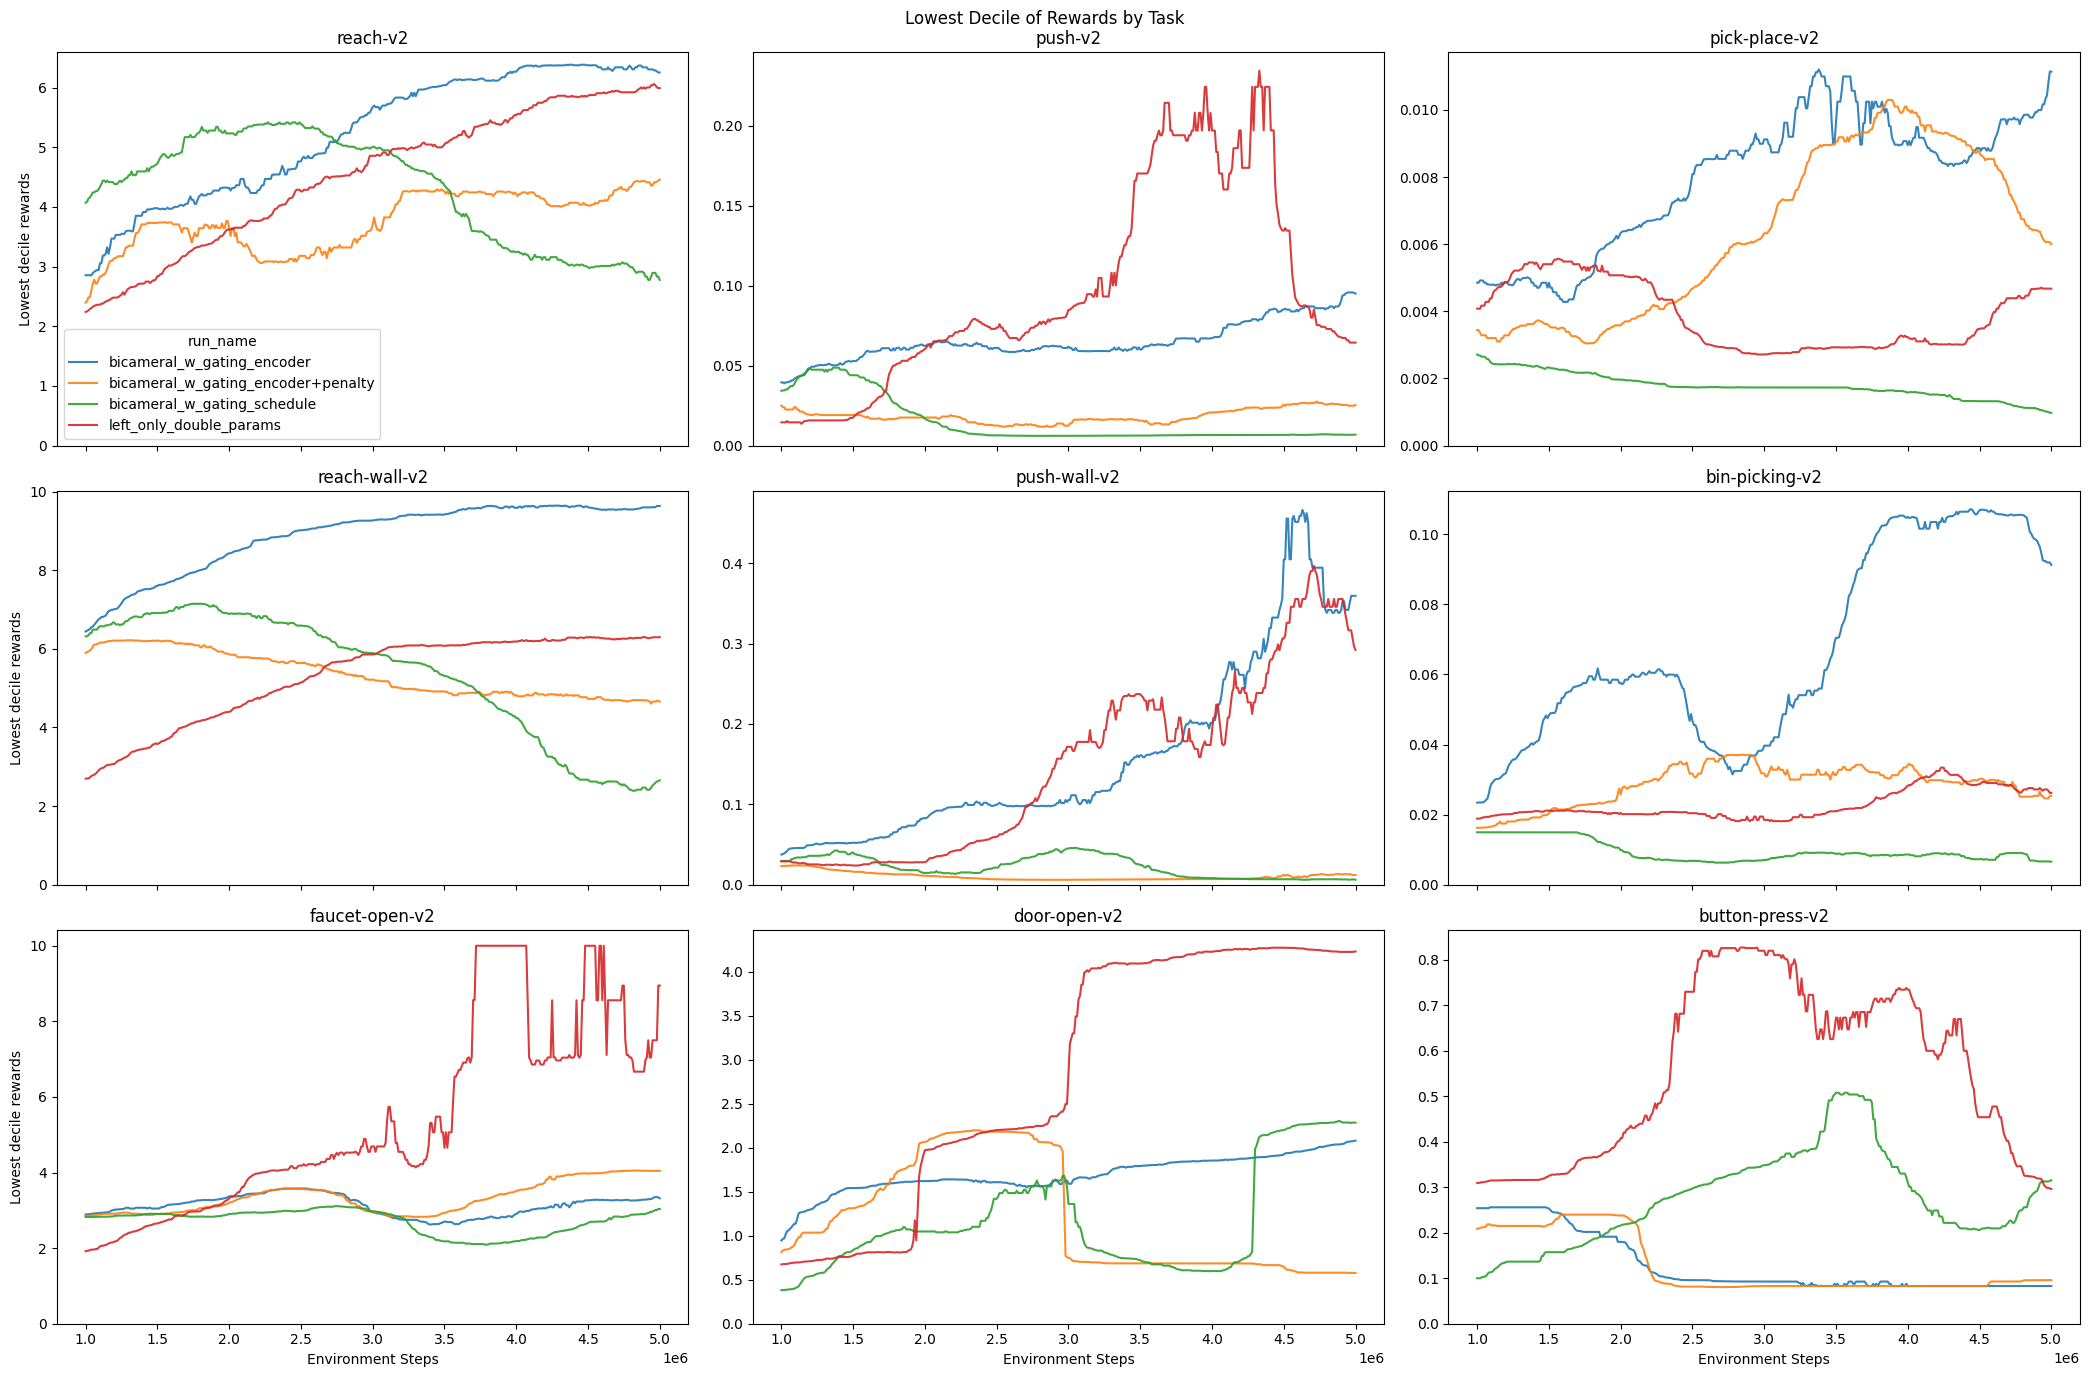

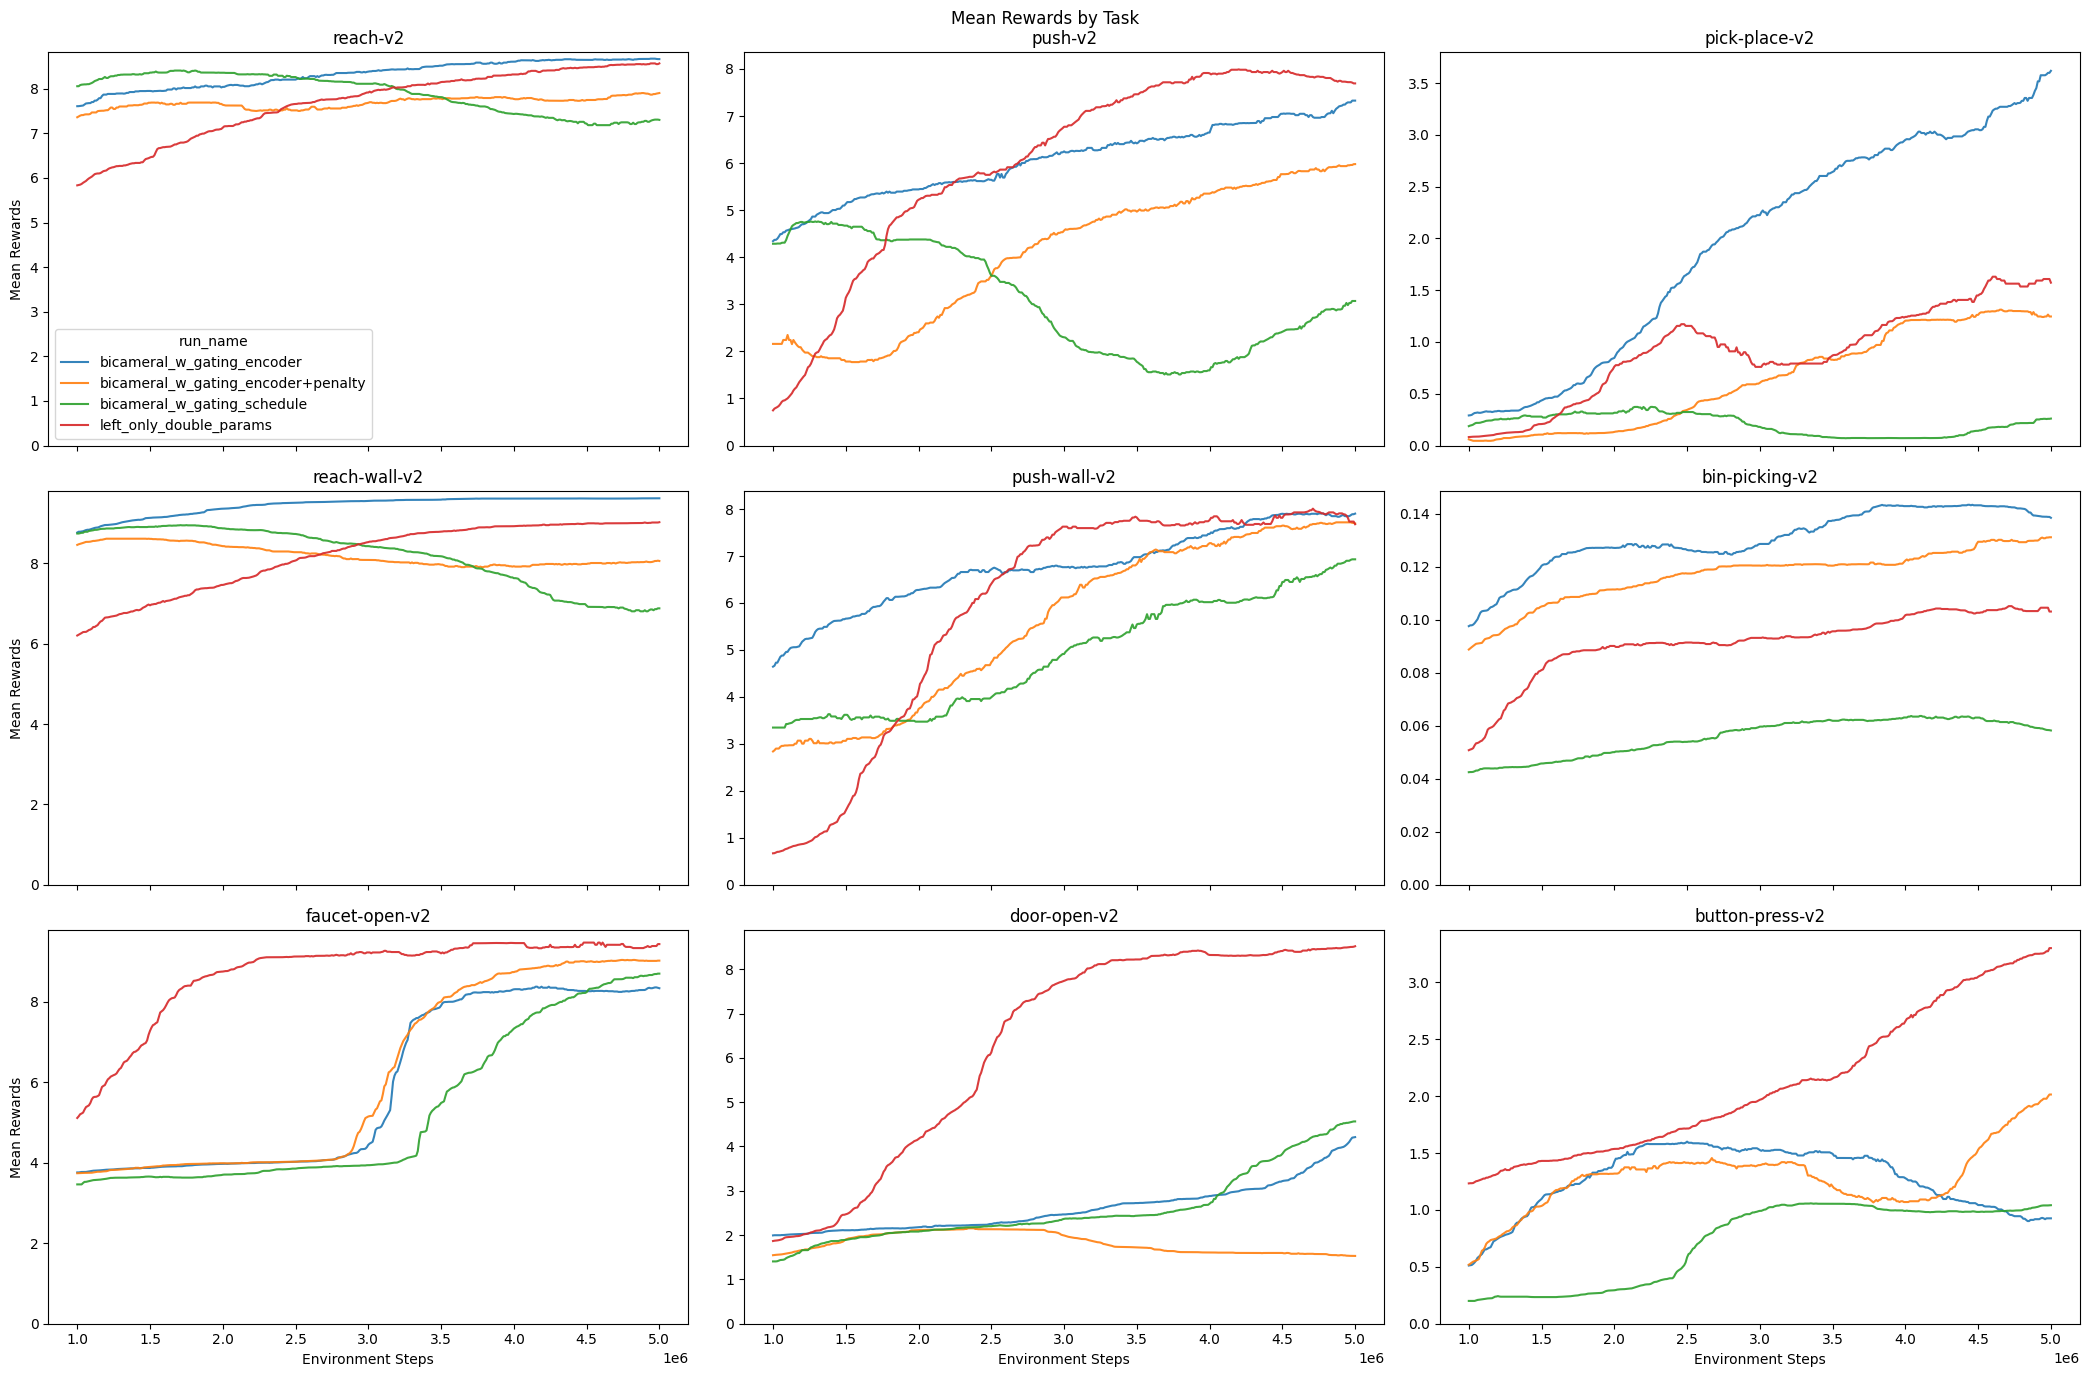

In [7]:
window = 100
min_over = 1e6
reward_col='rq_0.1'
to_remove = ['random', 'right_only', 'right_only_double_params']
training_tasks = [
    'reach-v2', 'push-v2', 'pick-place-v2',
    'reach-wall-v2', 'push-wall-v2', 'bin-picking-v2',
    'faucet-open-v2', 'door-open-v2', 'button-press-v2'
]
plot_reward_trajectory(
    df=train_data.query(f'~run_name.isin({to_remove})'),
    reward_col=reward_col,
    window=window,
    min_over=min_over,
    adjust_left=False,
    tasks=training_tasks,
    ylabel='Lowest decile rewards',
    title='Lowest Decile of Rewards by Task'
)

plot_reward_trajectory(
    df=train_data.query(f'~run_name.isin({to_remove})'),
    reward_col='reward_mean',
    window=window,
    min_over=min_over,
    adjust_left=False,
    tasks=training_tasks,
    ylabel='Mean Rewards',
    title='Mean Rewards by Task'
)

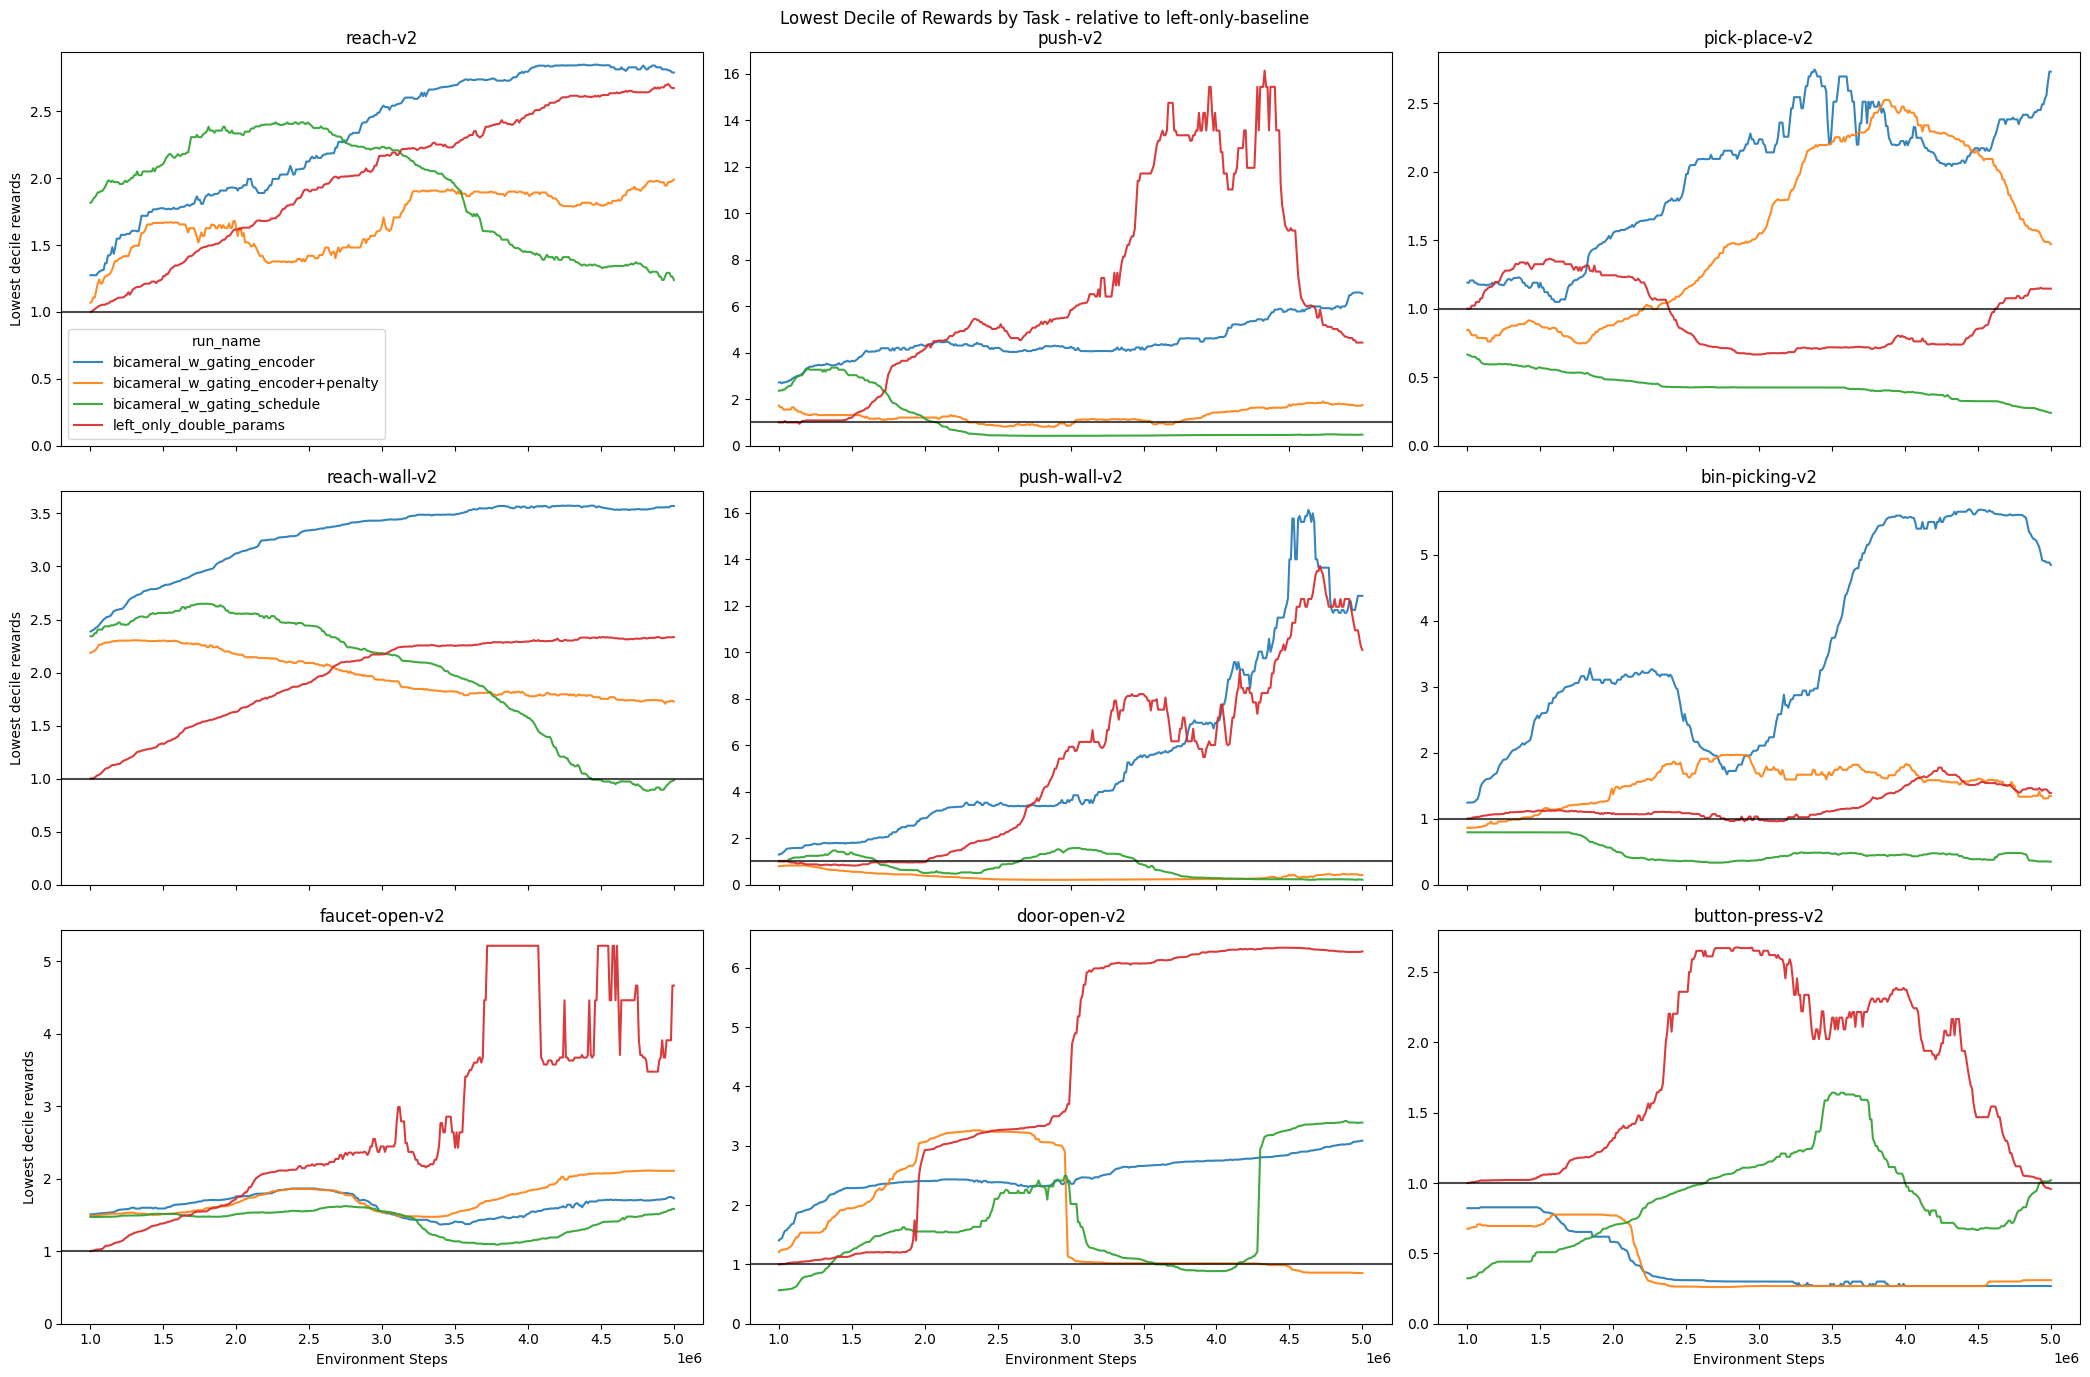

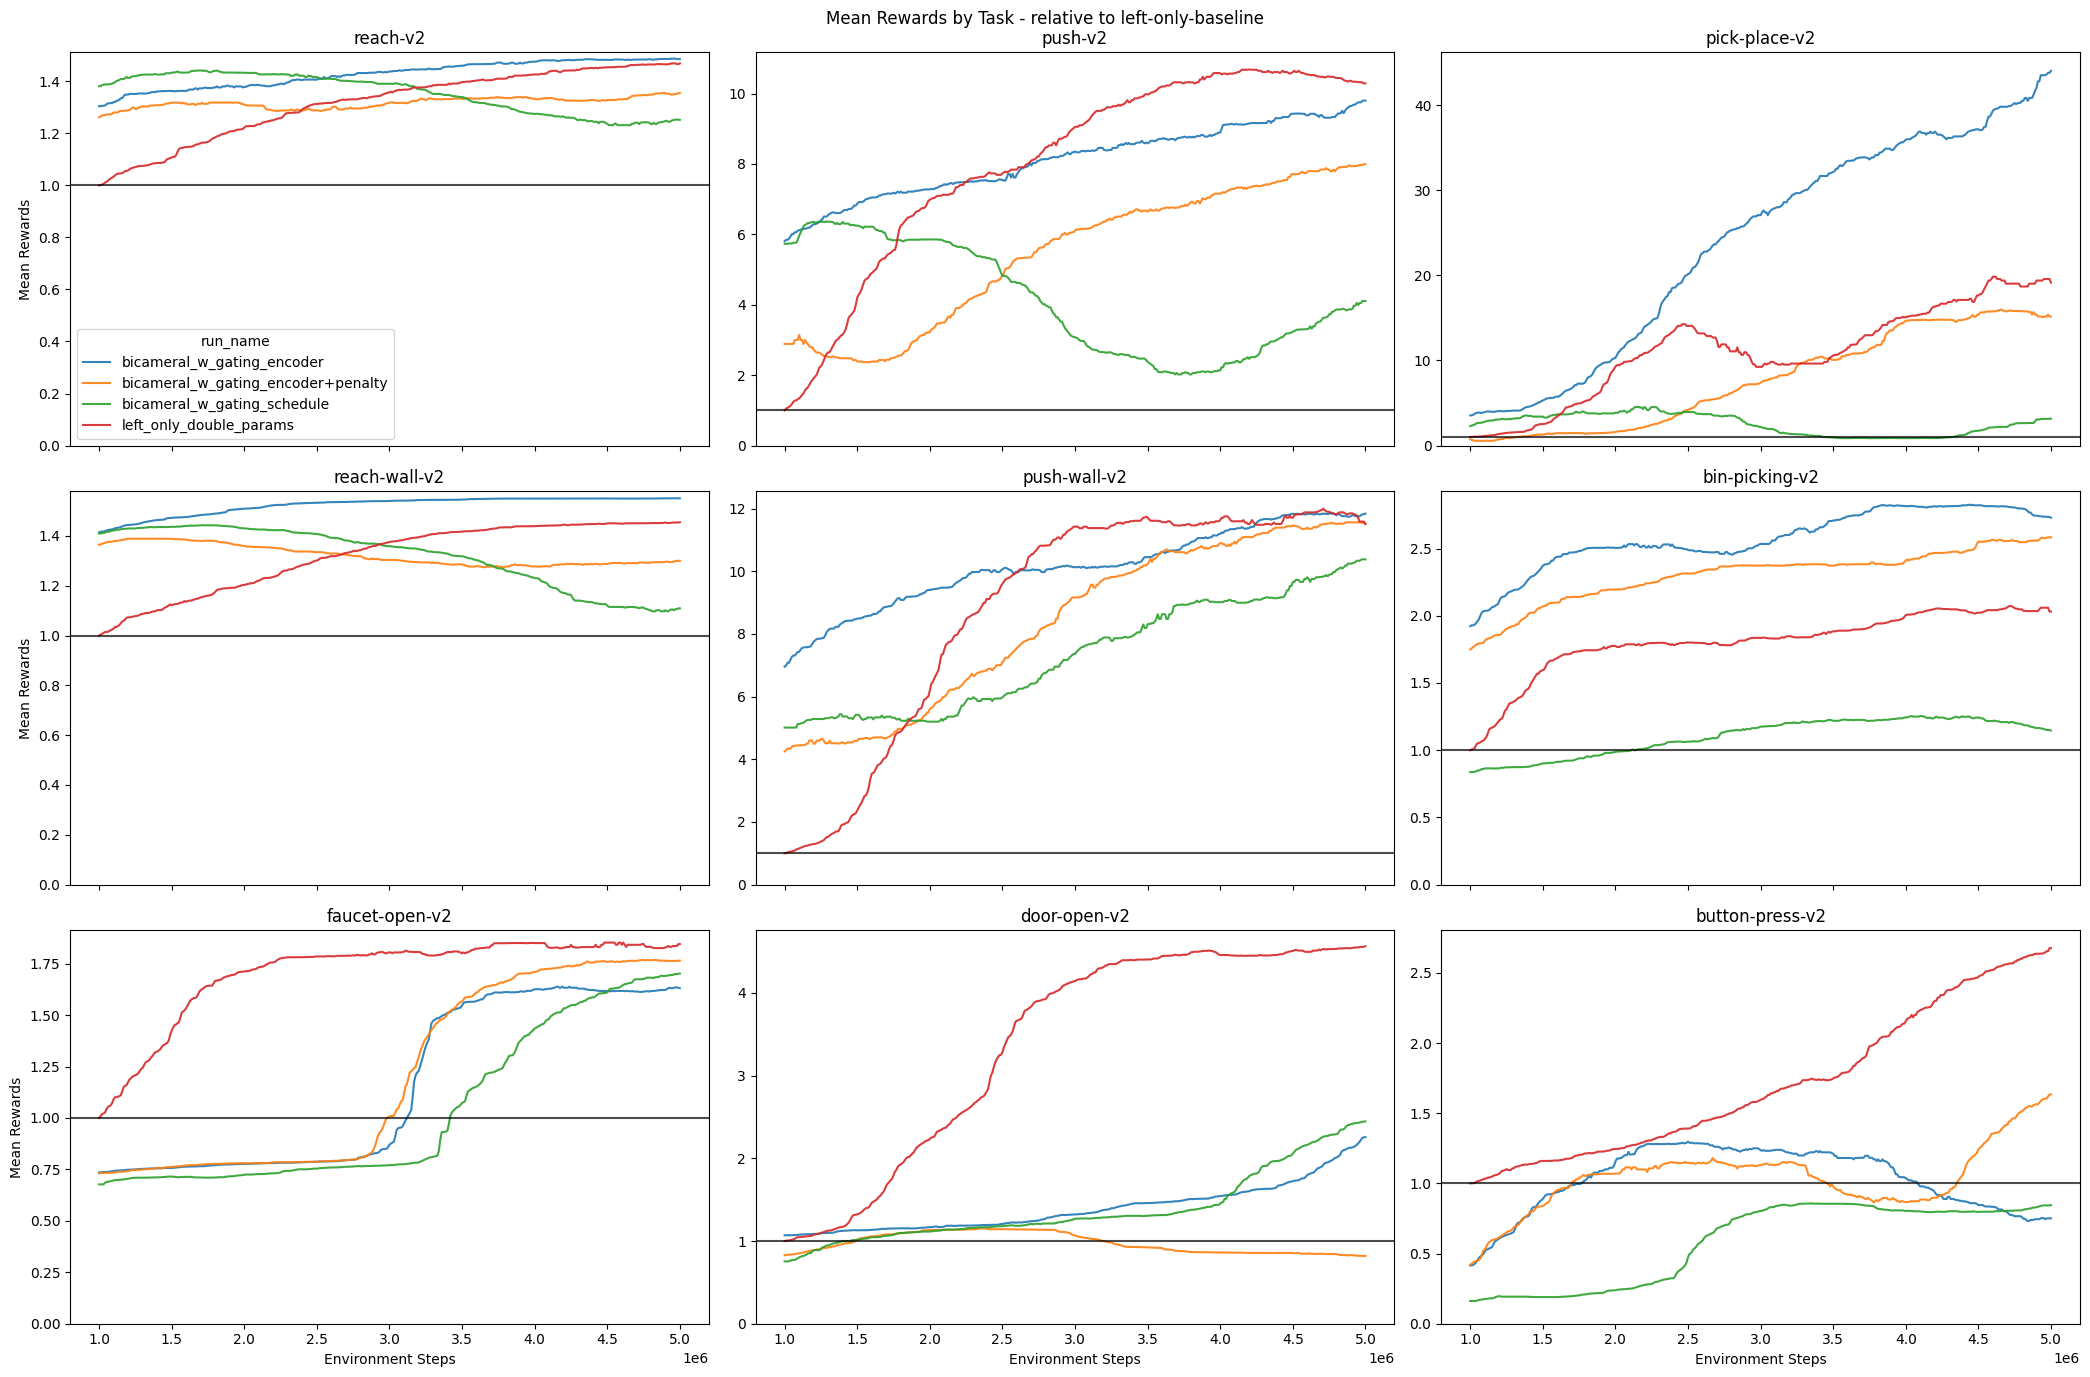

In [8]:
window = 100
min_over = 1e6
reward_col='rq_0.1'
to_remove = ['random', 'right_only', 'right_only_double_params']
training_tasks = [
    'reach-v2', 'push-v2', 'pick-place-v2',
    'reach-wall-v2', 'push-wall-v2', 'bin-picking-v2',
    'faucet-open-v2', 'door-open-v2', 'button-press-v2'
]
left_scaled_worst_case = plot_reward_trajectory(
    df=train_data.query(f'~run_name.isin({to_remove})'),
    reward_col=reward_col,
    window=window,
    min_over=min_over,
    adjust_left=True,
    tasks=training_tasks,
    ylabel='Lowest decile rewards',
    title='Lowest Decile of Rewards by Task - relative to left-only-baseline'
)

left_scaled_avg_case = plot_reward_trajectory(
    df=train_data.query(f'~run_name.isin({to_remove})'),
    reward_col='reward_mean',
    window=window,
    min_over=min_over,
    adjust_left=True,
    tasks=training_tasks,
    ylabel='Mean Rewards',
    title='Mean Rewards by Task - relative to left-only-baseline'
)

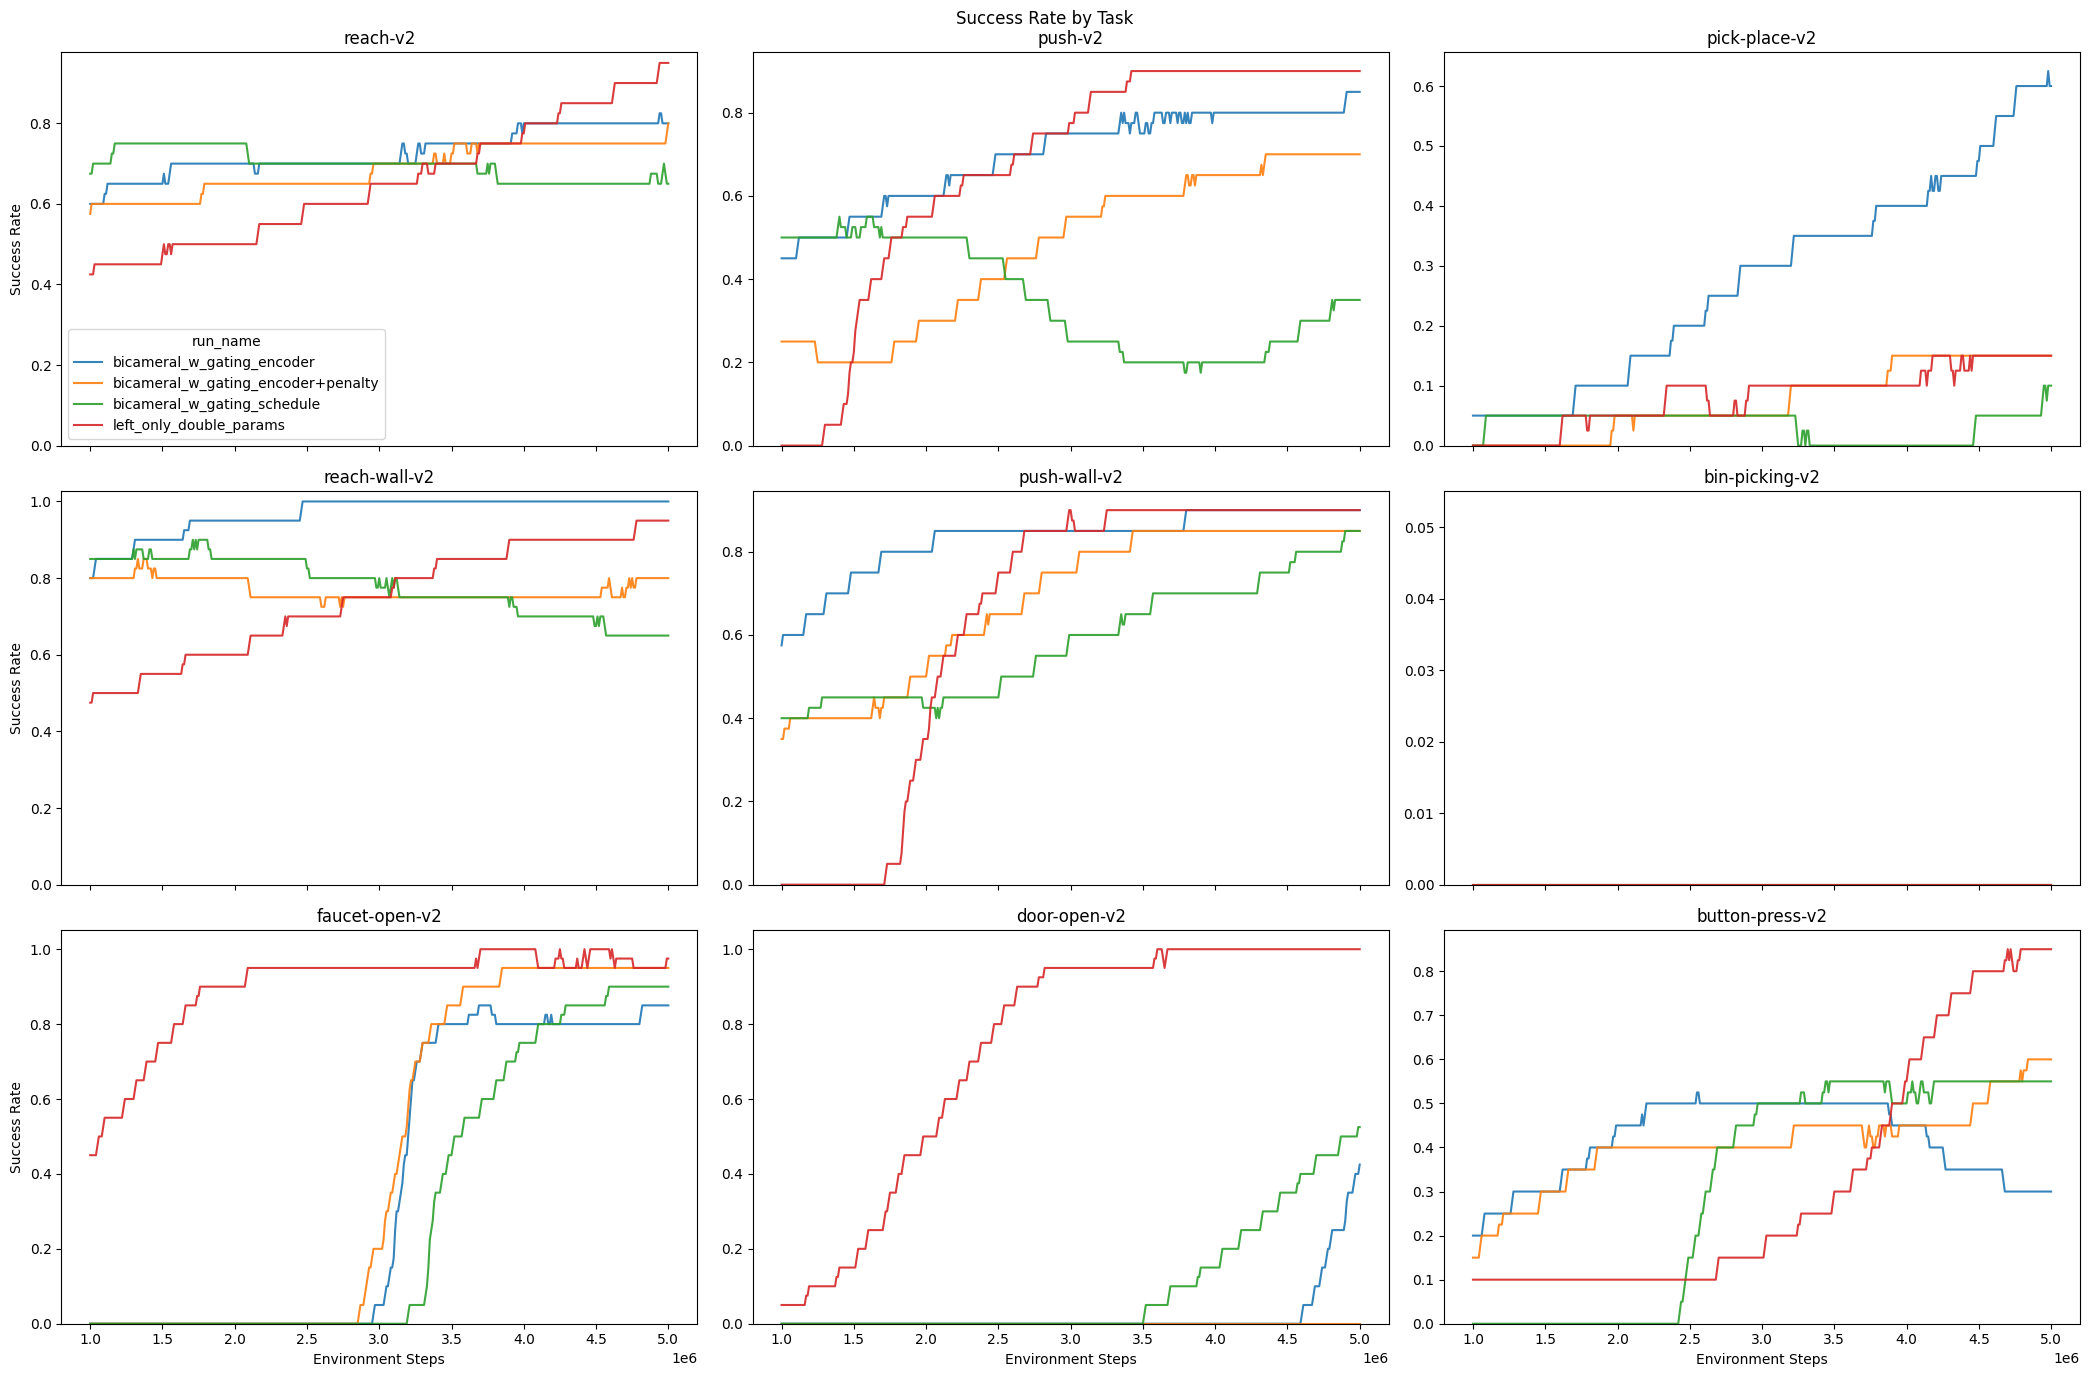

In [9]:
window = 100
min_over = 1e6
reward_col='num_successes'
to_remove = ['random', 'right_only', 'right_only_double_params']
training_tasks = [
    'reach-v2', 'push-v2', 'pick-place-v2',
    'reach-wall-v2', 'push-wall-v2', 'bin-picking-v2',
    'faucet-open-v2', 'door-open-v2', 'button-press-v2'
]
plot_reward_trajectory(
    df=train_data.query(f'~run_name.isin({to_remove})'),
    reward_col=reward_col,
    window=window,
    min_over=min_over,
    adjust_left=False,
    tasks=training_tasks,
    ylabel='Success Rate',
    title='Success Rate by Task'
)


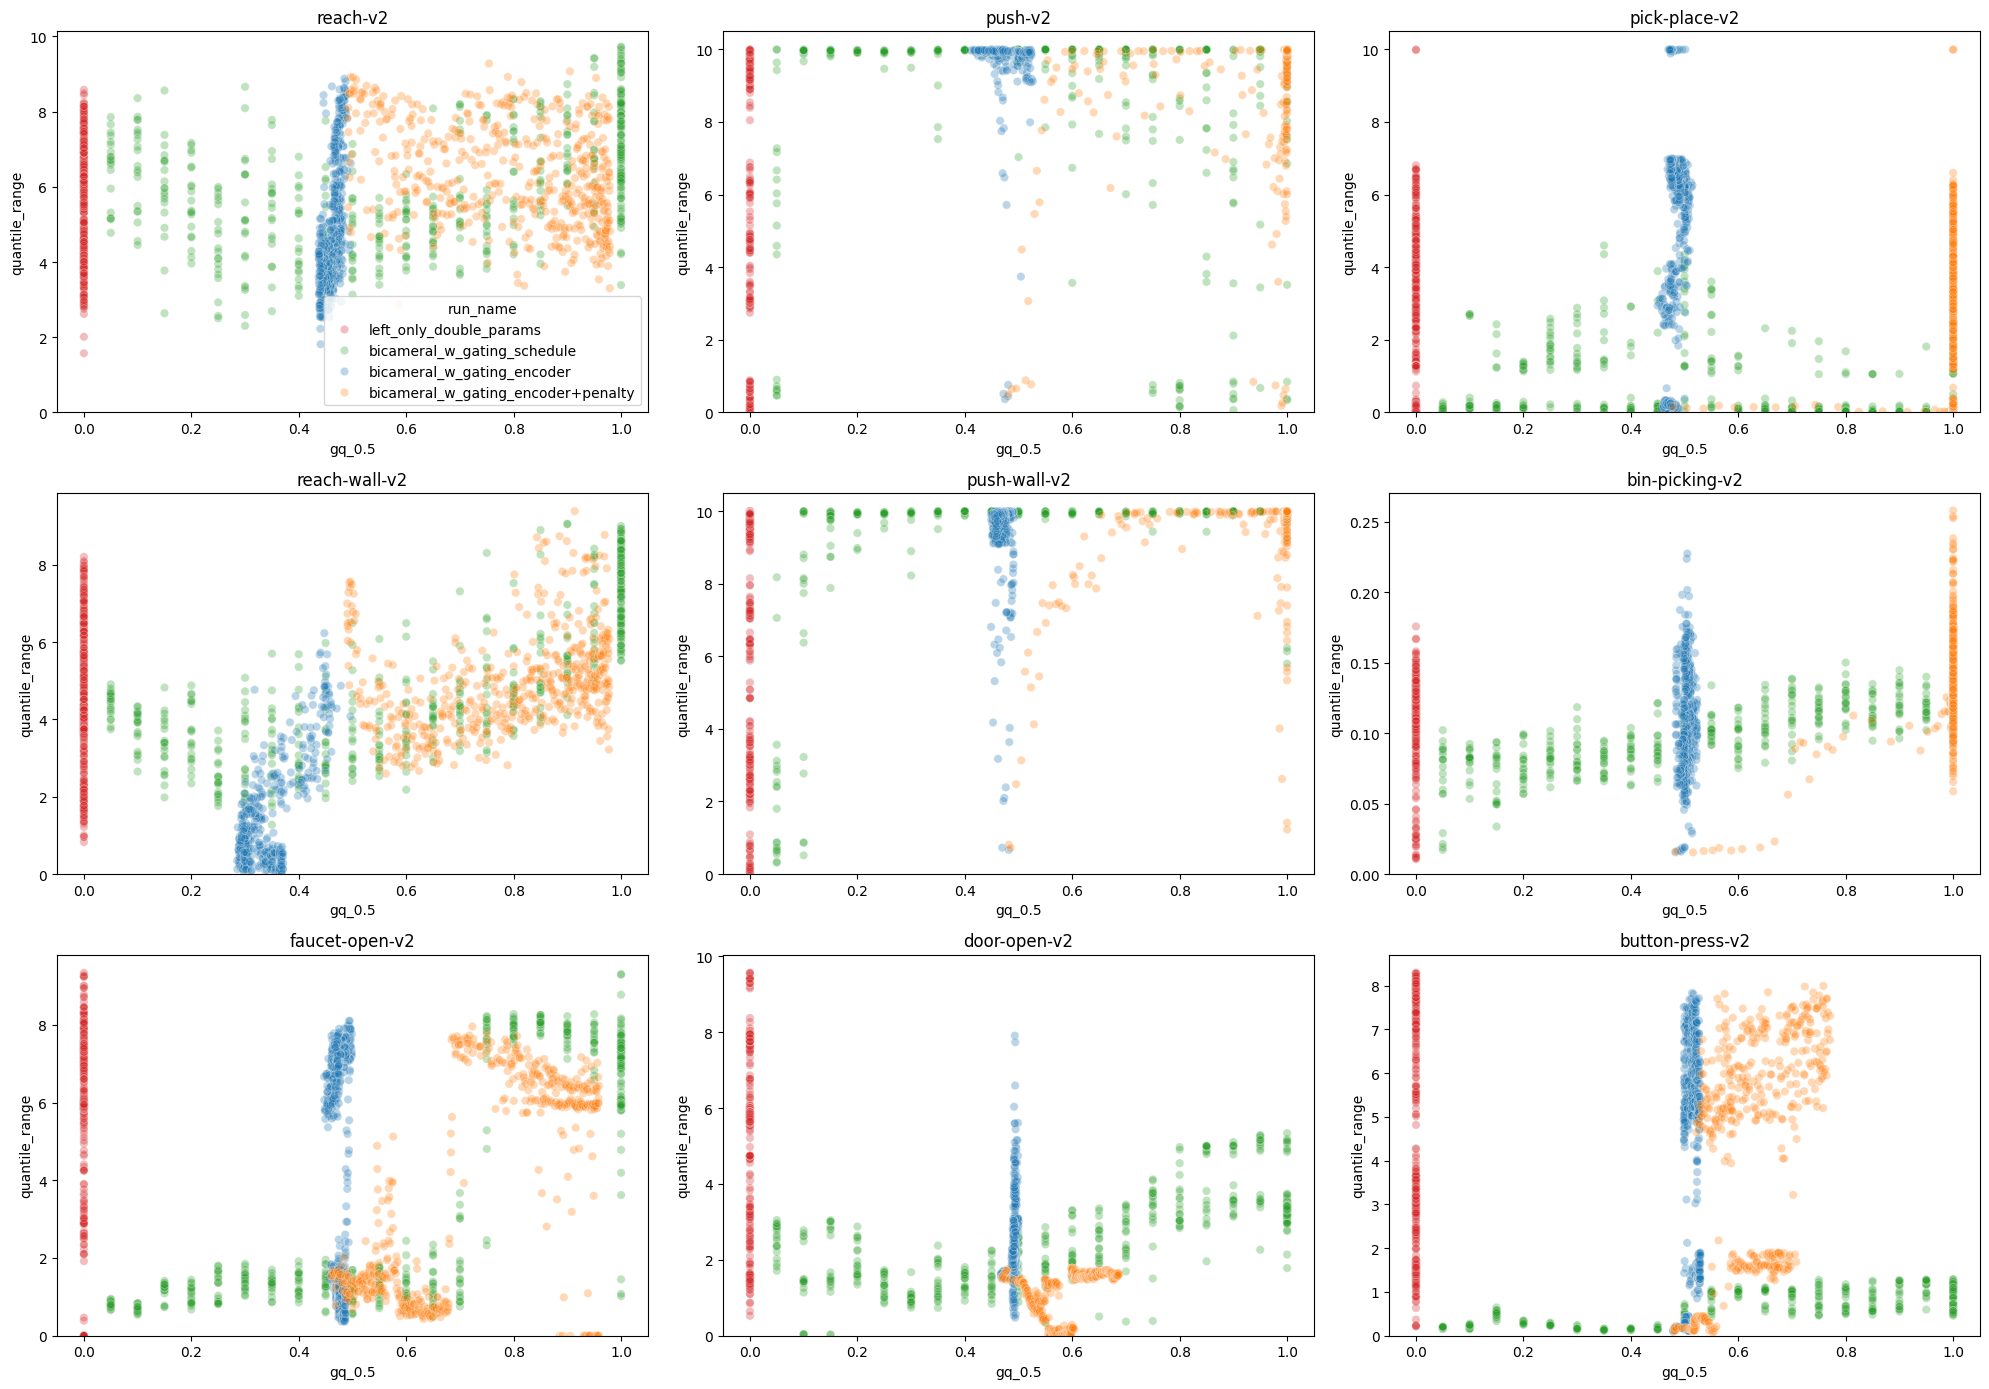

In [10]:
quantile_gap = (
    train_data
    .query(f"~run_name.isin({to_remove })")
    .assign(
        quantile_range = lambda x: (x['rq_0.9'] - x['rq_0.1'])
    )
)

training_tasks = [
    'reach-v2', 'push-v2', 'pick-place-v2',
    'reach-wall-v2', 'push-wall-v2', 'bin-picking-v2',
    'faucet-open-v2', 'door-open-v2', 'button-press-v2'
]
fig, ax = plt.subplots(3,3, figsize=(20,14))
ax = ax.flatten()

for i, task in enumerate(training_tasks):

    sns.scatterplot(
        data = quantile_gap.query(f"training_task=='{task}'"),
        x='gq_0.5',
        y = 'quantile_range',
        hue='run_name',
        ax = ax[i],
        palette=PALETTE,
        alpha = 0.3
    )
    ax[i].set_title(task)
    ax[i].set_ylim(0)

    if i > 0:
        ax[i].get_legend().remove()

plt.tight_layout()
plt.show();

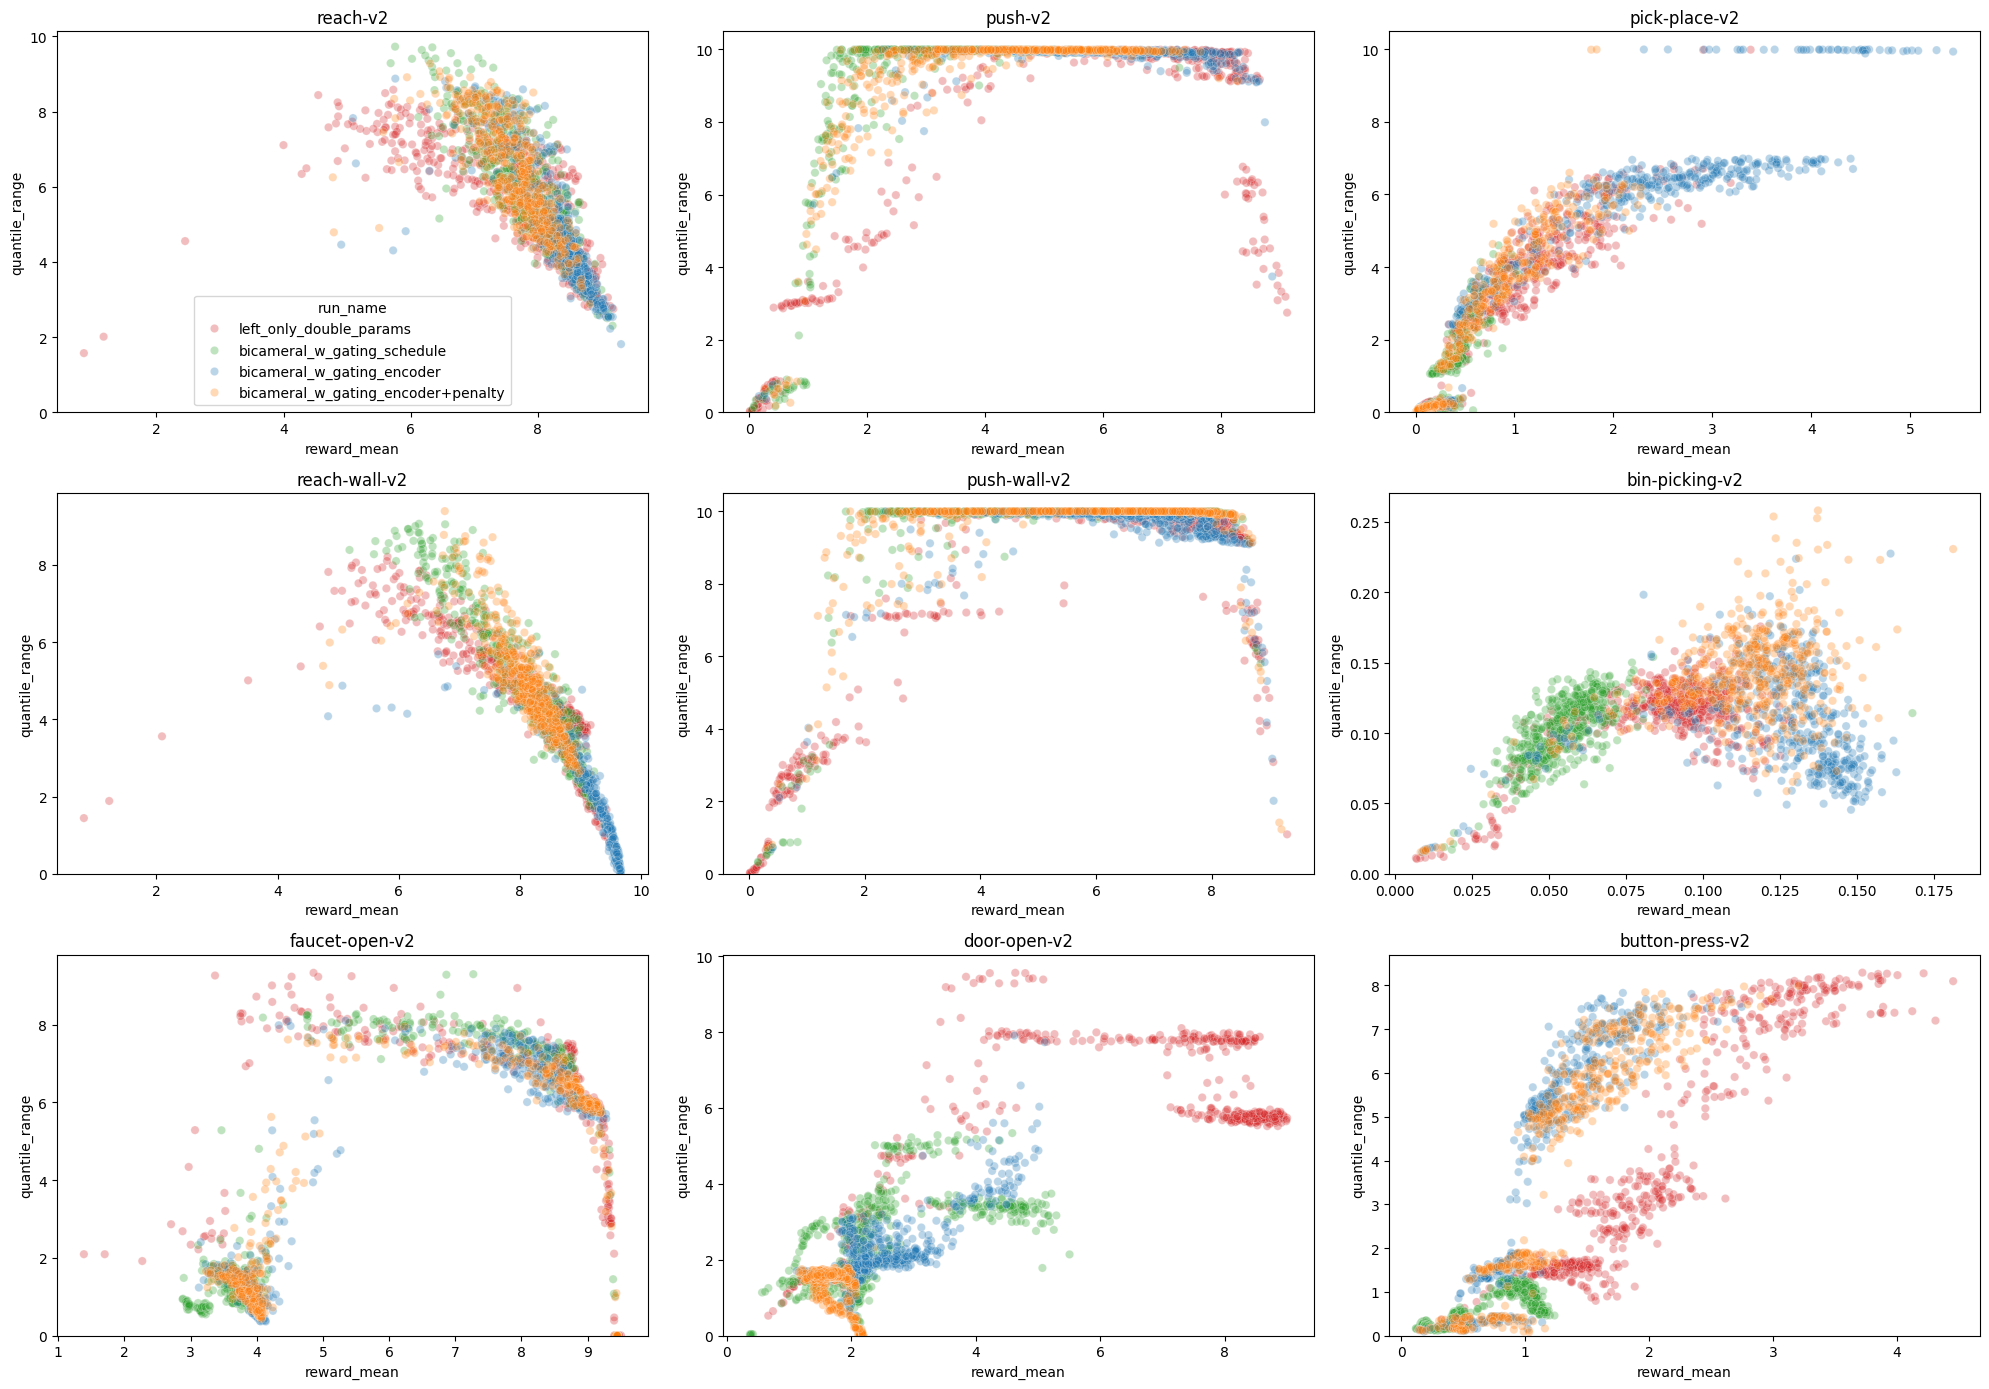

In [11]:
quantile_gap = (
    train_data
    .query(f"~run_name.isin({to_remove })")
    .assign(
        quantile_range = lambda x: (x['rq_0.9'] - x['rq_0.1'])
    )
)

training_tasks = [
    'reach-v2', 'push-v2', 'pick-place-v2',
    'reach-wall-v2', 'push-wall-v2', 'bin-picking-v2',
    'faucet-open-v2', 'door-open-v2', 'button-press-v2'
]
fig, ax = plt.subplots(3,3, figsize=(20,14))
ax = ax.flatten()

for i, task in enumerate(training_tasks):

    sns.scatterplot(
        data = quantile_gap.query(f"training_task=='{task}'"),
        x='reward_mean',
        y = 'quantile_range',
        hue='run_name',
        ax = ax[i],
        palette=PALETTE,
        alpha = 0.3
    )
    ax[i].set_title(task)
    ax[i].set_ylim(0)

    if i > 0:
        ax[i].get_legend().remove()

plt.tight_layout()
plt.show();

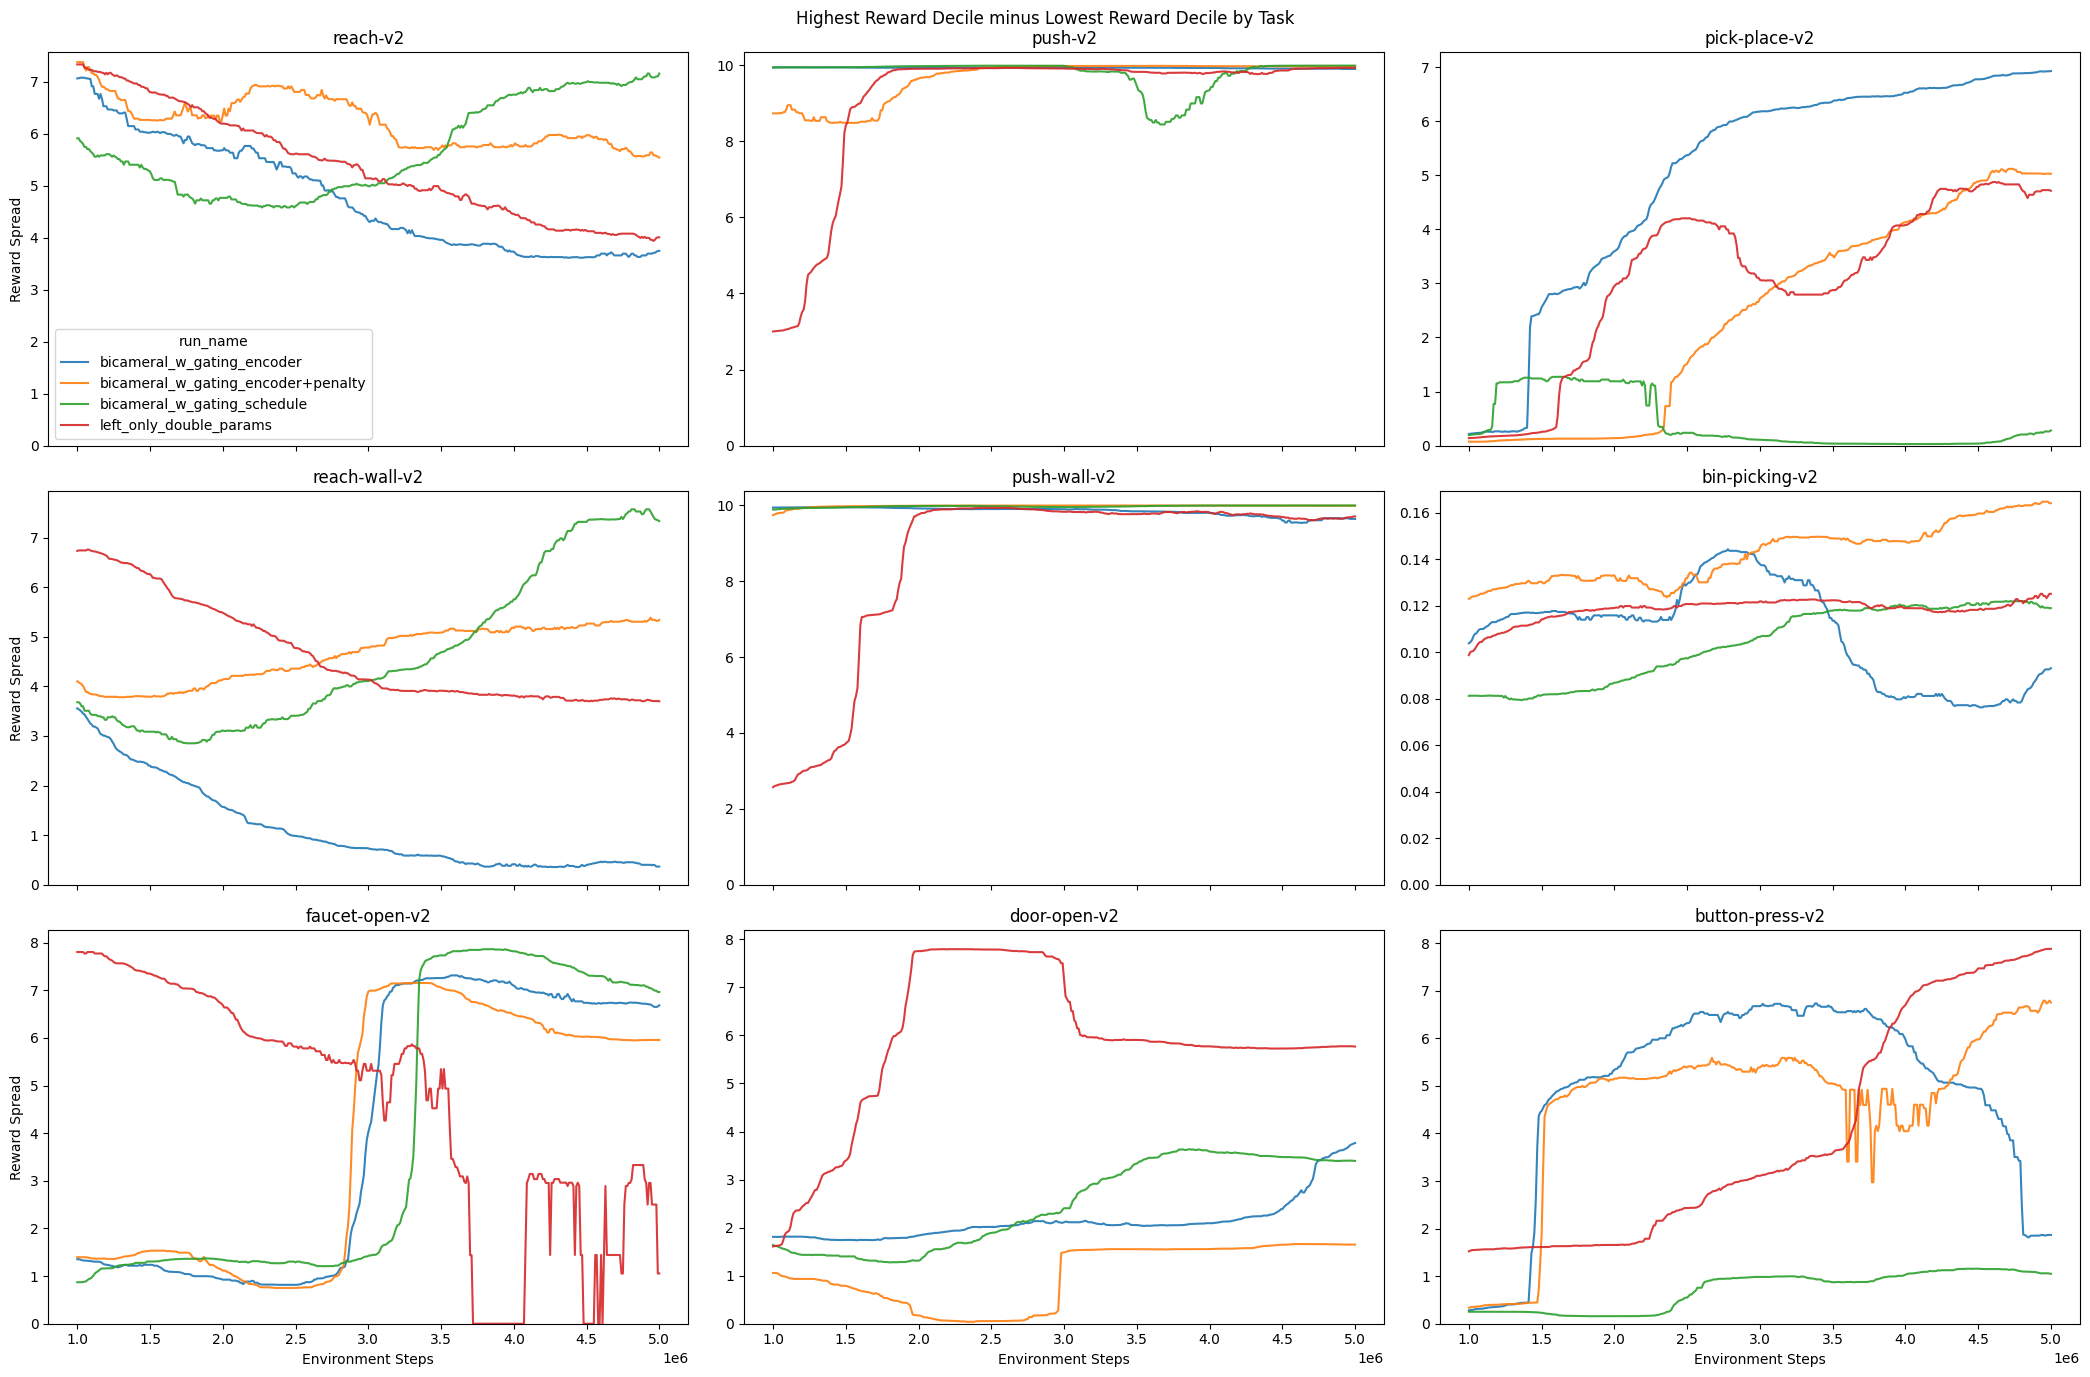

In [12]:
window = 100
min_over = 1e6
reward_col='quantile_range'
to_remove = ['random', 'right_only', 'right_only_double_params']
training_tasks = [
    'reach-v2', 'push-v2', 'pick-place-v2',
    'reach-wall-v2', 'push-wall-v2', 'bin-picking-v2',
    'faucet-open-v2', 'door-open-v2', 'button-press-v2'
]
plot_reward_trajectory(
    df=(
        train_data
        .query(f'~run_name.isin({to_remove})')
        .assign(
            quantile_range = lambda x: (x['rq_0.9'] - x['rq_0.1'])
        )
    ),
    reward_col=reward_col,
    window=window,
    min_over=min_over,
    adjust_left=False,
    tasks=training_tasks,
    ylabel='Reward Spread',
    title='Highest Reward Decile minus Lowest Reward Decile by Task'
)


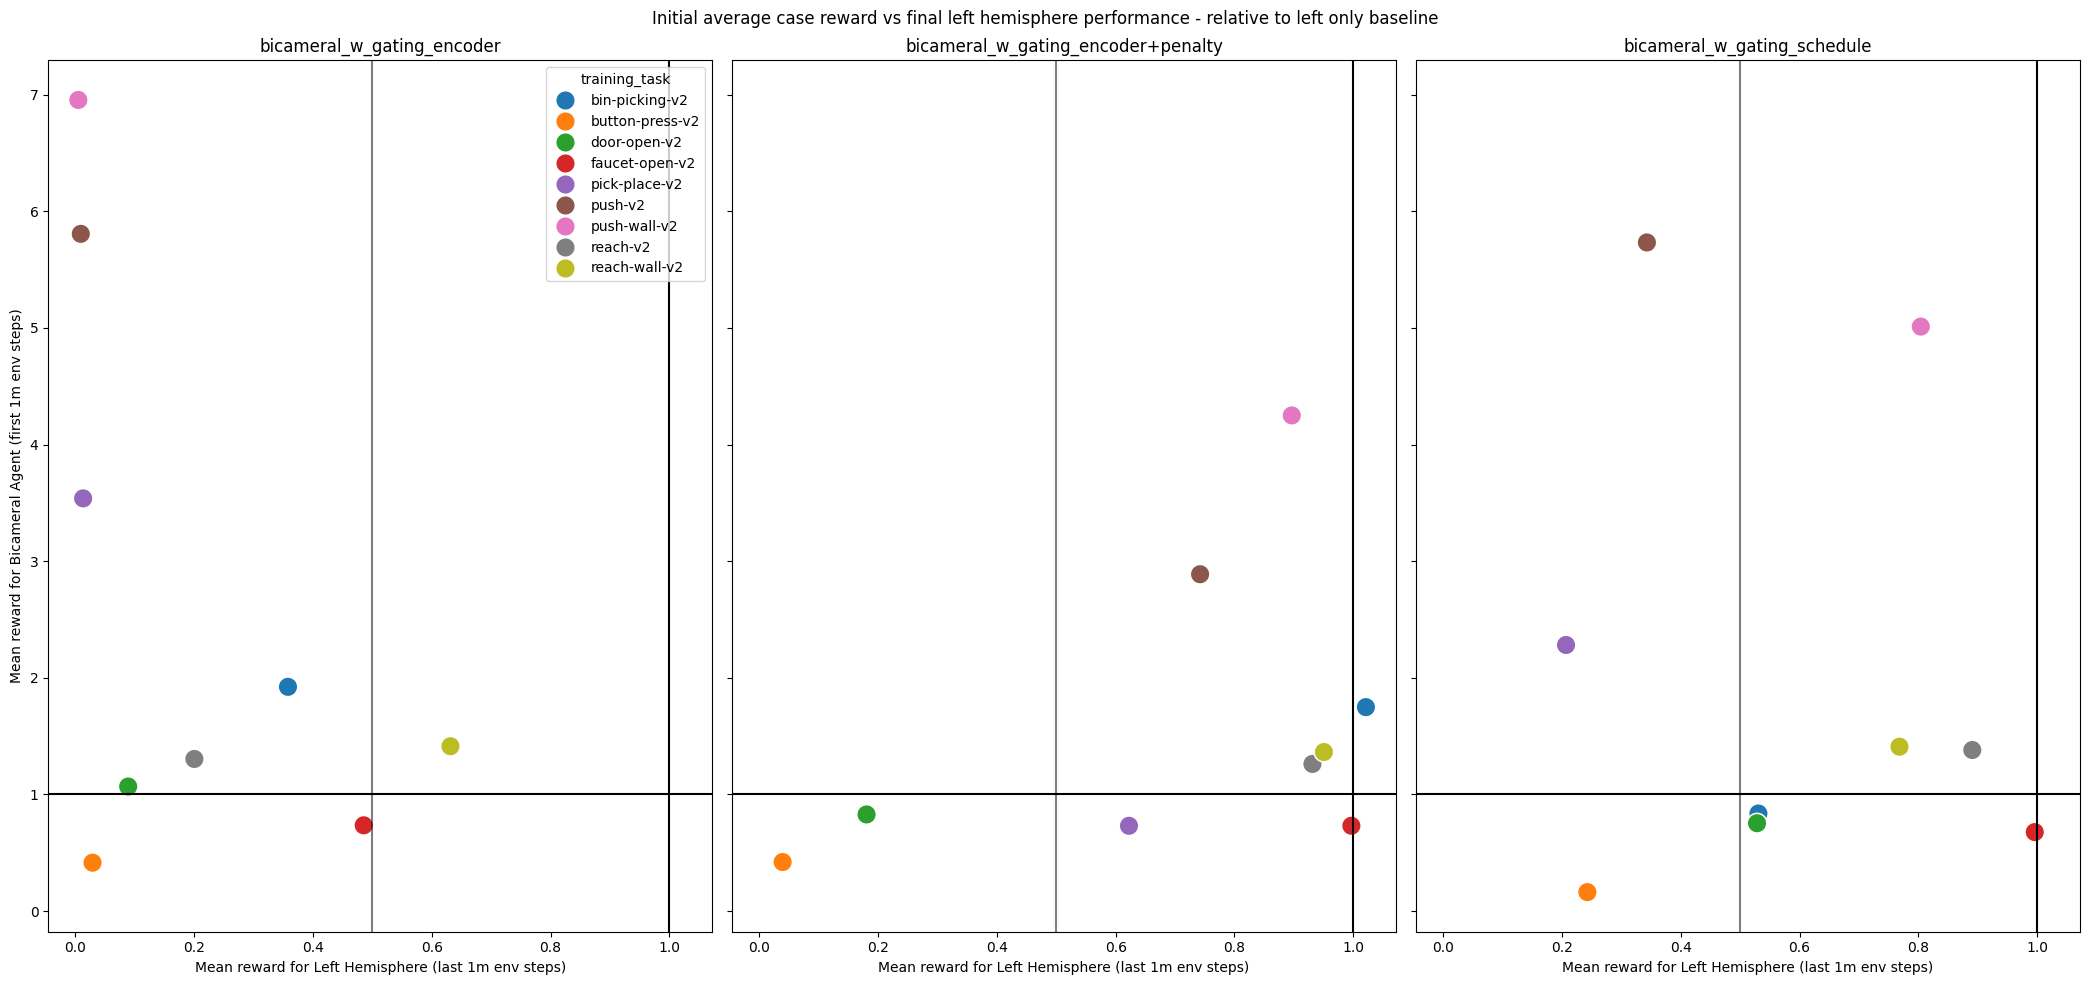

In [13]:
plot_inital_reward_vs_final_left(
    train_df=train_data.query(f"~run_name.isin({to_remove})"), 
    test_df=test_data.query(f"~run_name.isin({to_remove})"), 
    left_eval_df=left_eval_data, 
    initial_reward_col='reward_mean', 
    left_only_reward_col='reward_mean', 
    window=100, 
    min_over=1e6,
    title='Initial average case reward vs final left hemisphere performance - relative to left only baseline',
    figsize=(21, 14),
    xlabel='Mean reward for Left Hemisphere (last 1m env steps)',
    ylabel='Mean reward for Bicameral Agent (first 1m env steps)'
    )

In [14]:
# vs_left_1m = (
#     joined_worst_case_df
#     .query('env_steps=="1m"')
#     .loc[:,['training_task','run_name', 'rq_0.1']]
# )

vs_left_1m = (
    left_scaled_worst_case
    .query('frame==1e6')
    .loc[:,['training_task','run_name', 'rq_0.1']]
)

left_vs_test = (
    pd.merge(
        left_eval_data,
        (
            test_data
            .query('run_name == "left_only_double_params"')
            .loc[:,['frame','training_task','reward_mean']]
            .rename(columns={'reward_mean':'left_reward_mean'})
        ),
        on=['frame','training_task']
    )
    .query('frame >= 4000000')
    .loc[:, ['training_task', 'run_name', 'reward_mean','left_reward_mean']]
    .groupby(['training_task', 'run_name'])
    .median()
    .assign(agg_ratio_to_left=lambda x: x['reward_mean'] / x['left_reward_mean'])
    .reset_index()
    # .drop('rq_0.1', axis=1)
    .merge(
        vs_left_1m,
        on=['training_task', 'run_name']
    )
)

left_vs_test.head()

training_task                            run_name  reward_mean  \
0   bin-picking-v2          bicameral_w_gating_encoder     0.037839   
1   bin-picking-v2  bicameral_w_gating_encoder+penalty     0.103823   
2   bin-picking-v2         bicameral_w_gating_schedule     0.055471   
3  button-press-v2          bicameral_w_gating_encoder     0.133534   
4  button-press-v2  bicameral_w_gating_encoder+penalty     0.183904   

   left_reward_mean  agg_ratio_to_left    rq_0.1  
0          0.105828           0.357552  1.241367  
1          0.105828           0.981056  0.861206  
2          0.105828           0.524167  0.792873  
3          4.630609           0.028837  0.821164  
4          4.630609           0.039715  0.674687

In [15]:
# vs_left_1m = (
#     joined_worst_case_df
#     .query('env_steps=="1m"')
#     .loc[:,['training_task','run_name', 'rq_0.1']]
# )

vs_left_1m = (
    left_scaled_avg_case
    .query('frame==1e6')
    .loc[:,['training_task','run_name', 'reward_mean']]
)

left_vs_test = (
    pd.merge(
        left_eval_data,
        (
            test_data
            .query('run_name == "left_only_double_params"')
            .loc[:,['frame','training_task','reward_mean']]
            .rename(columns={'reward_mean':'left_reward_mean'})
        ),
        on=['frame','training_task']
    )
    .query('frame >= 4000000')
    .loc[:, ['training_task', 'run_name', 'reward_mean','left_reward_mean']]
    .groupby(['training_task', 'run_name'])
    .median()
    .assign(agg_ratio_to_left=lambda x: x['reward_mean'] / x['left_reward_mean'])
    .reset_index()
    .drop('reward_mean', axis=1)
    .merge(
        vs_left_1m,
        on=['training_task', 'run_name']
    )
)

left_vs_test.head()

training_task                            run_name  left_reward_mean  \
0   bin-picking-v2          bicameral_w_gating_encoder          0.105828   
1   bin-picking-v2  bicameral_w_gating_encoder+penalty          0.105828   
2   bin-picking-v2         bicameral_w_gating_schedule          0.105828   
3  button-press-v2          bicameral_w_gating_encoder          4.630609   
4  button-press-v2  bicameral_w_gating_encoder+penalty          4.630609   

   agg_ratio_to_left  reward_mean  
0           0.357552     1.922656  
1           0.981056     1.748676  
2           0.524167     0.836436  
3           0.028837     0.414889  
4           0.039715     0.420498

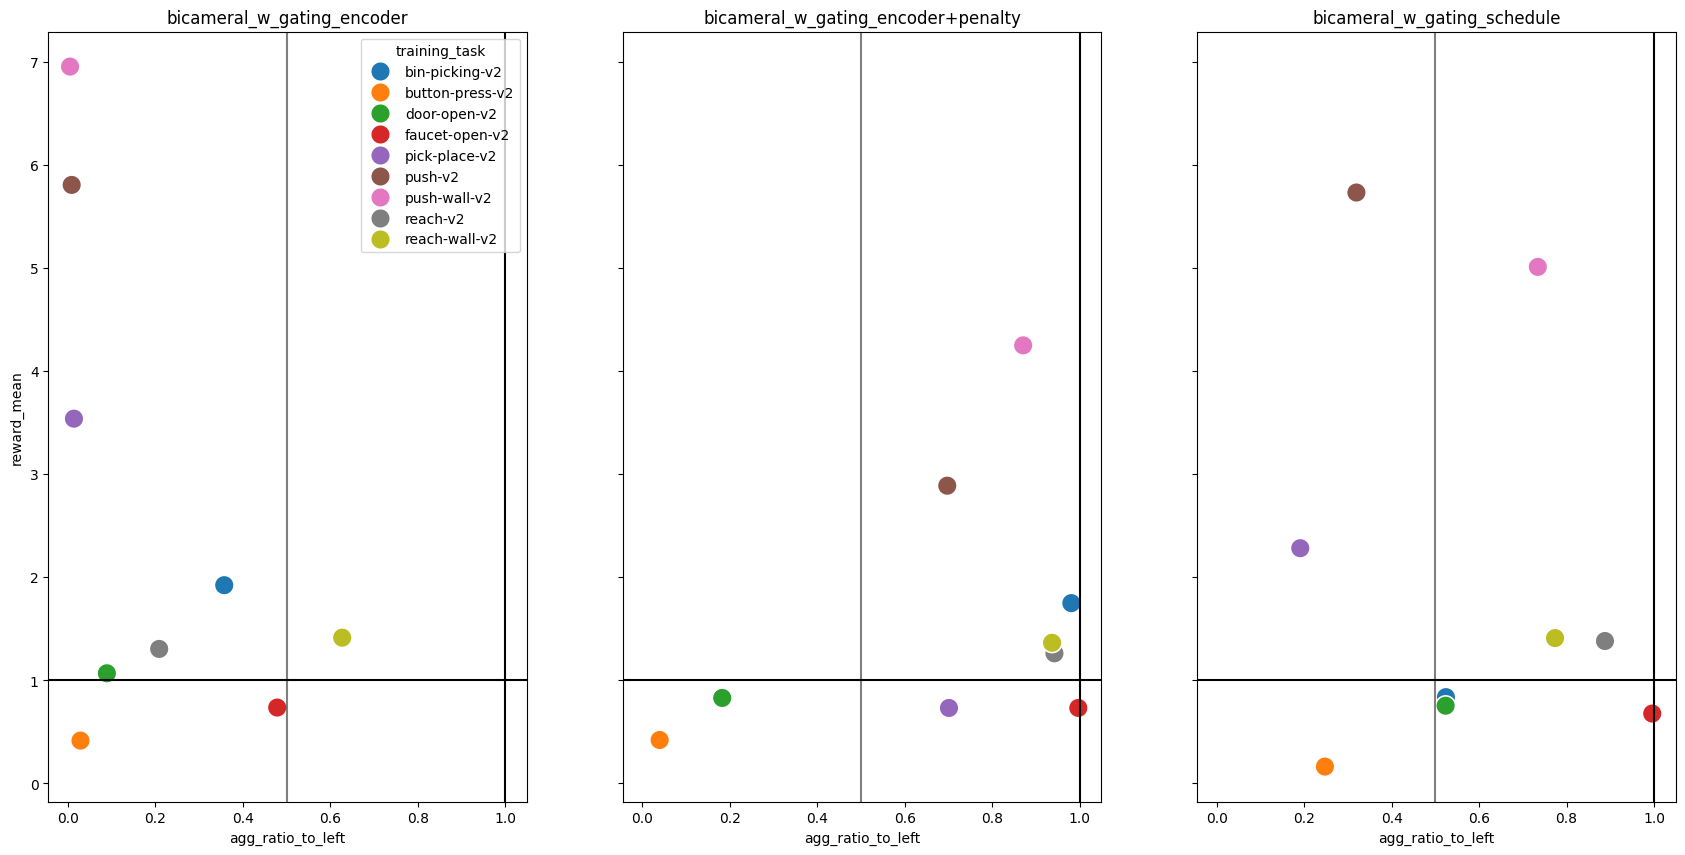

In [16]:
fig, ax = plt.subplots(1,3,figsize=(21, 10), sharex=True, sharey=True)
ax = ax.flatten()

algorithms = np.unique(left_vs_test.run_name)

for i, alg in enumerate(algorithms):
    sns.scatterplot(
        data=left_vs_test.query(f'run_name=="{alg}"'),
        x='agg_ratio_to_left',
        y='reward_mean',
        hue='training_task',
        ax = ax[i],
        s=200
    )
    if i > 0:
        ax[i].get_legend().remove()

    ax[i].set_title(alg)
    ax[i].axhline(1, c='black')
    ax[i].axvline(1, c='black')
    ax[i].axvline(.5, c='black', alpha=0.5)

In [17]:

left_vs_initial = get_left_only_vs_initial(
    train_data.query(f"~run_name.isin({to_remove})"),
    test_data.query(f"~run_name.isin({to_remove})"),
    left_eval_data,
    initial_reward_col='reward_mean', 
    left_only_reward_col='reward_mean', 
    window=100, 
    min_over=1e6
).assign(tier=lambda x: x.training_task.apply(lambda y: TIER_DICT.get(y)))
# def agg

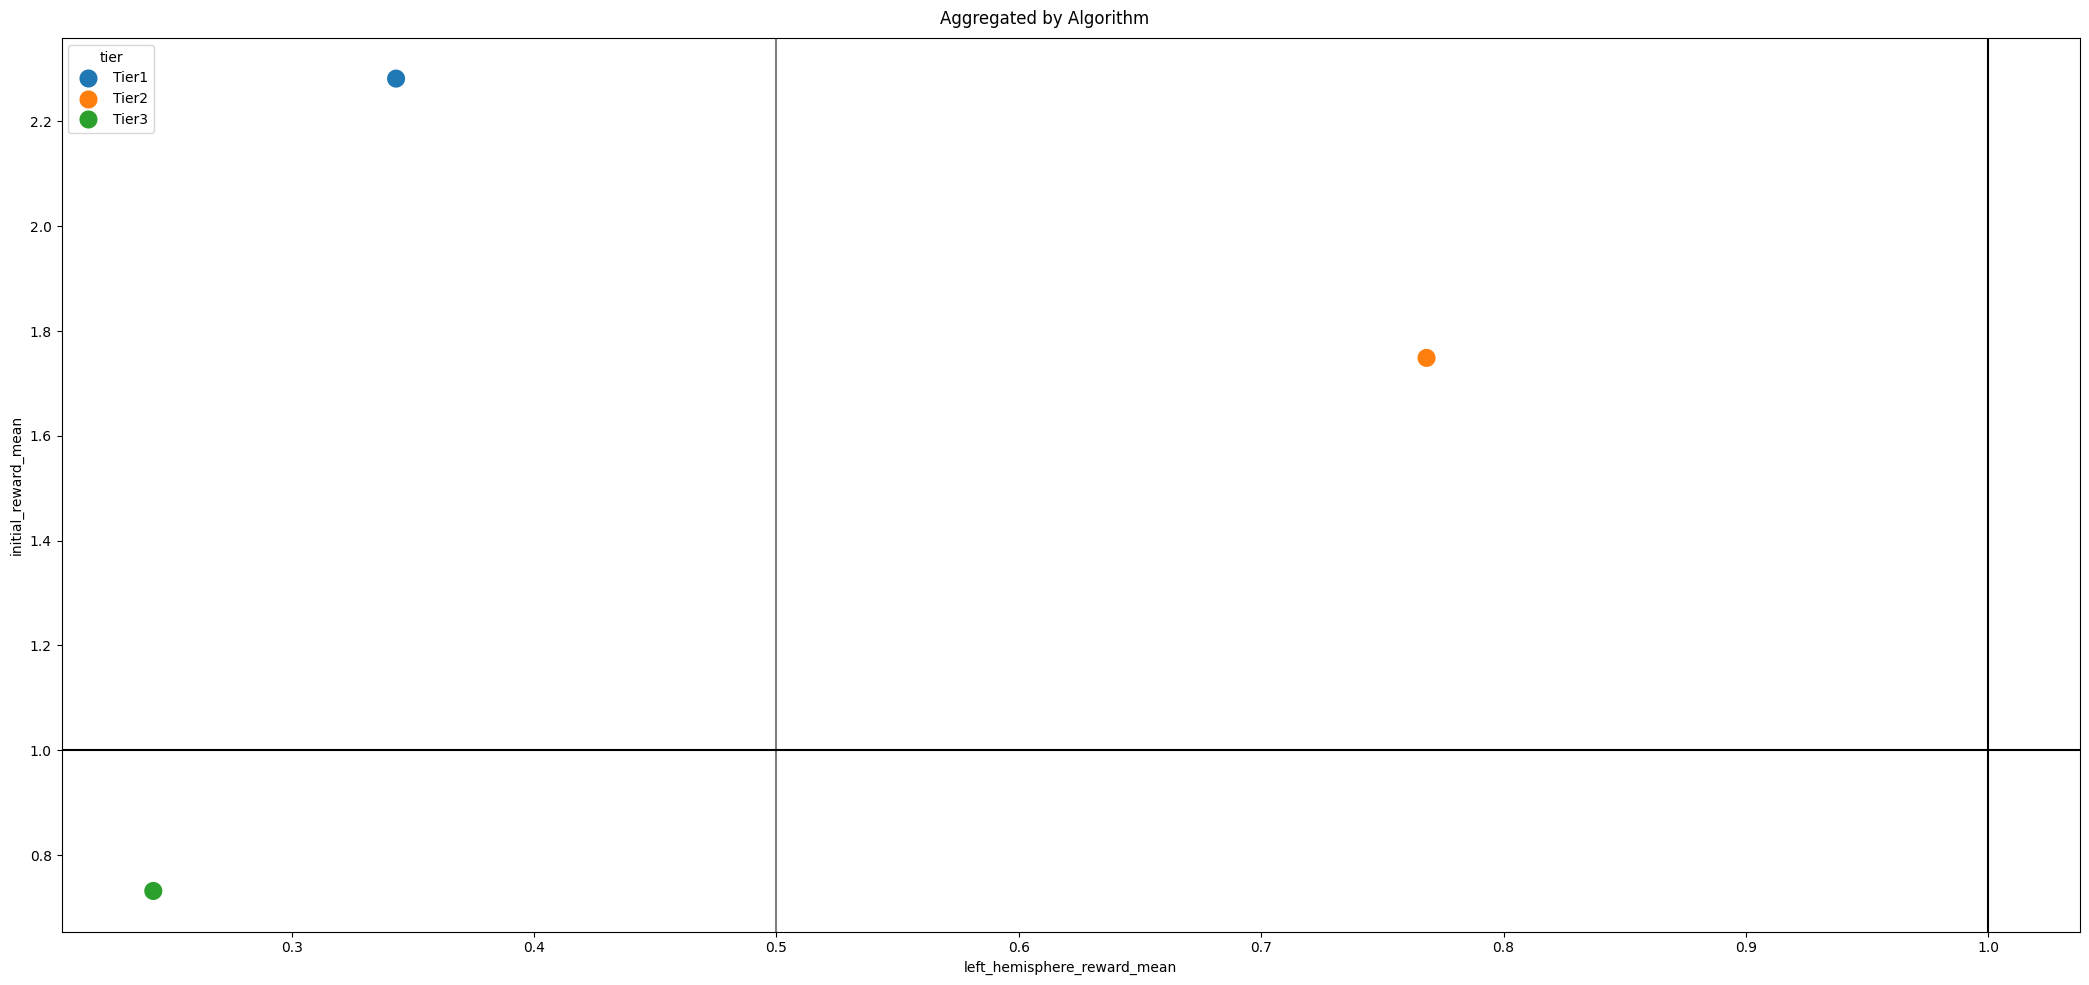

In [18]:
plot_agg_left_vs_initial(
    train_data.query(f"~run_name.isin({to_remove})"),
    test_data.query(f"~run_name.isin({to_remove})"),
    left_eval_data,
    agg_col='tier',
    initial_reward_col='reward_mean', 
    left_only_reward_col='reward_mean', 
    window=100, 
    min_over=1e6,
    title='Aggregated by Algorithm'
)

## 2. Get RL2 meta-train / test results


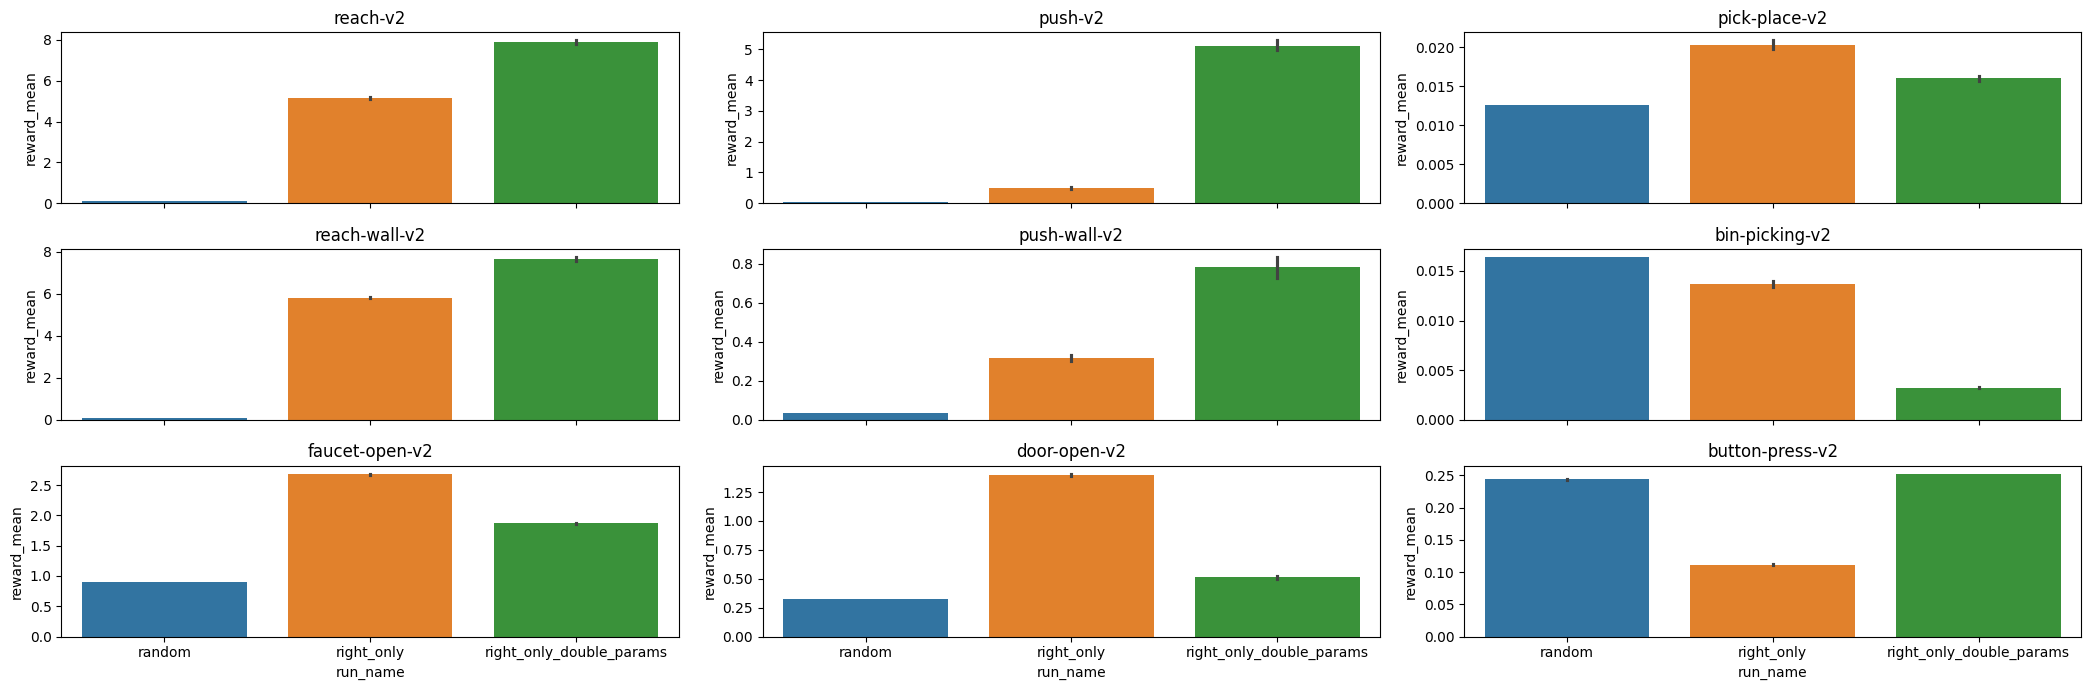

In [34]:
baselines = ['random', 'right_only', 'right_only_double_params']
to_plot = (
    train_data
    .query(f'run_name.isin({baselines})')

)

fig, ax = plt.subplots(3,3, figsize=(21, 7), sharex=True)
ax = ax.flatten()
for i, task in enumerate(training_tasks):
    
    sns.barplot(
        data = to_plot.query(f'training_task=="{task}"'),
        x='run_name',
        y = 'reward_mean',
        hue='run_name',
        ax = ax[i]
    )
    ax[i].set_title(task)

plt.tight_layout()
plt.show();

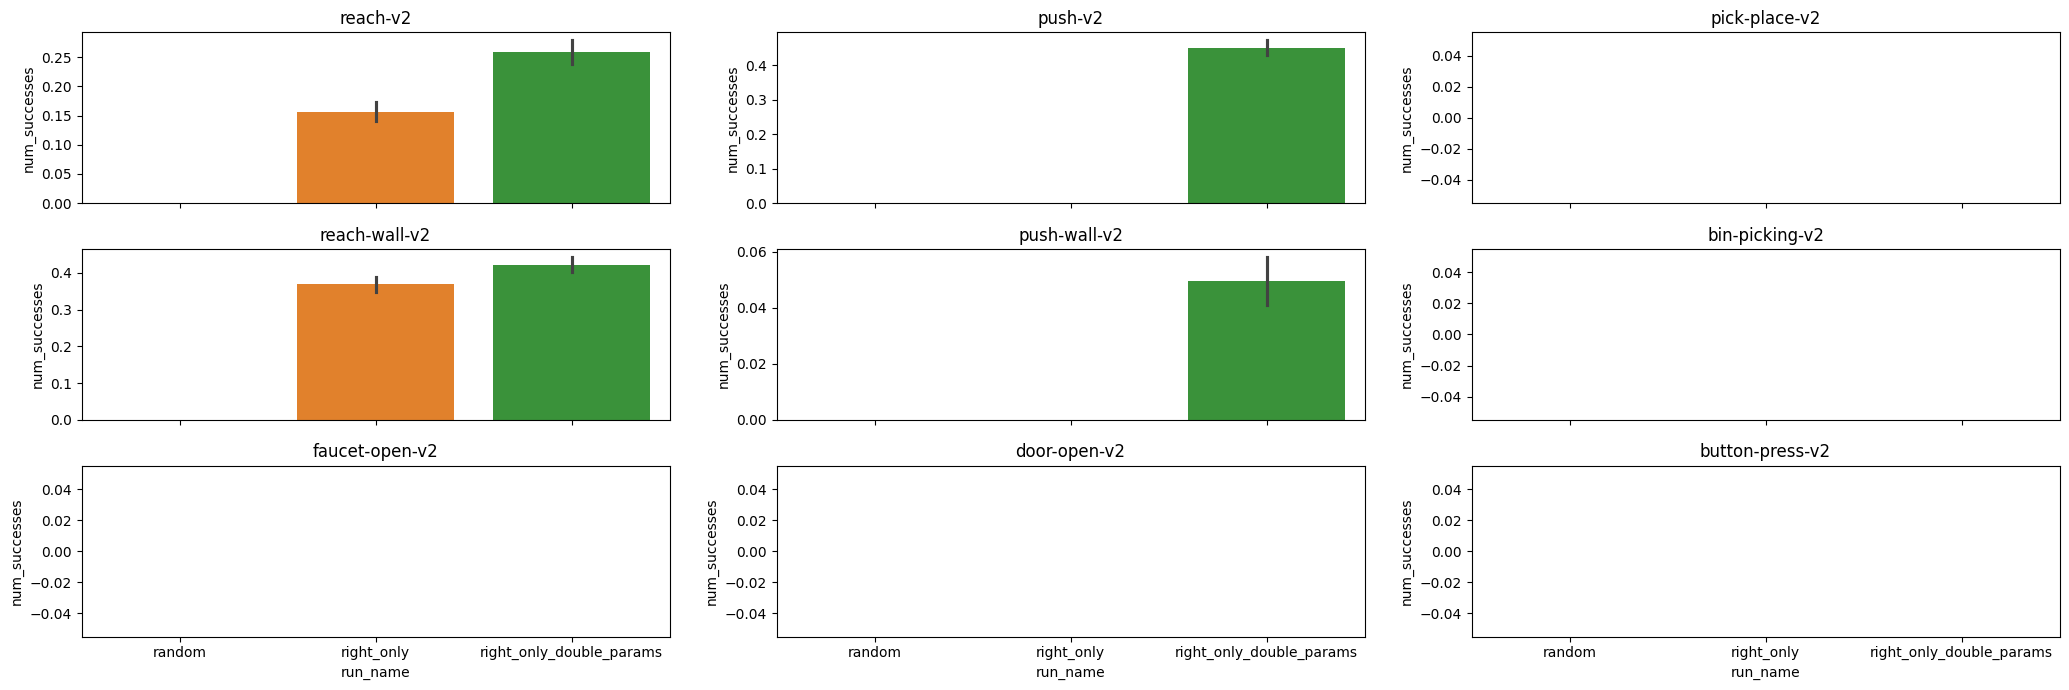

In [35]:

fig, ax = plt.subplots(3,3, figsize=(21, 7), sharex=True)
ax = ax.flatten()
for i, task in enumerate(training_tasks):
    
    sns.barplot(
        data = to_plot.query(f'training_task=="{task}"'),
        x='run_name',
        y = 'num_successes',
        hue='run_name',
        ax = ax[i]
    )
    ax[i].set_title(task)

plt.tight_layout()
plt.show();

## 2b. Train results for MetaRL

In [37]:
## single train files
reach_train = 'baselines/right_only_73/train/baseline_random_init_fixed20_reach-v2_right_only_2703_173421'
push_train = 'baselines/right_only_73/train/baseline_random_init_fixed20_push-v2_right_only_2703_174213'
pick_place_train = 'baselines/right_only_73/train/baseline_random_init_fixed20_pick-place-v2_right_only_2703_172550'

## double train files
reach_train_double = 'baselines/right_only_double_73/train/baseline_random_init_fixed20_reach-v2_right_only_2703_154646'
push_train_double = 'baselines/right_only_double_73/train/baseline_random_init_fixed20_push-v2_right_only_2703_155447'
pick_place_train_double = 'baselines/right_only_double_73/train/baseline_random_init_fixed20_pick-place-v2_right_only_2703_153459'

In [44]:
train_files = {
    'right_only': [reach_train, 
    push_train, 
    pick_place_train], 
    'right_only_double_params': [reach_train_double, 
    push_train_double, 
    pick_place_train_double]
}

read_results = lambda _file: pd.read_csv(os.path.join('../logs', _file, 'train_results.csv'))
metatraining_results = pd.DataFrame()
for run_name, files in train_files.items():
    for _file in files:

        tmp_df = (
            read_results(_file)
            .loc[:,['training_task', 'num_successes', 'reward_mean', 'frame'] + REWARD_QUANTILES]
            .assign(run_name = run_name)
        )

        metatraining_results = pd.concat([metatraining_results, tmp_df])

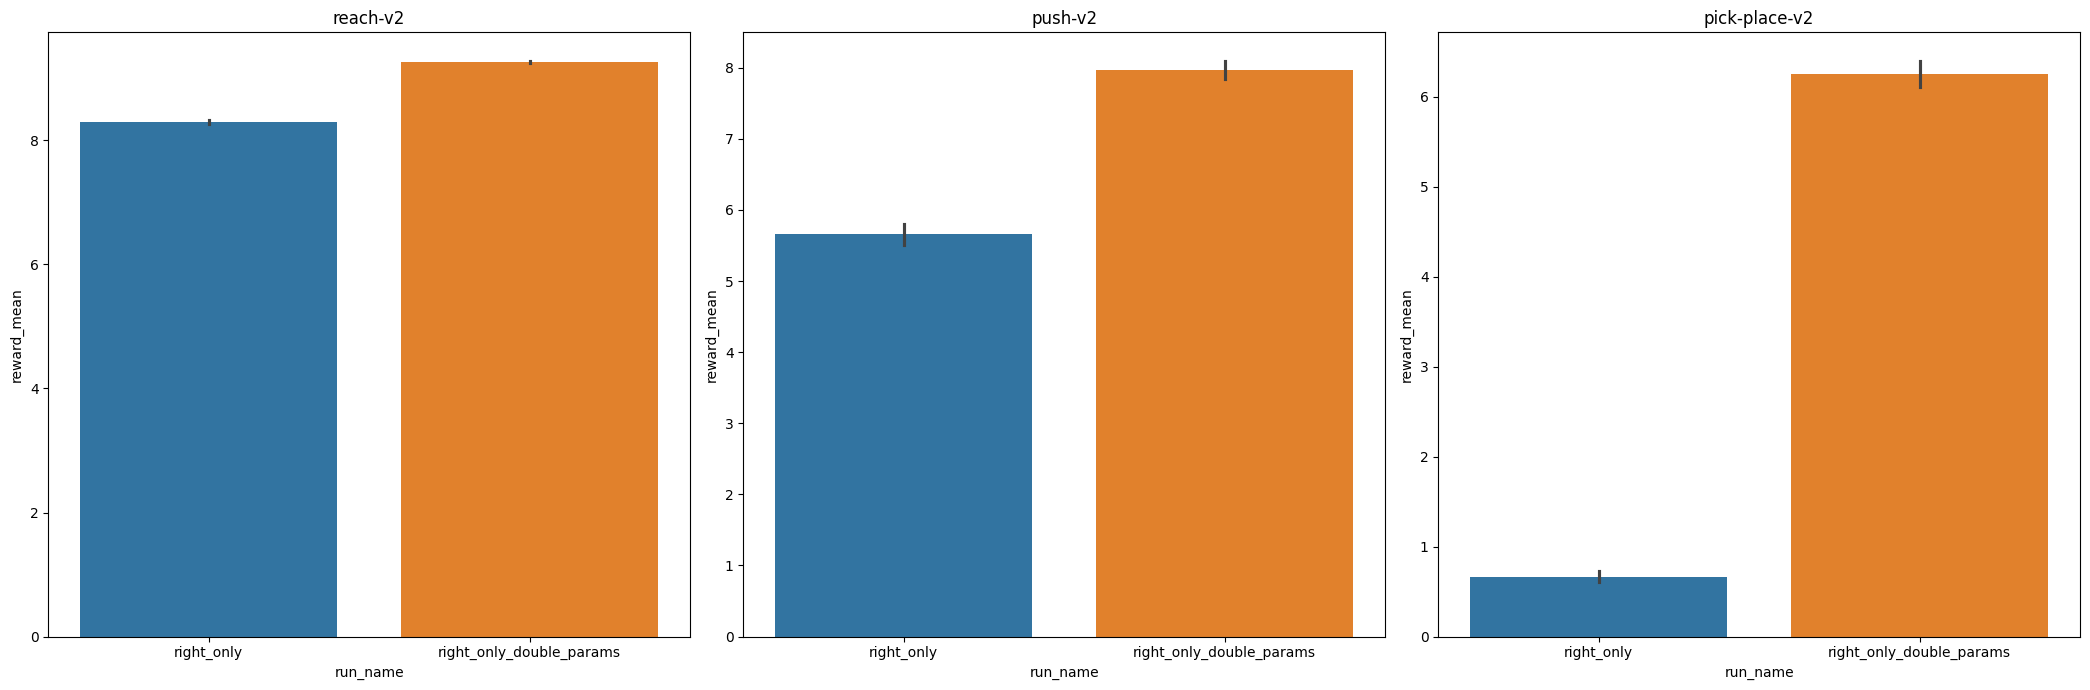

In [47]:
fig, ax = plt.subplots(1,3, figsize=(21, 7), sharex=True)
ax = ax.flatten()
for i, task in enumerate(training_tasks[:3]):
    
    sns.barplot(
        data = metatraining_results.query(f'training_task=="{task}"'),
        x='run_name',
        y = 'reward_mean',
        hue='run_name',
        ax = ax[i]
    )
    ax[i].set_title(task)

plt.tight_layout()
plt.show();

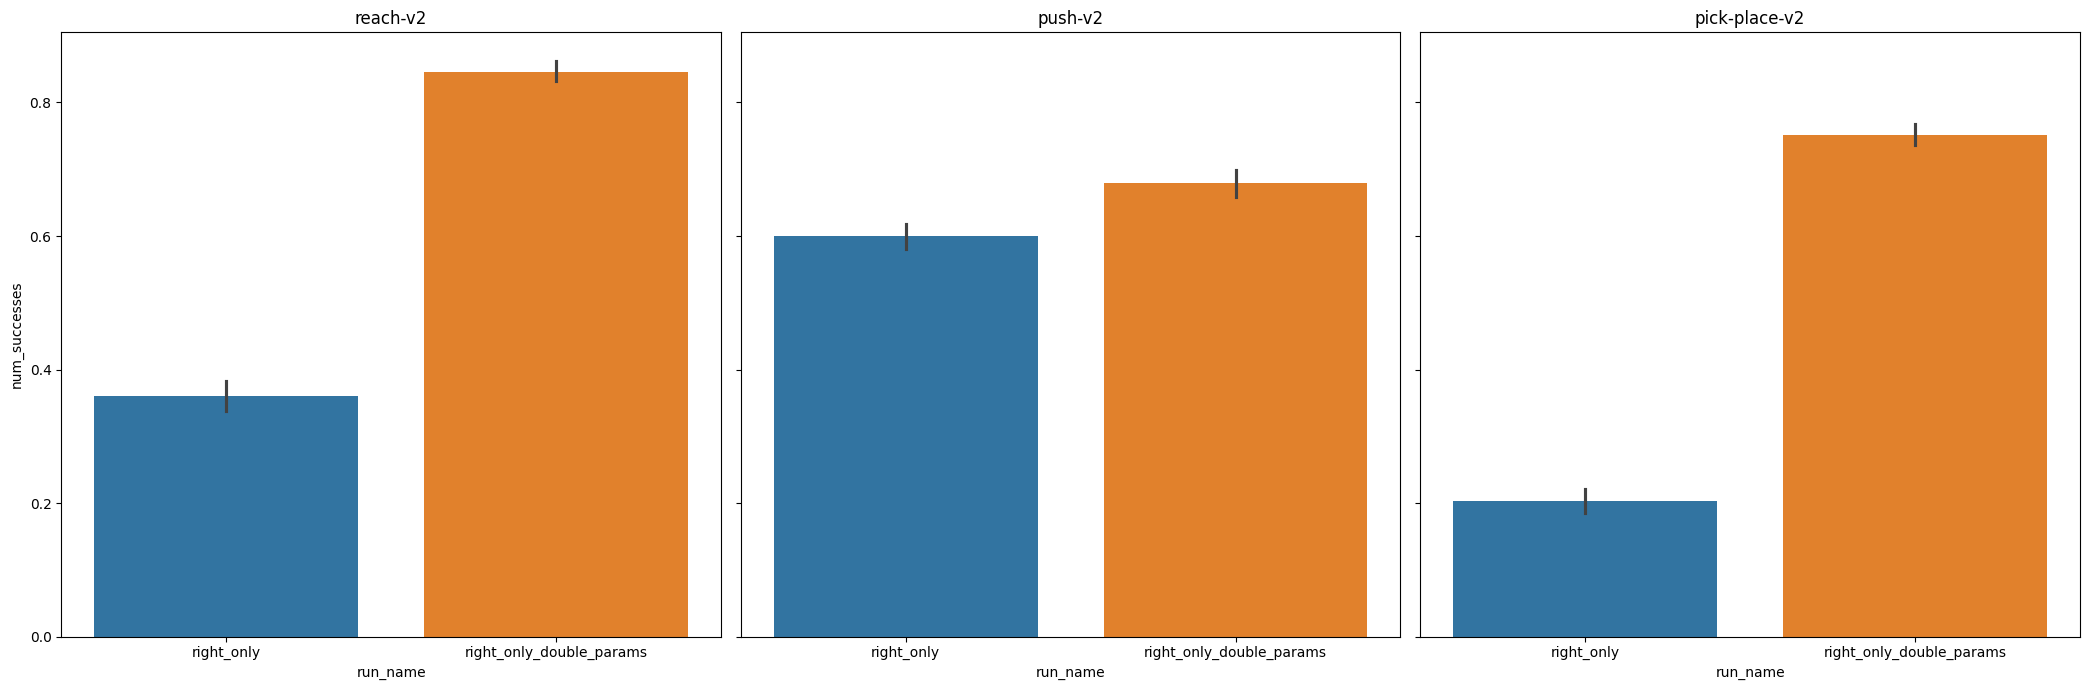

In [50]:
fig, ax = plt.subplots(1,3, figsize=(21, 7), sharex=True, sharey=True)
ax = ax.flatten()
for i, task in enumerate(training_tasks[:3]):
    
    sns.barplot(
        data = metatraining_results.query(f'training_task=="{task}"'),
        x='run_name',
        y = 'num_successes',
        hue='run_name',
        ax = ax[i]
    )
    ax[i].set_title(task)

plt.tight_layout()
plt.show();

In [41]:
pd.read_csv(os.path.join('../logs',reach_train, 'train_results.csv'))

training_task evaluation_task  num_successes  num_episodes  reward_mean  \
0       reach-v2        reach-v2           0.30            20     8.095872   
1       reach-v2        reach-v2           0.55            20     8.460143   
2       reach-v2        reach-v2           0.30            20     8.210568   
3       reach-v2        reach-v2           0.30            20     8.326355   
4       reach-v2        reach-v2           0.50            20     8.330327   
..           ...             ...            ...           ...          ...   
95      reach-v2        reach-v2           0.30            20     8.308614   
96      reach-v2        reach-v2           0.50            20     8.486239   
97      reach-v2        reach-v2           0.40            20     8.370259   
98      reach-v2        reach-v2           0.30            20     8.354804   
99      reach-v2        reach-v2           0.15            20     7.960027   

      rq_0.1    rq_0.2    rq_0.3    rq_0.4    rq_0.5  ...  gq_0.1  gq_0.2  \
0   6.851656  7.504416  7.726386  7.926195  8.123223  ...     0.0     0.0   
1   7.163835  7.653938  7.893486  8.282117  8.789682  ...     0.0     0.0   
2   7.010172  7.498466  7.808335  8.042393  8.274257  ...     0.0     0.0   
3   6.874767  7.625198  7.834053  8.090577  8.624137  ...     0.0     0.0   
4   7.456384  7.680326  7.922701  8.075830  8.356194  ...     0.0     0.0   
..       ...       ...       ...       ...       ...  ...     ...     ...   
95  7.258740  7.503222  7.794753  8.051299  8.533495  ...     0.0     0.0   
96  7.457185  7.697334  7.992264  8.428978  8.791100  ...     0.0     0.0   
97  7.070742  7.568038  7.970086  8.166412  8.768614  ...     0.0     0.0   
98  7.189794  7.544909  7.945061  8.267612  8.750669  ...     0.0     0.0   
99  6.791990  7.362898  7.641026  7.861890  8.036788  ...     0.0     0.0   

    gq_0.3  gq_0.4  gq_0.5  gq_0.6  gq_0.7  gq_0.8  gq_0.9    frame  
0      0.0     0.0     0.0     0.0     0.0     0.0     0.0    10000  
1      0.0     0.0     0.0     0.0     0.0     0.0     0.0    20000  
2      0.0     0.0     0.0     0.0     0.0     0.0     0.0    30000  
3      0.0     0.0     0.0     0.0     0.0     0.0     0.0    40000  
4      0.0     0.0     0.0     0.0     0.0     0.0     0.0    50000  
..     ...     ...     ...     ...     ...     ...     ...      ...  
95     0.0     0.0     0.0     0.0     0.0     0.0     0.0   960000  
96     0.0     0.0     0.0     0.0     0.0     0.0     0.0   970000  
97     0.0     0.0     0.0     0.0     0.0     0.0     0.0   980000  
98     0.0     0.0     0.0     0.0     0.0     0.0     0.0   990000  
99     0.0     0.0     0.0     0.0     0.0     0.0     0.0  1000000  

[100 rows x 24 columns]

## 3. Cross over point / BCR

In [19]:
def get_smoothed_results(df, reward_col, span):
    return (
        df
        .loc[:, ['frame', 'training_task', 'run_name', reward_col]]
        .set_index('frame')
        .groupby(['training_task', 'run_name'])
        .apply(lambda x: x[[reward_col]].ewm(span=span).mean())
        .reset_index()
    )

def get_left_comparison(df, reward_col):
    left_only_rewards = (
        df
        .loc[:, ['training_task','run_name', 'frame', reward_col]]
        .query('run_name == "left_only_double_params"')
        .rename(columns = {reward_col: f"left_{reward_col}"})
        .drop('run_name', axis=1)
    )

    bicameral_rewards = (
        df
        .query("run_name.str.contains('bicameral')")
        .loc[:, ['training_task','run_name', 'frame', reward_col]]
    )

    return (
        left_only_rewards
        .merge(
            bicameral_rewards,
            on=['training_task', 'frame']
            )
    )

def calc_bcr(df, reward_col):
    max_steps = df.frame.max()

    distinct_task_runs = (
        df
        .loc[:, ['training_task', 'run_name']]
        .groupby(['training_task', 'run_name'])
        .count()
        .reset_index()
    )
    ## get cross_over_point
    cross_over_point_df = (
        df
        .query(f'{reward_col} < left_{reward_col}')
        .loc[:, ['run_name', 'training_task', 'frame']]
        .groupby(['run_name', 'training_task'])
        .min()
        .reset_index()
        .rename(columns={'frame': 'cross_over_point'})
        .merge(
            distinct_task_runs,
            on = ['training_task', 'run_name'],
            how='outer'
        )
        .fillna(max_steps)
    )

    bcr_df = (
        pd.merge(
            df,
            cross_over_point_df,
            on = ['run_name', 'training_task']
        )
        .assign(
            stage = lambda x: 1*(x.frame >= x.cross_over_point),
            benefit = lambda x: x[reward_col] - x[f"left_{reward_col}"],
            cost = lambda x: x[f"left_{reward_col}"] - x[reward_col]
        )
        .groupby(['training_task', 'run_name', 'stage'])
        .agg(
            {
                'benefit':'sum',
                'cost':'sum',
                'cross_over_point':'max'
            }
        )
        .reset_index()
    )

    ## split out costs and benefits by stage (i.e. before / after cross-over point)
    stage_0_benefits = (
        bcr_df
        .query('stage==0')
        .loc[:, ['training_task', 'run_name','benefit','cross_over_point']]
    )
    stage_1_costs = (
        bcr_df
        .query('stage==1')
            .loc[:, ['training_task', 'run_name','cost']]
    )

    return (
        pd.merge(
            stage_0_benefits,
            stage_1_costs,
            on = ['training_task', 'run_name'],
            how = 'outer'
        )
        .fillna(0)
        .assign(benefit_cost_ratio = lambda x: x.benefit / x.cost)
    )

# df.assign(bcr=lambda x: x['bcr'].where(x['benefit'] >= 0, 5).where(x['cost'] >= 0, 0))
def plot_bcr_heatmap(bcr_df, ax, annot_dict = {0: 'Left dominates', 5: 'Bicameral dominates'}):
    cleaned_bcr_results = (
        bcr_df
            .assign(
                benefit_cost_ratio = lambda x: x.benefit_cost_ratio.apply(lambda y: 5 if y < 0 else y)
            )
            .assign(
                annot = lambda x: x.benefit_cost_ratio.apply(
                    lambda y: annot_dict.get(y) if annot_dict.get(y) is not None else np.round(y, 3))
            )
    )
    heatmap_df = (
        cleaned_bcr_results
        .pivot_table(
            columns=['run_name'],
            values=['benefit_cost_ratio'],
            index=['training_task'])
    )

    annot_df = (
        cleaned_bcr_results
        .pivot_table(
            columns=['run_name'],
            values=['annot'],
            index=['training_task'], 
            aggfunc='max'
        )
    )

    sns.heatmap(
        data = heatmap_df,
        annot = annot_df,
        vmin=0,
        vmax=2,
        cbar=False,
        fmt="",
        ax = ax,
        annot_kws={'size':20}
    )


def get_bcr_heatmap(df,reward_col, span, ax):
    reward_col='reward_mean'

    smoothed_df = get_smoothed_results(
        df, 
        reward_col=reward_col,
        span=span
    )

    left_comparison = get_left_comparison(
        smoothed_df, 
        reward_col = reward_col
    )

    bcr_result = calc_bcr(
        left_comparison,
        reward_col=reward_col
    )

    plot_bcr_heatmap(bcr_result, ax)

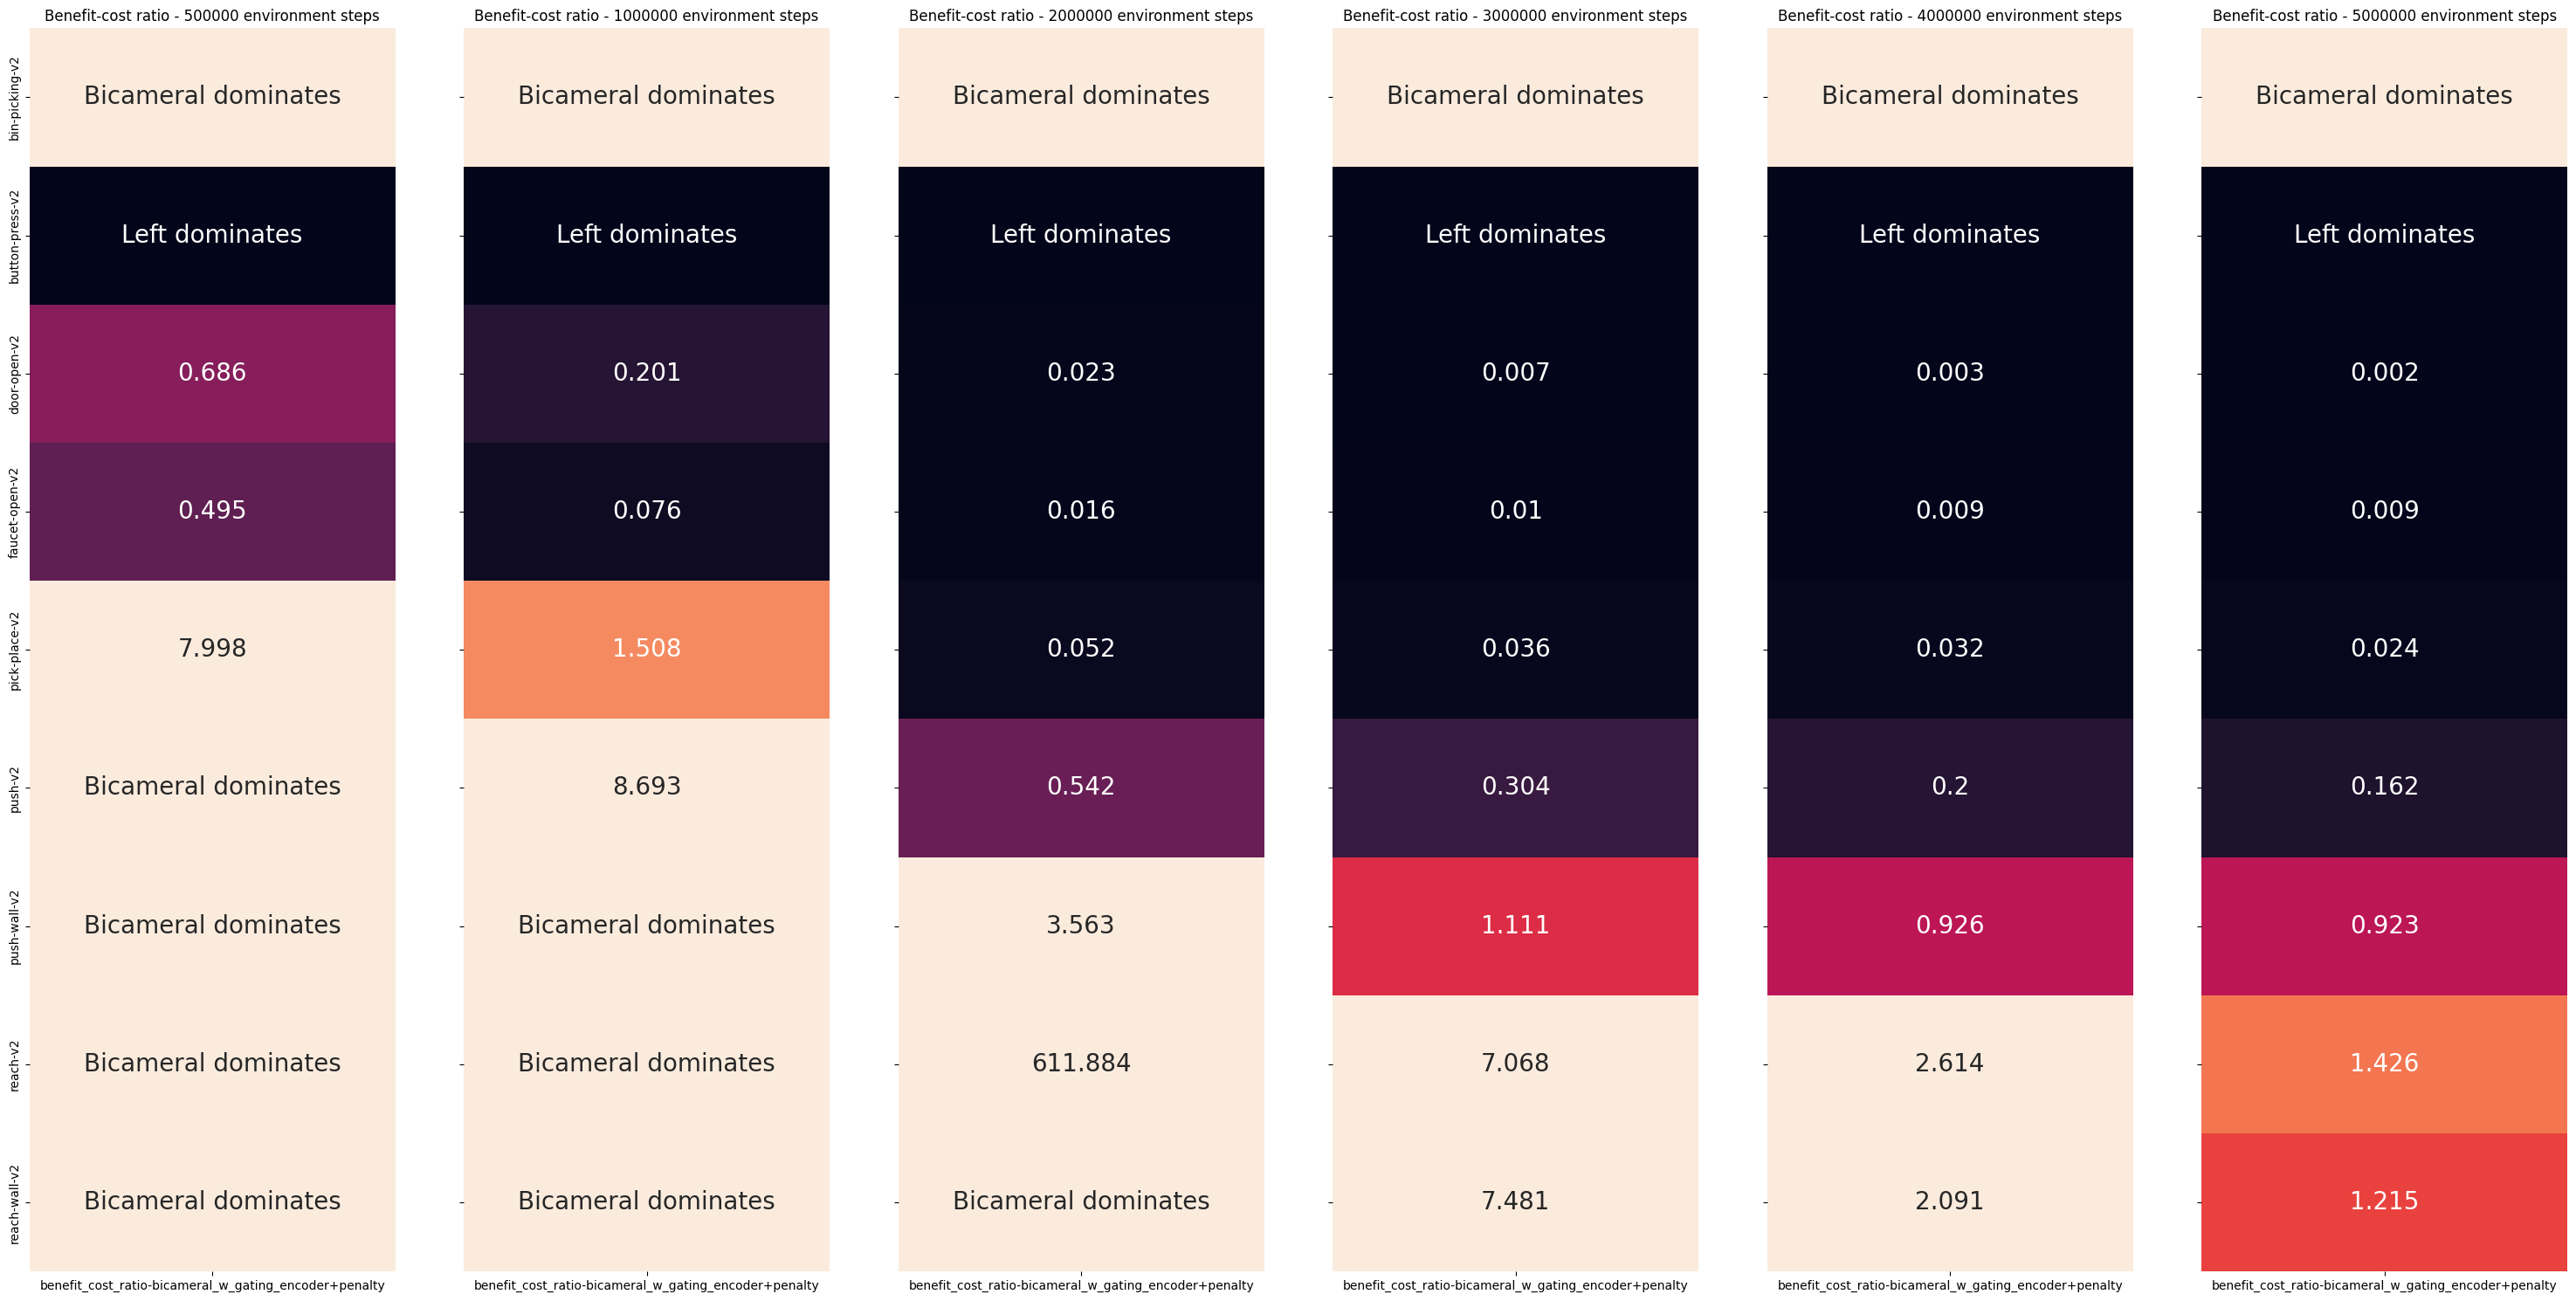

In [20]:
to_remove = ['random', 'right_only']
to_do =['bicameral_w_gating_encoder+penalty','left_only_double_params']
reward_col = 'reward_mean'
frame_lims = [5e5, 1e6, 2e6, 3e6, 4e6, 5e6]
span=10

fig, ax = plt.subplots(1,6,figsize= (30, 15), sharex = True, sharey=True)
ax = ax.flatten()

for i, frame_lim in enumerate(frame_lims):

    df = (
        train_data
        .query(f'run_name.isin({to_do})')
        .query(f'frame <= {frame_lim}')
    )

    get_bcr_heatmap(df, reward_col, span, ax[i])
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].set_title(f'Benefit-cost ratio - {int(frame_lim)} environment steps')


plt.tight_layout()
plt.show();

In [21]:
max_steps = 1e6
reward_col = 'reward_mean'
df = (
    train_data
    .query(f'~run_name.isin({to_remove})')
    .query(f'frame <= 1e6')
)
df = get_smoothed_results(df, reward_col, 10)
df = get_left_comparison(df, reward_col)

cross_over_point = (
    df
    .query(f'{reward_col} < left_{reward_col}')
    .loc[:, ['run_name', 'training_task', 'frame']]
    .groupby(['run_name', 'training_task'])
    .min()
    .reset_index()
    .rename(columns={'frame': 'cross_over_point'})
    .merge(
        distinct_task_runs,
        on = ['training_task', 'run_name'],
        how='outer'
    )
    .fillna(max_steps)
)
# k = calc_bcr(df, reward_col)
# k

NameError: name 'distinct_task_runs' is not defined

In [ ]:
cross_over_point_df

training_task    frame  left_reward_mean  \
0     button-press-v2    10000          0.159898   
1     button-press-v2    10000          0.159898   
2     button-press-v2    10000          0.159898   
3     button-press-v2    20000          0.169554   
4     button-press-v2    20000          0.169554   
...               ...      ...               ...   
1795         reach-v2   990000          6.527842   
1796         reach-v2   990000          6.527842   
1797         reach-v2  1000000          6.623548   
1798         reach-v2  1000000          6.623548   
1799         reach-v2  1000000          6.623548   

                                run_name  reward_mean  
0             bicameral_w_gating_encoder     0.145649  
1     bicameral_w_gating_encoder+penalty     0.140902  
2            bicameral_w_gating_schedule     0.122894  
3             bicameral_w_gating_encoder     0.146888  
4     bicameral_w_gating_encoder+penalty     0.146144  
...                                  ...          ...  
1795  bicameral_w_gating_encoder+penalty     7.209668  
1796         bicameral_w_gating_schedule     8.456949  
1797          bicameral_w_gating_encoder     8.017995  
1798  bicameral_w_gating_encoder+penalty     7.319661  
1799         bicameral_w_gating_schedule     8.387177  

[1800 rows x 5 columns]

In [ ]:
reward_col = 'reward_mean'
df = (
    train_data
    .query(f'~run_name.isin({to_remove})')
    .query(f'frame <= 5e6')
)
df = get_smoothed_results(df, reward_col, 10)
df = get_left_comparison(df, reward_col)


cross_over_point_df = (
    df
    .assign(stage = lambda x: x[f'left_{reward_col}'] > x[reward_col])
    .loc[:, ['run_name', 'training_task', 'frame', 'stage']]
    # .groupby(['run_name', 'training_task', 'stage'])
    # .min()
    # .reset_index()
    # .rename(columns={'frame': 'cross_over_point'})
    # .pivot(
    #     index =['run_name', 'training_task'],
    #     values = 'cross_over_point',
    #     columns='stage'
    # )
#     .reset_index()
#     .rename(columns={True: 'pre_cross_over', False: 'post_cross_over'})
#     .fillna({'post_cross_over': 0, 'pre_cross_over': 5e6})
#     .assign(cross_over_point = lambda x: (x.post_cross_over / 10000) * x.pre_cross_over)
#     .drop(['post_cross_over', 'pre_cross_over'], axis=1)
)

# bcr_df = (
#     pd.merge(
#         df,
#         cross_over_point_df,
#         on = ['run_name', 'training_task']
#     )
#     .assign(
#         stage = lambda x: 1*(x.frame >= x.cross_over_point),
#         benefit = lambda x: x[reward_col] - x[f"left_{reward_col}"],
#         cost = lambda x: x[f"left_{reward_col}"] - x[reward_col]
#     )
#     .groupby(['training_task', 'run_name', 'stage'])
#     .agg(
#         {
#             'benefit':'sum',
#             'cost':'sum',
#             'cross_over_point':'max'
#         }
#     )
#     .reset_index()
# )

In [ ]:
# Find the first iteration where reward2 is greater than reward1
def get_cross_over_point(df):
    first_iteration_reward2_gt_reward1 = df.loc[df['left_reward_mean'] > df['reward_mean'], 'frame'].min()

    # If reward1 is always greater than reward2, return the maximum iter
    if (df['reward_mean'] > df['left_reward_mean']).all():
        result = df['frame'].max()
    # If reward2 is always greater than reward1, return the minimum iter
    elif (df['left_reward_mean'] > df['reward_mean']).all():
        result = 0#df['frame'].min()
    # Otherwise, return the first iteration where reward2 is greater than reward1
    else:
        result = first_iteration_reward2_gt_reward1

    return result

df.groupby(['training_task','run_name']).apply(get_cross_over_point).reset_index()

KeyError: 'left_reward_mean'

In [ ]:
reward_col='reward_mean'

smoothed_df2 = get_smoothed_results(
    (
        train_data
        .query(f"~run_name.isin({to_remove})")
    ), 
    reward_col=reward_col,
    span=10
)

left_comparison2 = get_left_comparison(
    smoothed_df2, 
    reward_col = reward_col
)

left_comparison2

training_task    frame  left_reward_mean  \
0     button-press-v2    10000          0.159898   
1     button-press-v2    10000          0.159898   
2     button-press-v2    10000          0.159898   
3     button-press-v2    20000          0.169554   
4     button-press-v2    20000          0.169554   
...               ...      ...               ...   
8995         reach-v2  4990000          8.611332   
8996         reach-v2  4990000          8.611332   
8997         reach-v2  5000000          8.629772   
8998         reach-v2  5000000          8.629772   
8999         reach-v2  5000000          8.629772   

                                run_name  reward_mean  
0             bicameral_w_gating_encoder     0.145649  
1     bicameral_w_gating_encoder+penalty     0.140902  
2            bicameral_w_gating_schedule     0.122894  
3             bicameral_w_gating_encoder     0.146888  
4     bicameral_w_gating_encoder+penalty     0.146144  
...                                  ...          ...  
8995  bicameral_w_gating_encoder+penalty     8.176569  
8996         bicameral_w_gating_schedule     7.177553  
8997          bicameral_w_gating_encoder     8.694279  
8998  bicameral_w_gating_encoder+penalty     8.154990  
8999         bicameral_w_gating_schedule     7.131496  

[9000 rows x 5 columns]

In [ ]:
distinct_task_runs = (
    left_comparison2
    .loc[:, ['training_task', 'run_name']]
    .groupby(['training_task', 'run_name'])
    .count()
    .reset_index()
)


(
    left_comparison2
    .query('frame<1e6')
    .query(f'{reward_col} < left_{reward_col}')
    .loc[:, ['run_name', 'training_task', 'frame']]
    .groupby(['run_name', 'training_task'])
    .min()
    .reset_index()
    .rename(columns={'frame': 'cross_over_point'})
    .merge(
        distinct_task_runs,
        on = ['training_task', 'run_name'],
        how='outer'
    )
    .fillna(1e6)
)

NameError: name 'left_comparison2' is not defined

In [ ]:
reward_col='reward_mean'

smoothed_df2 = get_smoothed_results(
    (
        train_data
        .query(f"~run_name.isin({to_remove})")
    ), 
    reward_col=reward_col,
    span=10
)

left_comparison2 = get_left_comparison(
    smoothed_df2, 
    reward_col = reward_col
)

bcr_result2 = calc_bcr(
    left_comparison2,
    reward_col=reward_col
)

plot_bcr_heatmap(bcr_result2)

NameError: name 'get_smoothed_results' is not defined

In [ ]:
reward_col = 'reward_mean'

smoothed_df = (
    train_data
    .query(f"~run_name.isin({to_remove})")
    .loc[:, ['frame', 'training_task', 'run_name', reward_col]]
    .set_index('frame')
    .groupby(['training_task', 'run_name'])
    .apply(lambda x: x[[reward_col]].ewm(span=25).mean())
    .reset_index()
)

left_only_rewards = (
    smoothed_df
    .loc[:, ['training_task','run_name', 'frame', reward_col]]
    .query('run_name == "left_only_double_params"')
    .rename(columns = {reward_col: f"left_{reward_col}"})
    .drop('run_name', axis=1)
)

bicameral_rewards = (
    smoothed_df
    .query("run_name.str.contains('bicameral')")
    .loc[:, ['training_task','run_name', 'frame', reward_col]]
)

joined_rewards = (
    left_only_rewards
    .merge(
        bicameral_rewards,
        on=['training_task', 'frame']
        )
)

cross_over_point_df = (
    joined_rewards
    .query(f'left_{reward_col} > {reward_col}')
    .loc[:, ['run_name', 'training_task', 'frame']]
    .groupby(['run_name', 'training_task'])
    .min()
    .reset_index()
    .rename(columns={'frame': 'cross_over_point'})
)

In [ ]:
bcr_df = (
    joined_rewards
    .merge(
        cross_over_point_df,
        on = ['run_name', 'training_task']
    )
    .assign(
        stage = lambda x: 1*(x.frame >= x.cross_over_point),
        benefit = lambda x: x.reward_mean - x.left_reward_mean,
        cost = lambda x: x.left_reward_mean - x.reward_mean
    )
    .groupby(['training_task', 'run_name', 'stage'])
    .agg(
        {
            'benefit':'sum',
            'cost':'sum',
            'cross_over_point':'max'
        }
    )
    .reset_index()
)




In [ ]:
bcr_results

training_task                            run_name     benefit  \
0      door-open-v2          bicameral_w_gating_encoder   15.628028   
1      door-open-v2  bicameral_w_gating_encoder+penalty    6.033044   
2      door-open-v2         bicameral_w_gating_schedule    4.824986   
3    faucet-open-v2          bicameral_w_gating_encoder   12.353996   
4    faucet-open-v2  bicameral_w_gating_encoder+penalty   13.420311   
5    faucet-open-v2         bicameral_w_gating_schedule    5.647220   
6     pick-place-v2          bicameral_w_gating_encoder   29.378297   
7     pick-place-v2  bicameral_w_gating_encoder+penalty    3.817131   
8     pick-place-v2         bicameral_w_gating_schedule    7.431564   
9           push-v2          bicameral_w_gating_encoder  360.172745   
10          push-v2  bicameral_w_gating_encoder+penalty  149.192945   
11          push-v2         bicameral_w_gating_schedule  316.842688   
12         reach-v2          bicameral_w_gating_encoder  382.814781   
13         reach-v2  bicameral_w_gating_encoder+penalty  226.358964   
14         reach-v2         bicameral_w_gating_schedule  398.130382   
15  button-press-v2          bicameral_w_gating_encoder    0.000000   
16  button-press-v2  bicameral_w_gating_encoder+penalty    0.000000   
17  button-press-v2         bicameral_w_gating_schedule    0.000000   

    cross_over_point         cost  benefit_cost_ratio  
0           910000.0  1647.791281            0.009484  
1           280000.0  2077.204802            0.002904  
2           210000.0  1675.341197            0.002880  
3           190000.0  1172.963866            0.010532  
4           230000.0  1188.380119            0.011293  
5            80000.0  1439.154973            0.003924  
6          1540000.0  -476.609397           -0.061640  
7           380000.0   126.944325            0.030069  
8           730000.0   333.489047            0.022284  
9          1630000.0   196.003716            1.837581  
10          870000.0   875.721937            0.170366  
11         1380000.0  1504.630146            0.210578  
12         4670000.0    -1.068900         -358.138888  
13         1980000.0   143.051290            1.582362  
14         2680000.0   203.345941            1.957897  
15               0.0   447.640444            0.000000  
16               0.0   392.863716            0.000000  
17               0.0   687.691167            0.000000

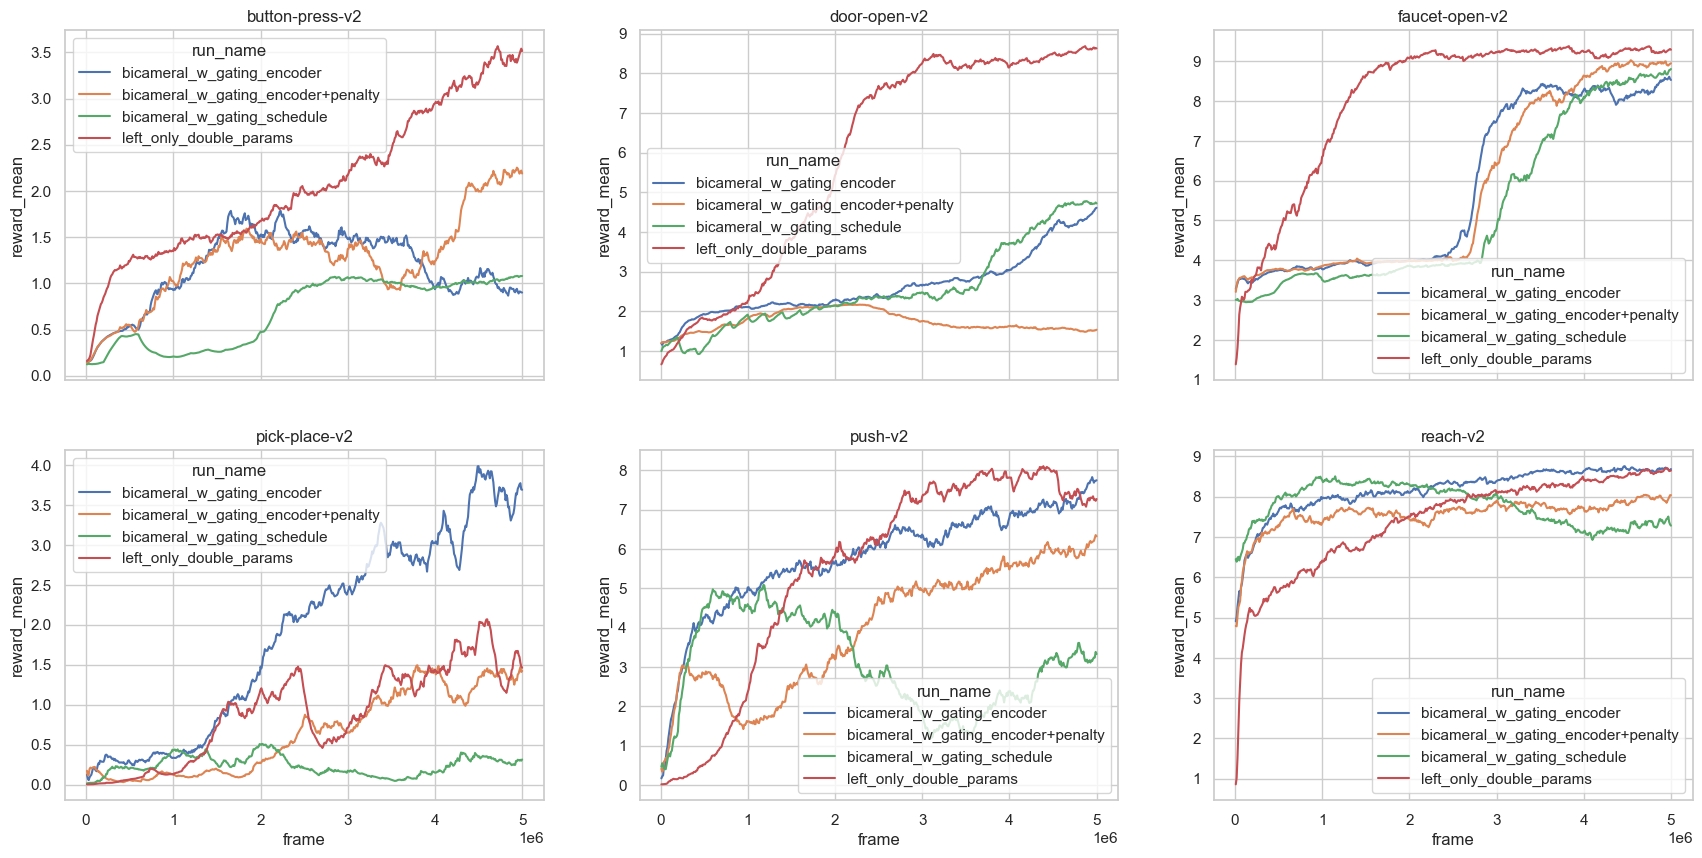

In [ ]:
fig, ax = plt.subplots(2,3, figsize = (21, 10), sharex=True)
ax = ax.flatten()
for i, task in enumerate(training_tasks):
    sns.lineplot(
        data = smoothed_df.query(f"training_task=='{task}'"),
        x = 'frame',
        y = 'reward_mean',
        hue='run_name',
        ax = ax[i]
    )
    # ax[i].axvline(bcr_df.query(f"training_task=='{task}'").loc[:,'cross_over_point'].values)
    ax[i].set_title(task)

In [ ]:
stage_0_benefits = (
    bcr_df
    .query('stage==0')
    .loc[:, ['training_task', 'run_name','benefit','cross_over_point']]
)
stage_1_costs = (
    bcr_df
    .query('stage==1')
        .loc[:, ['training_task', 'run_name','cost']]
)

bcr_results = (
    pd.merge(
        stage_0_benefits,
        stage_1_costs,
        on = ['training_task', 'run_name'],
        how = 'outer'
    )
    .fillna(0)
    .assign(benefit_cost_ratio = lambda x: x.benefit / x.cost)
)

<Axes: xlabel='None-run_name', ylabel='training_task'>

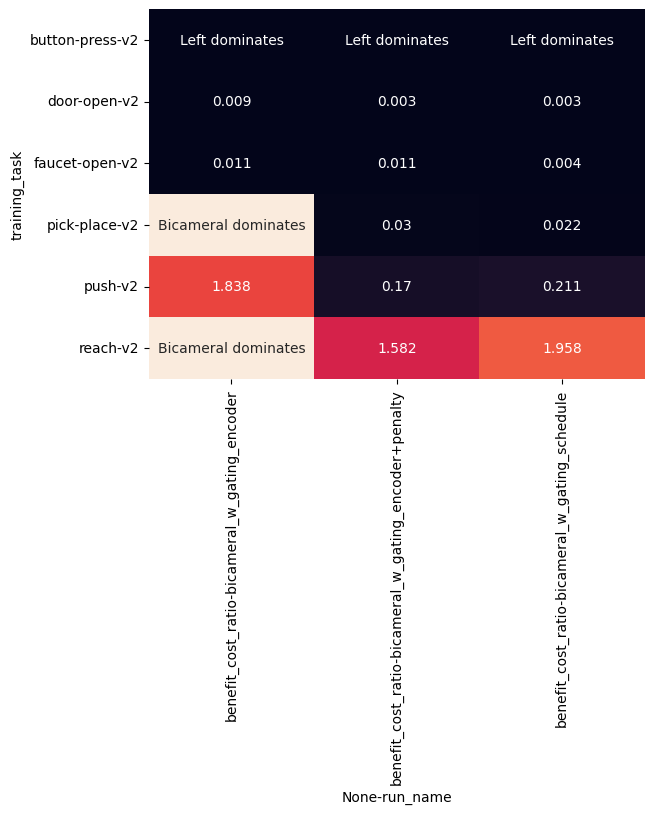

In [ ]:
annot_dict = {0: 'Left dominates', 5: 'Bicameral dominates'}
cleaned_bcr_results = (
        bcr_results
            .assign(benefit_cost_ratio = lambda x: x.benefit_cost_ratio.apply(lambda y: 5 if y < 0 else y))
            .assign(
                annot = lambda x: x.benefit_cost_ratio.apply(
                    lambda y: annot_dict.get(y) if annot_dict.get(y) is not None else np.round(y, 3))
            )
)
heatmap_df = (
    cleaned_bcr_results
    .pivot_table(
        columns=['run_name'],
        values=['benefit_cost_ratio'],
        index=['training_task'])
)

annot_df = (
    cleaned_bcr_results
    .pivot_table(
        columns=['run_name'],
        values=['annot'],
        index=['training_task'], aggfunc='max')
)


sns.heatmap(
    data = heatmap_df,
    annot = annot_df,
    vmin=0,
    vmax=3,
    cbar=False,
    fmt=""
)

In [ ]:
combined_test_left_df = (
    pd.merge(
        (
            left_eval_data
            .loc[:,['frame','training_task','run_name', 'reward_mean']]
        ), 
        (
            test_data
            .query(f"run_name=='left_only_double_params'")
            .loc[:,['frame','training_task', 'reward_mean']]
            .rename(columns = {'reward_mean':'left_reward_mean'})
        ),
        on=['frame', 'training_task']
    )
    .assign(
        stage=lambda x: 1*(x.frame >= 4e6),
        reward_diff = lambda x: x.reward_mean - x.left_reward_mean
    )
    .drop(['frame', 'left_reward_mean', 'reward_mean'], axis=1)
    .groupby(['training_task', 'run_name', 'stage'])
    .sum()
    .reset_index()
    
)




<Axes: xlabel='benefit', ylabel='reward_diff'>

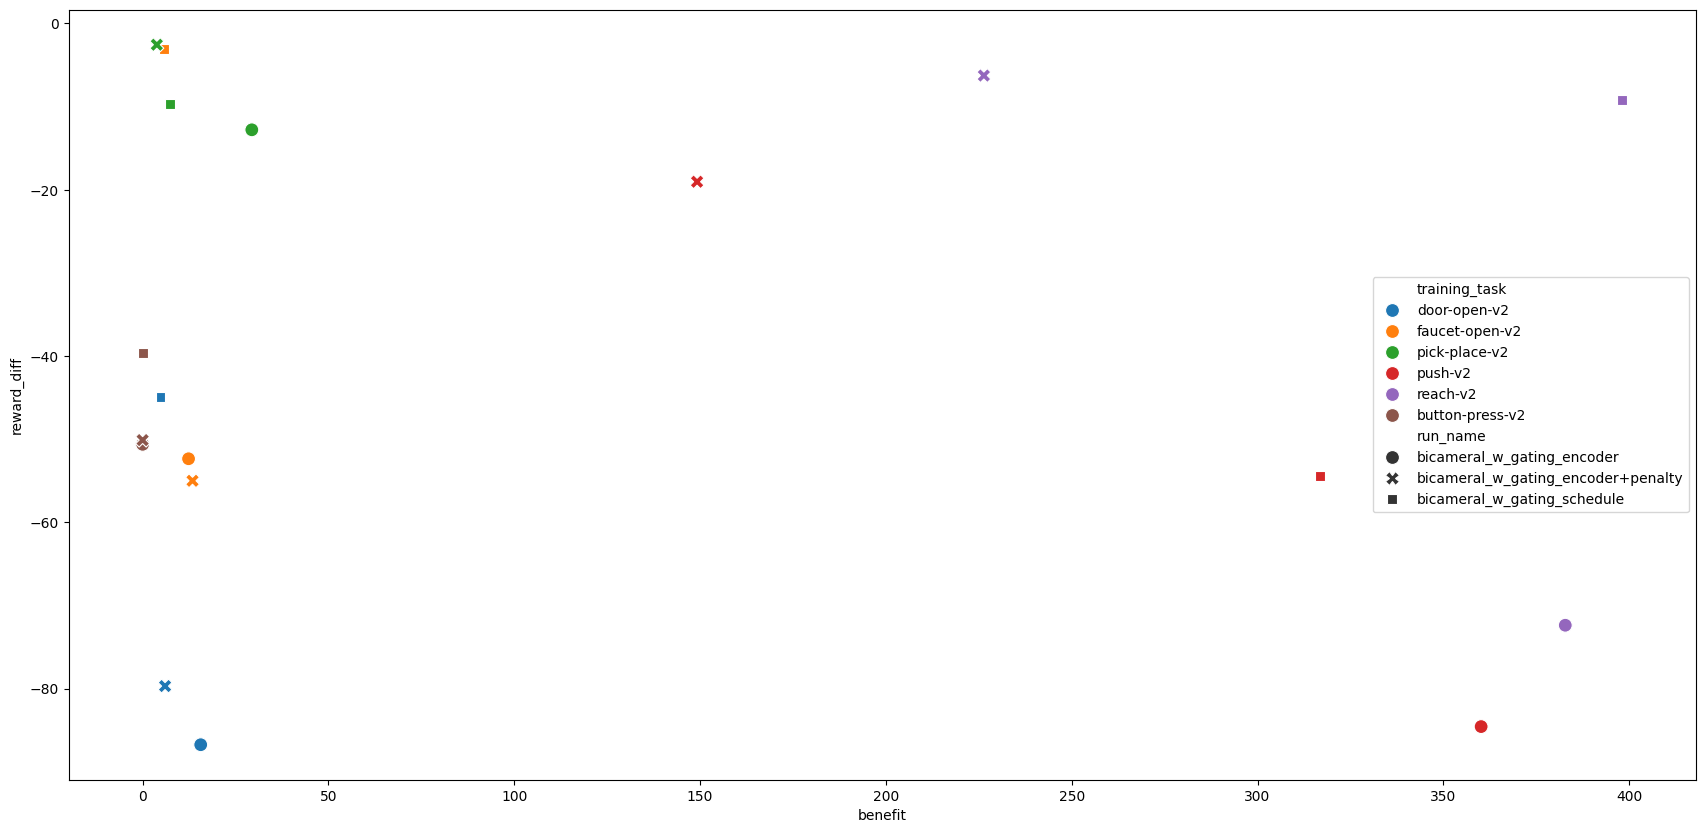

In [ ]:
bcr_to_left_comp = (
    bcr_results
    .merge(
        combined_test_left_df.query('stage==1'), 
        on = ['training_task', 'run_name'])
)

fig, ax = plt.subplots(figsize=(21, 10))

sns.scatterplot(
    data = bcr_to_left_comp,
    x = 'benefit',
    y= 'reward_diff',
    hue = 'training_task',
    style='run_name',
    s=100
)

<Axes: xlabel='stage', ylabel='reward_diff'>

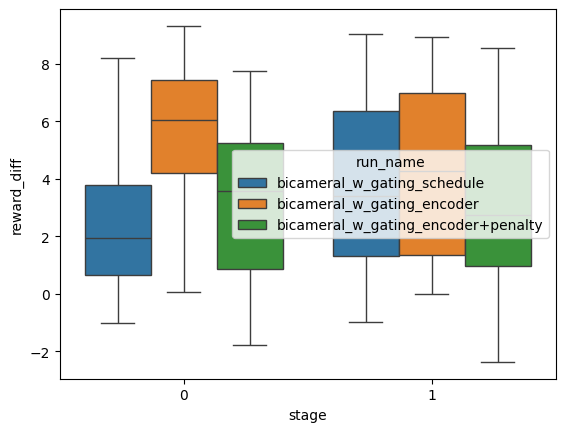

In [ ]:
sns.boxplot(
    data = combined_test_left_df,
    x='stage',
    y='reward_diff',
    hue='run_name'

)

<Axes: xlabel='training_task', ylabel='cross_over_point'>

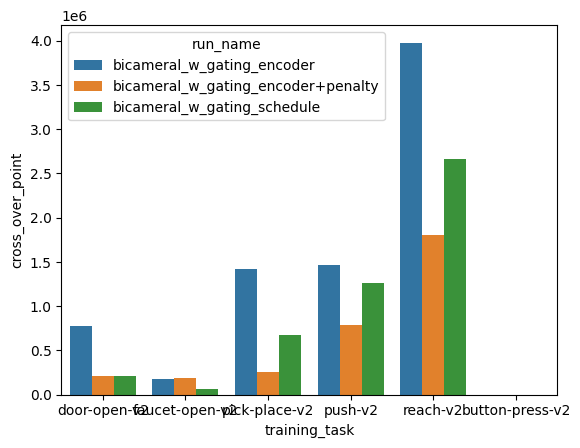

In [ ]:

sns.barplot(
    data = bcr_results,
    x = 'training_task',
    y = 'cross_over_point',
    hue='run_name'
)

<Axes: xlabel='training_task', ylabel='benefit_cost_ratio'>

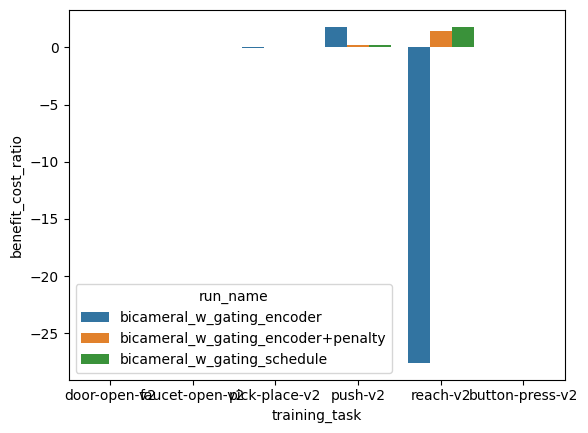

In [ ]:
sns.barplot(
    data = bcr_results,
    x = 'training_task',
    y = 'benefit_cost_ratio',
    hue='run_name'
)

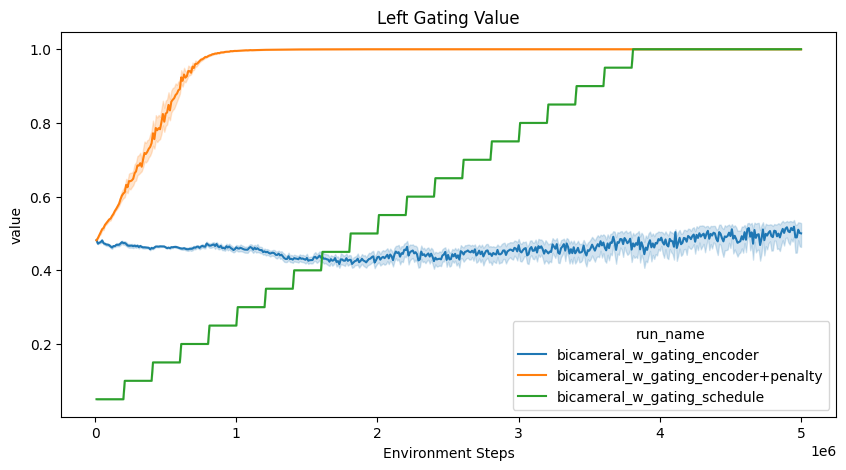

In [ ]:
plot_gating_values(
    train_data.query("run_name.str.contains('bicameral')"), 
    title = "Left Gating Value", 
    figsize = (10, 5))

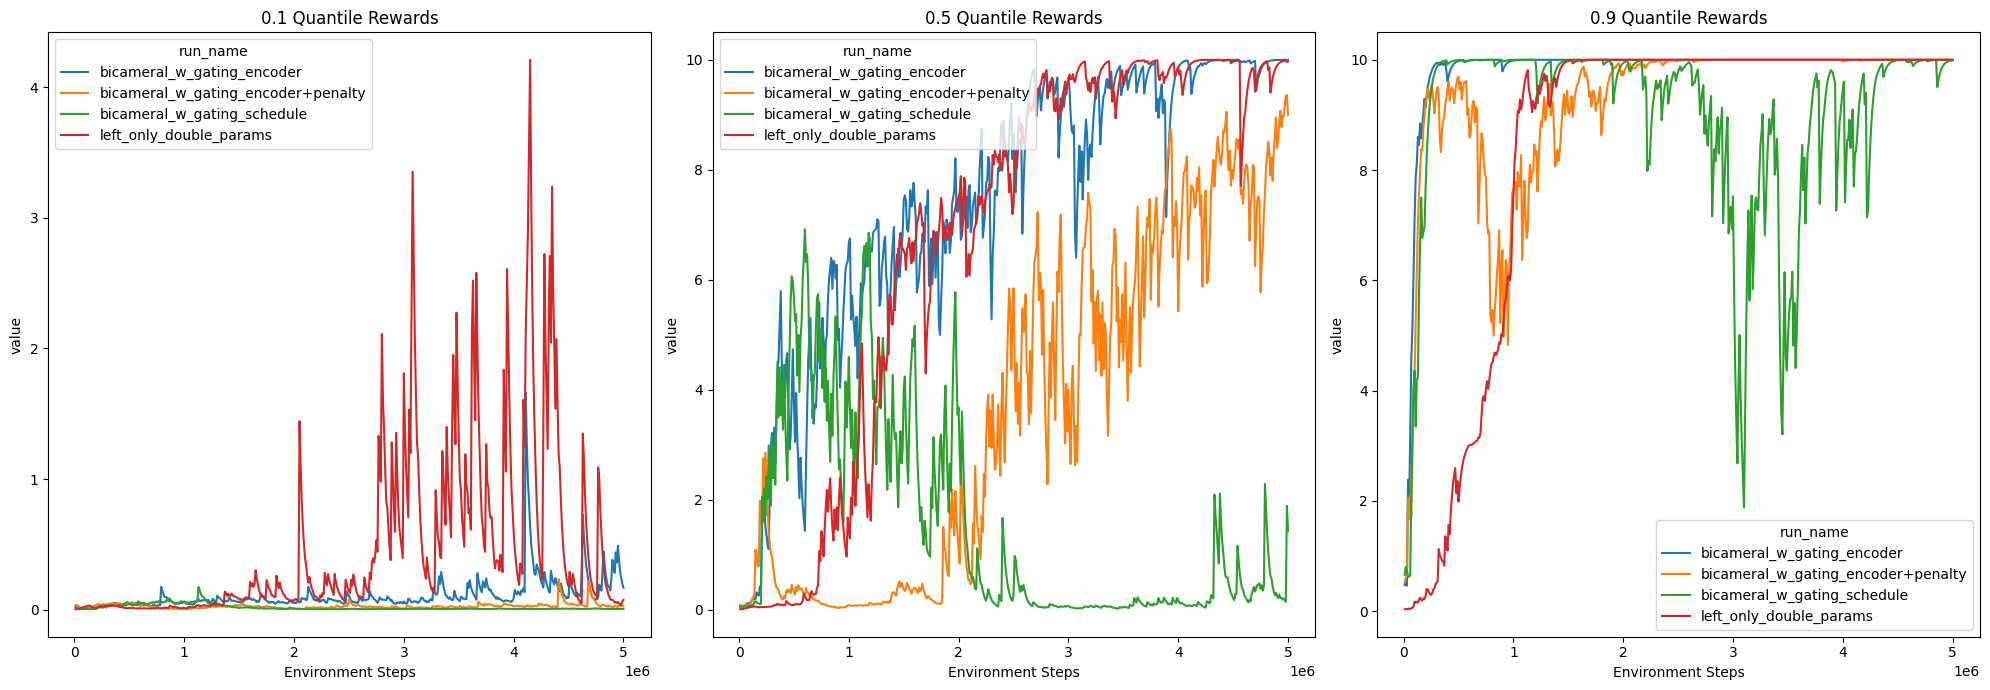

In [ ]:
plot_rew_quantiles(
    (
        train_data
        .query(
            'run_name.isin(["bicameral_w_gating_encoder", "bicameral_w_gating_schedule","bicameral_w_gating_encoder+penalty", "left_only_double_params"])'
            )
    ), 
    alpha = .25)

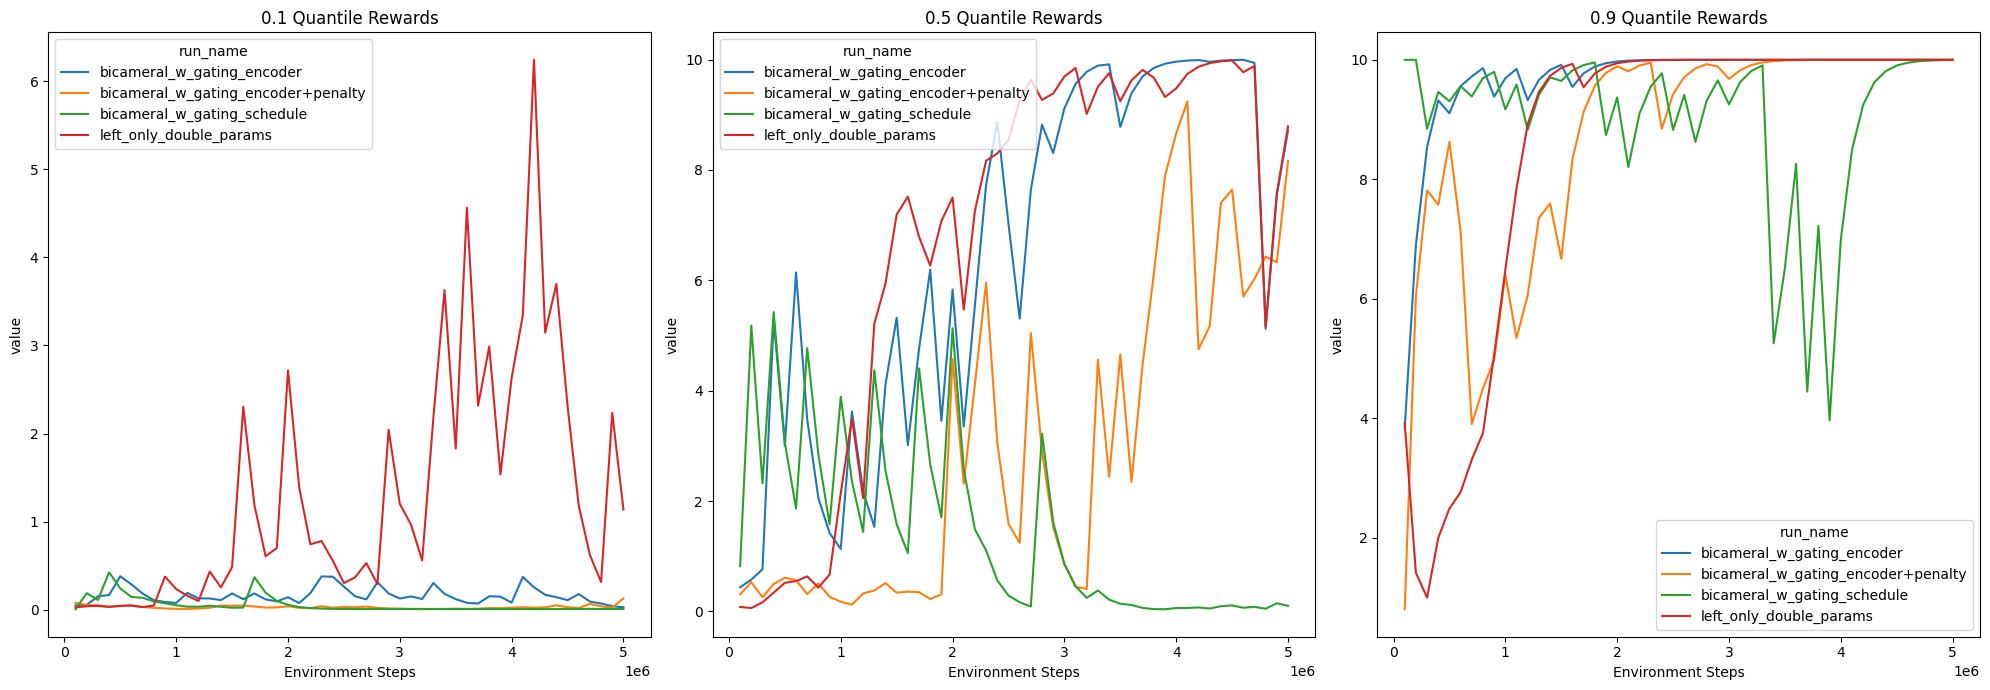

In [ ]:
plot_rew_quantiles(
    test_data.query('run_name.isin(["bicameral_w_gating_encoder", "bicameral_w_gating_schedule","bicameral_w_gating_encoder+penalty", "left_only_double_params"])'), 
    alpha = .5)

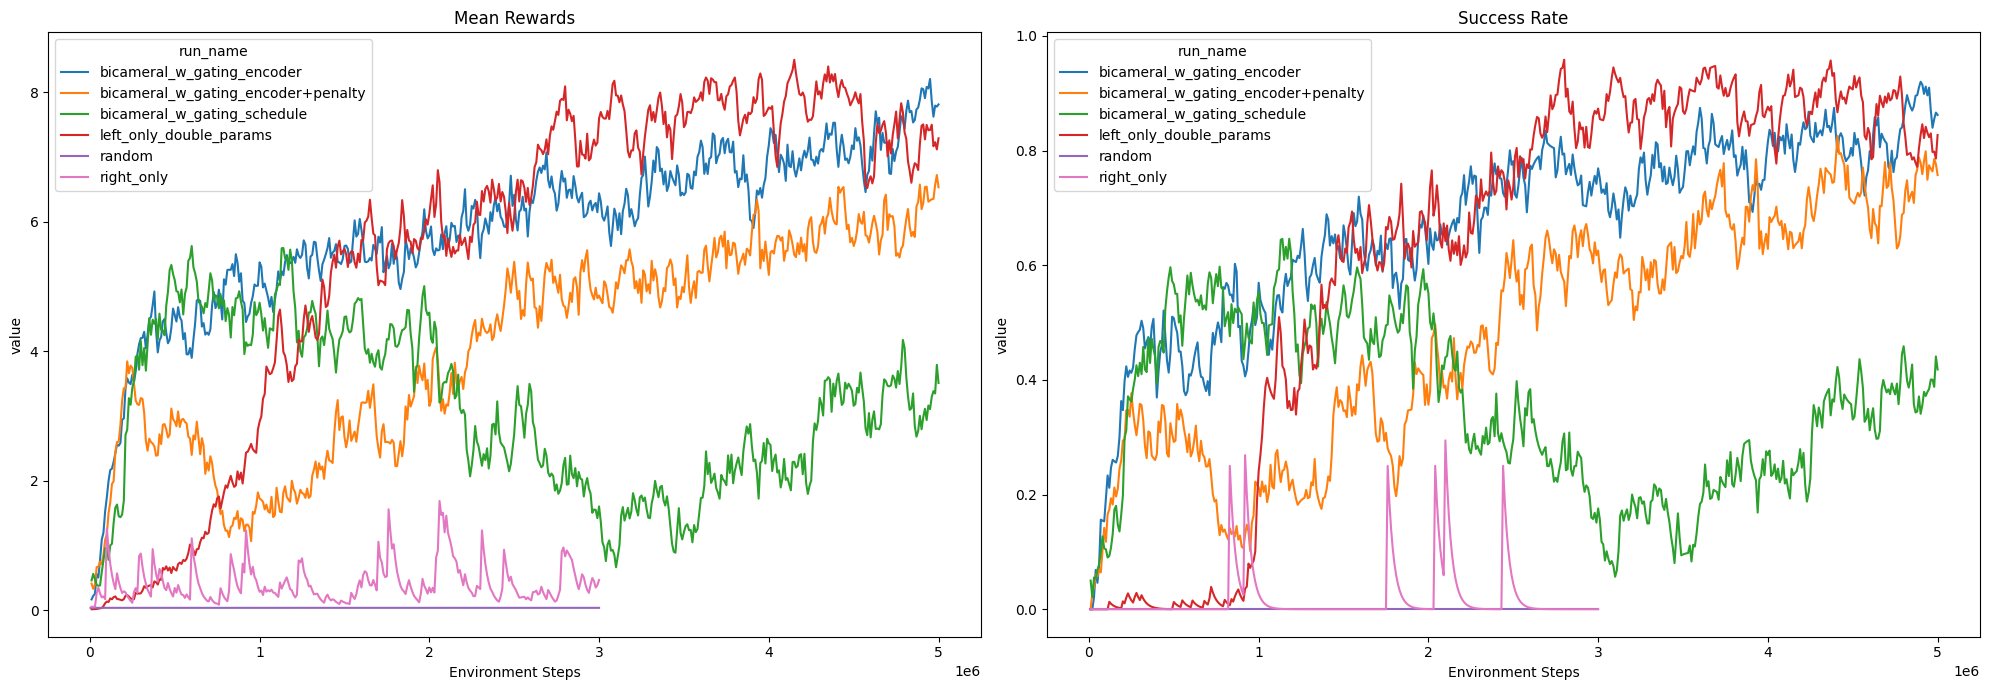

In [ ]:
plot_rew_and_succ(train_data, alpha = .25)

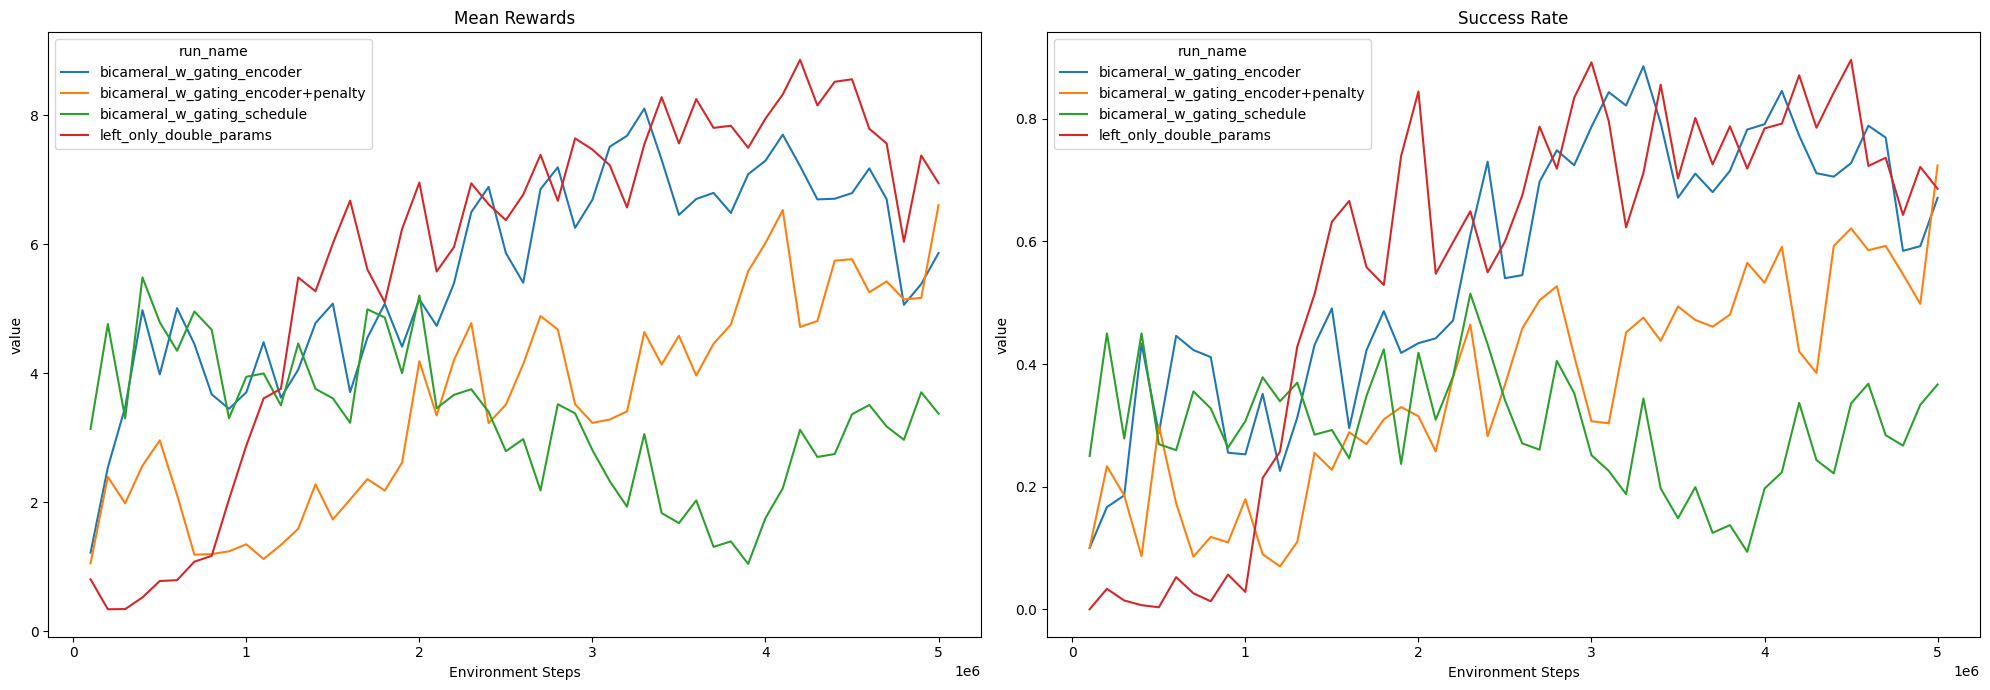

In [ ]:
plot_rew_and_succ(test_data, alpha = .5)

In [ ]:
not_to_plot = ['random', 'right_only']
col_to_do = 'num_successes'

tmp_df = (
    train_data
    .loc[:, ['run_name', col_to_do, 'frame']]
    .query(f'~run_name.isin({not_to_plot})')
)

tmp_df['cumulative_reward']=(
    tmp_df
    .loc[:, ['run_name', col_to_do]]
    .groupby('run_name')
    [col_to_do].cumsum()
)

tmp_df

run_name  num_successes    frame  \
0               left_only_double_params           0.00    10000   
1               left_only_double_params           0.00    20000   
2               left_only_double_params           0.15    30000   
3               left_only_double_params           0.15    40000   
4               left_only_double_params           0.25    50000   
..                                  ...            ...      ...   
495  bicameral_w_gating_encoder+penalty           0.90  4960000   
496  bicameral_w_gating_encoder+penalty           0.90  4970000   
497  bicameral_w_gating_encoder+penalty           1.00  4980000   
498  bicameral_w_gating_encoder+penalty           0.80  4990000   
499  bicameral_w_gating_encoder+penalty           0.90  5000000   

     cumulative_reward  
0                 0.00  
1                 0.00  
2                 0.15  
3                 0.30  
4                 0.55  
..                 ...  
495             333.70  
496             334.60  
497             335.60  
498             336.40  
499             337.30  

[2000 rows x 4 columns]

<Axes: xlabel='frame', ylabel='cumulative_reward'>

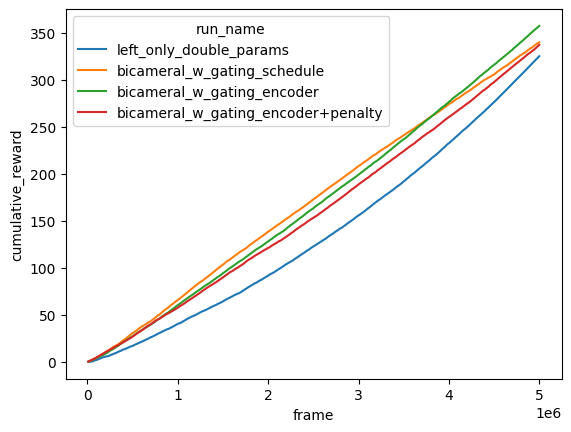

In [ ]:
sns.lineplot(
    data = tmp_df,
    x='frame',
    y = 'cumulative_reward',
    hue='run_name'
)

<Axes: xlabel='frame', ylabel='diff'>

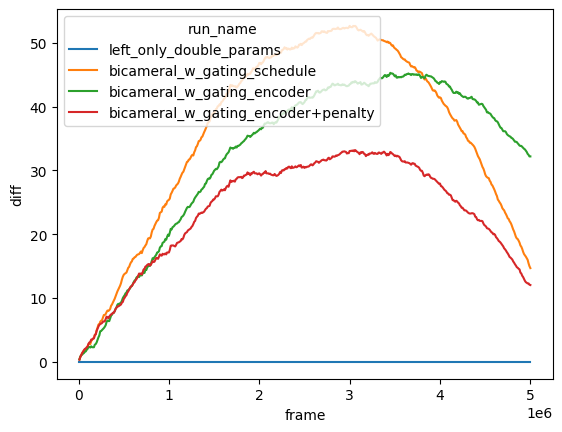

In [ ]:
left_only_cumrew = (
    tmp_df
    .query('run_name=="left_only_double_params"')
)

df = (
    left_only_cumrew.drop('run_name', axis=1)
    .rename(columns = {'cumulative_reward': 'cumulative_reward_left'})
    .merge(
        tmp_df, on = 'frame'
    )
    .assign(
        diff = lambda x: x.cumulative_reward - x.cumulative_reward_left
    )
)

sns.lineplot(
    data=df,
    x='frame',
    y='diff',
    hue='run_name'
)

In [ ]:
np.unique(df['training_task']).tolist()

['button-press-v2',
 'door-open-v2',
 'faucet-open-v2',
 'pick-place-v2',
 'push-v2',
 'reach-v2']

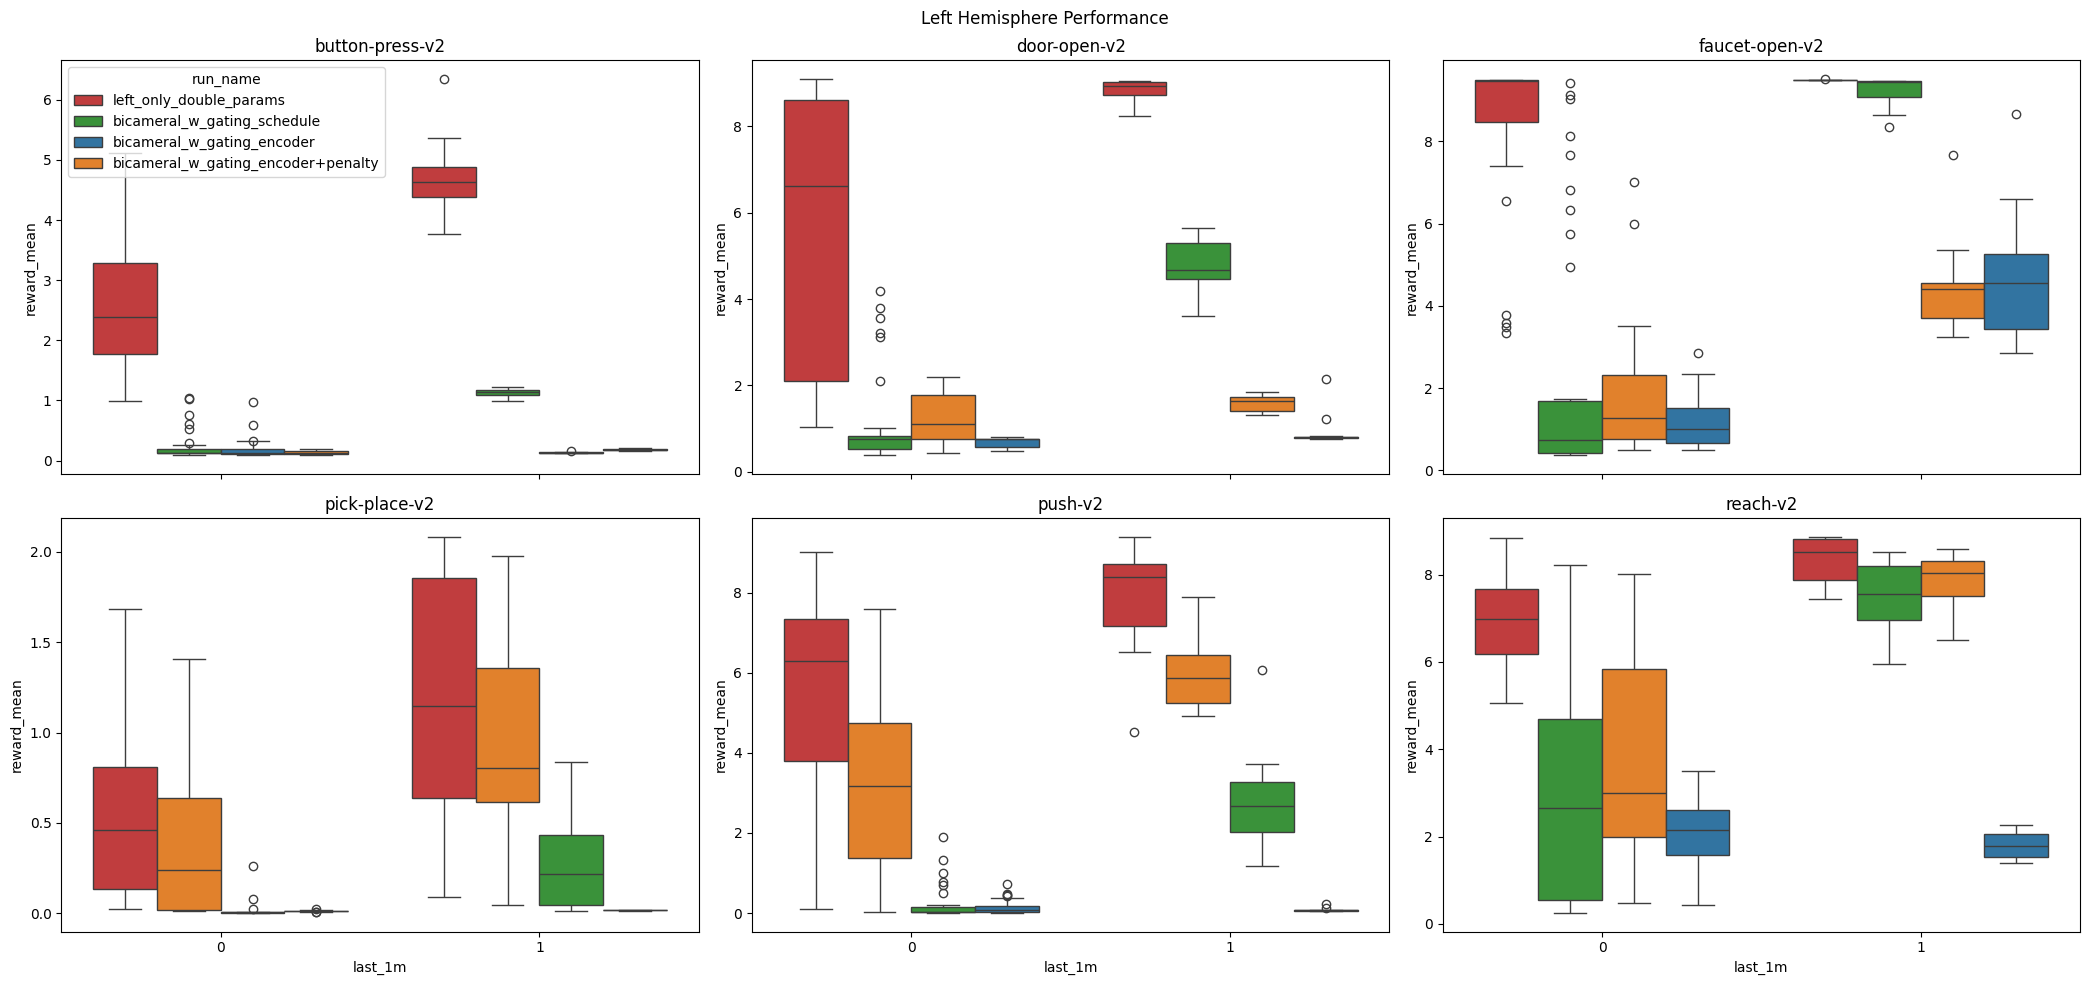

In [ ]:
df = (
    pd.concat(
        [left_eval_data, test_data.query('run_name == "left_only_double_params"')]
    )
    .loc[:, ['training_task', 'frame','run_name', 'reward_mean']]
    .assign(last_1m = lambda x: 1*(x.frame >= 4000000))
)

fig, ax = plt.subplots(2, 3, figsize = (21, 10), sharex=True)
ax = ax.flatten()

training_tasks = np.unique(df['training_task']).tolist()

for i, task in enumerate(training_tasks):
    sns.boxplot(
        data = (
            df
            .query(f"training_task=='{task}'")
            .sort_values(['reward_mean'], ascending=False)
        ),
        x='last_1m',
        y='reward_mean',
        hue='run_name',
        ax=ax[i],
        palette=PALETTE
    )
    ax[i].set_title(f"{task}")
    if i > 0:
        ax[i].get_legend().remove()

plt.suptitle("Left Hemisphere Performance")
plt.tight_layout()
plt.show();

In [ ]:
to_remove = ["random","right_only"]

time_to_vals = ['q_25', 'q_50', 'q_75', 'q_90']

df = (
    train_data
    # .query(f'~run_name.isin({to_remove})')
    .loc[:,['training_task','run_name', 'frame', 'reward_mean']]
)

quantiles=(
    df
    .loc[:,['training_task','run_name', 'reward_mean']]
    .groupby(['training_task','run_name'])
    .quantile([0.25, 0.5, 0.75, 0.9])
    .reset_index()
    .rename(columns={'level_2':'quantile'})
    .pivot_table(
        values=['reward_mean'],
        columns='quantile',
        index=['training_task', 'run_name']
    )
    .reset_index()
)
quantiles.columns = ['training_task','run_name'] + time_to_vals
time_to_data = (
    quantiles
    .merge(df, on=['run_name', 'training_task'])
    .assign(
        time_to_q_25=lambda x: x.frame * (x.reward_mean>=x.q_25),
        time_to_q_50=lambda x: x.frame * (x.reward_mean>=x.q_50),
        time_to_q_75=lambda x: x.frame * (x.reward_mean>=x.q_75),
        time_to_q_90=lambda x: x.frame * (x.reward_mean>=x.q_90)
    )
)

left_baseline_q = (
    quantiles
    .query('run_name=="left_only_double_params"')
    .loc[:,['training_task', 'run_name', *time_to_vals]]
)
q_to_left = pd.DataFrame()
for val in time_to_vals:
    tmp_left = (
        quantiles
        .loc[:,['training_task', 'run_name', val]]
        .merge(
            (
                left_baseline_q
                .loc[:, ['training_task', val]]
                .rename(columns={val:'baseline'})
            ), 
            on=['training_task']
        )
        .assign(**{f'{val}_ratio': lambda x: x[val] / x.baseline})
        .drop('baseline', axis=1)
        .set_index(['training_task', 'run_name'])

    )

    q_to_left = pd.concat([q_to_left, tmp_left], axis=1)

time_to_vals_dfs = pd.DataFrame()
for val in time_to_vals:
    tmp = (
        time_to_data
        .query(f'time_to_{val}> 0')
        .groupby(['training_task','run_name'])
        .agg({f'time_to_{val}':'min'})
        .reset_index()
    )
    baseline_vals = (
        tmp
        .query('run_name=="left_only_double_params"')
        .rename(columns={f'time_to_{val}':'baseline'})
        .drop('run_name', axis=1)
    )
    tmp = (
        tmp
        .merge(
            baseline_vals,
            on='training_task'
        )
        .assign(**{f'time_to_{val}_ratio': lambda x: x[f'time_to_{val}'] / x.baseline})
        .set_index(['training_task', 'run_name'])
    )

    time_to_vals_dfs = pd.concat([time_to_vals_dfs, tmp], axis = 1)


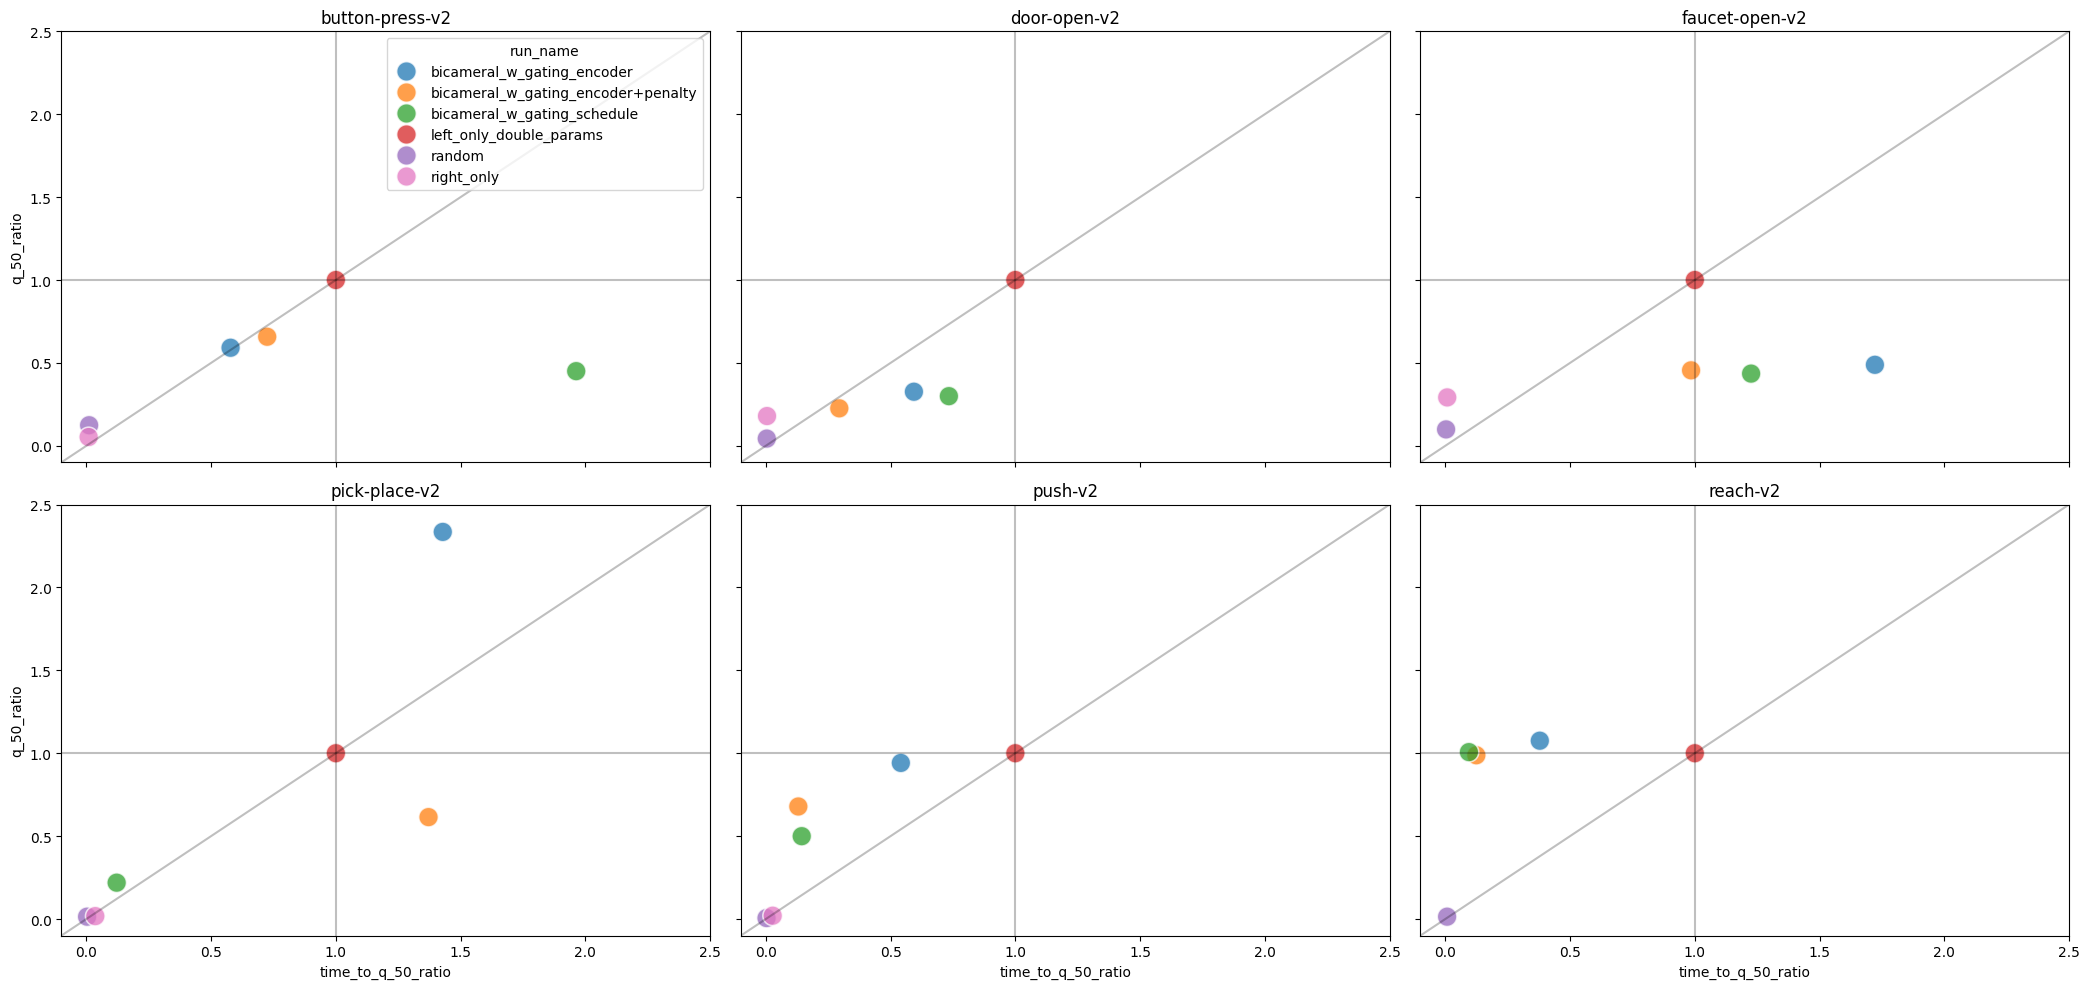

In [ ]:
quantiles_and_times = pd.concat([time_to_vals_dfs, q_to_left], axis=1).reset_index()
fig, ax = plt.subplots(2, 3, figsize = (21, 10), sharex=True, sharey=True)
ax = ax.flatten()
to_plot = 'q_50'

for i, task in enumerate(training_tasks):
    sns.scatterplot(
        data = (
            quantiles_and_times
            .query(f"training_task=='{task}'")
        ),
        x=f'time_to_{to_plot}_ratio',
        y=f'{to_plot}_ratio',
        hue='run_name',
        ax=ax[i],
        palette=PALETTE,
        s = 200,
        alpha = 0.75
    )
    ax[i].set_title(f"{task}")
    ax[i].axhline(1, c='black', alpha=0.25)
    ax[i].axvline(1, c='black', alpha=0.25)
    ax[i].set_xlim(-.1, 2.5)
    ax[i].set_ylim(-.1, 2.5)

    ax[i].plot([-5., 5.], [-5.,5.], c='black', alpha=0.25)
    if i > 0:
        ax[i].get_legend().remove()


plt.tight_layout()
plt.show();


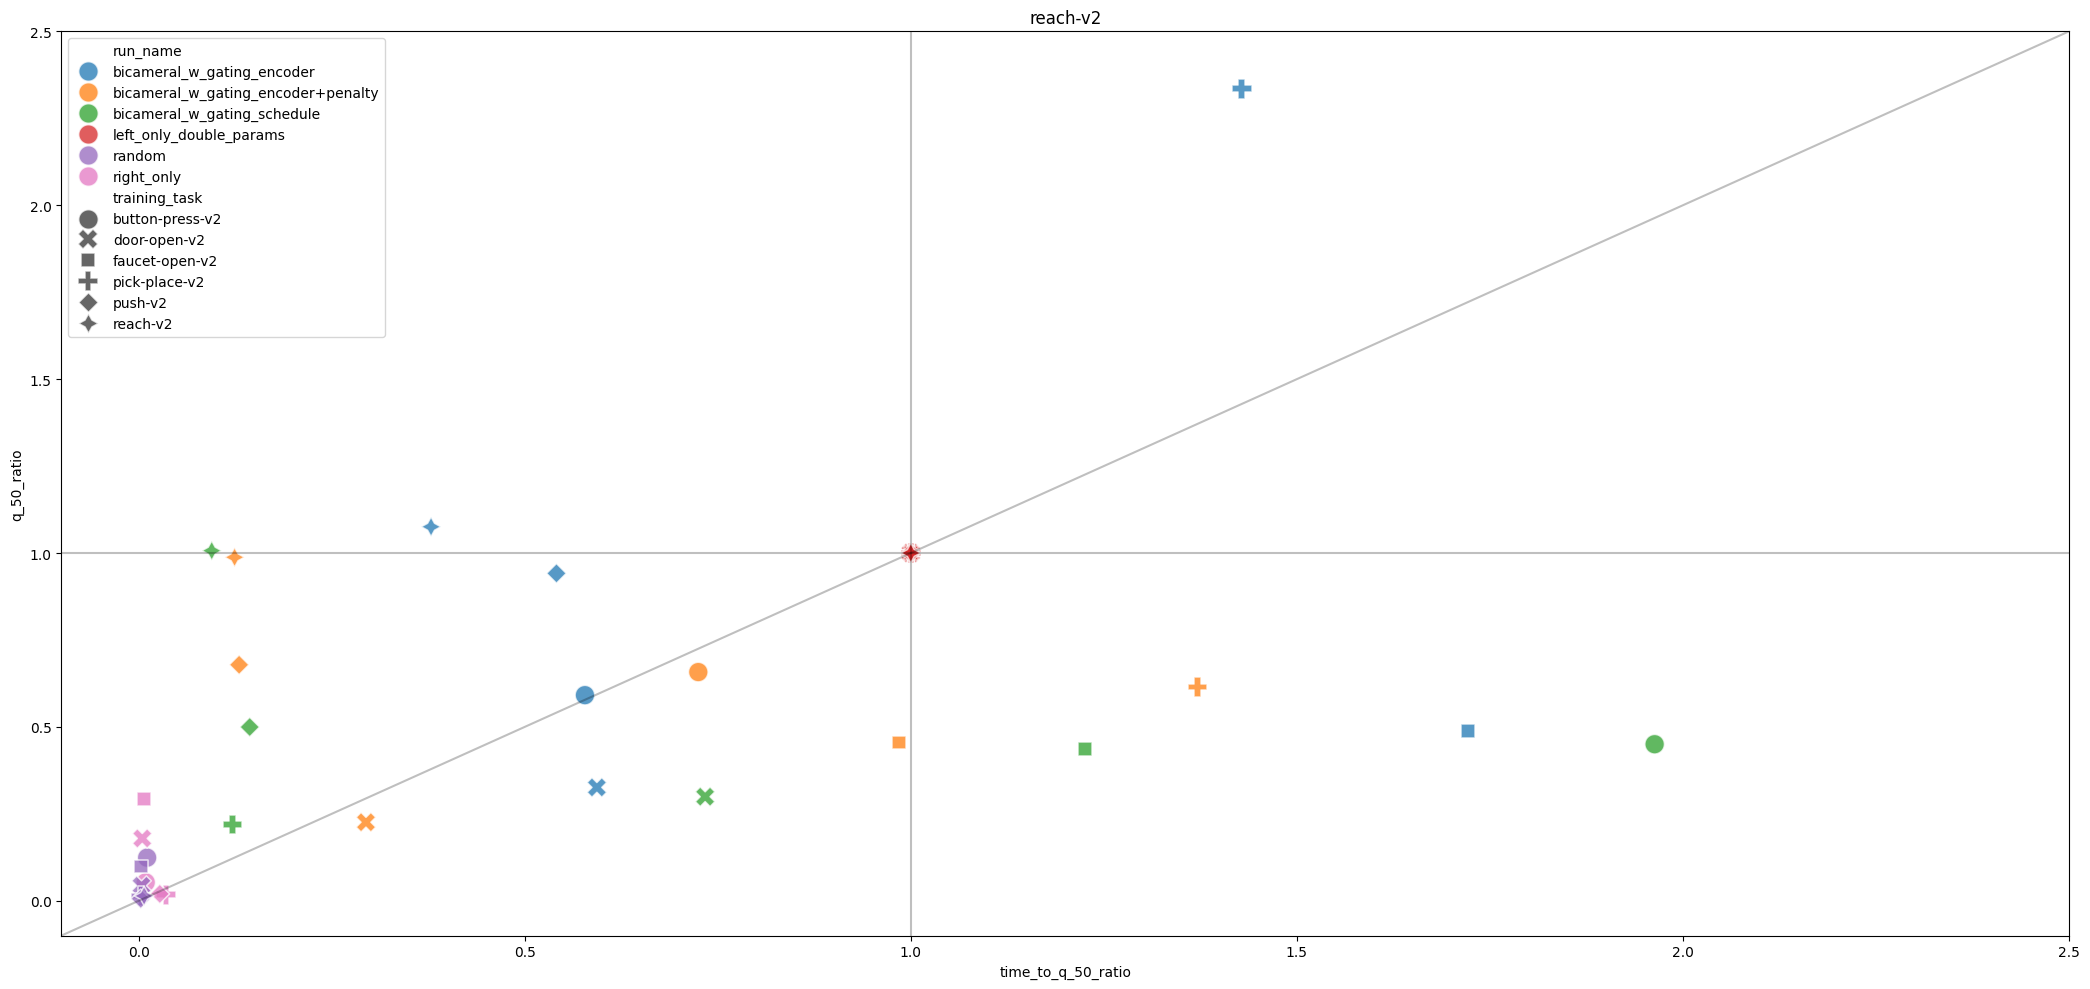

In [ ]:
quantiles_and_times = pd.concat([time_to_vals_dfs, q_to_left], axis=1).reset_index()
fig, ax = plt.subplots(figsize = (21, 10), sharex=True, sharey=True)
# ax = ax.flatten()
to_plot = 'q_50'

sns.scatterplot(
    data = (
        quantiles_and_times
    ),
    x=f'time_to_{to_plot}_ratio',
    y=f'{to_plot}_ratio',
    hue='run_name',
    ax=ax,
    palette=PALETTE,
    s = 200,
    alpha = 0.75,
    style='training_task'
)
ax.set_title(f"{task}")
ax.axhline(1, c='black', alpha=0.25)
ax.axvline(1, c='black', alpha=0.25)
ax.set_xlim(-.1, 2.5)
ax.set_ylim(-.1, 2.5)

ax.plot([-5., 5.], [-5.,5.], c='black', alpha=0.25)



plt.tight_layout()
plt.show();


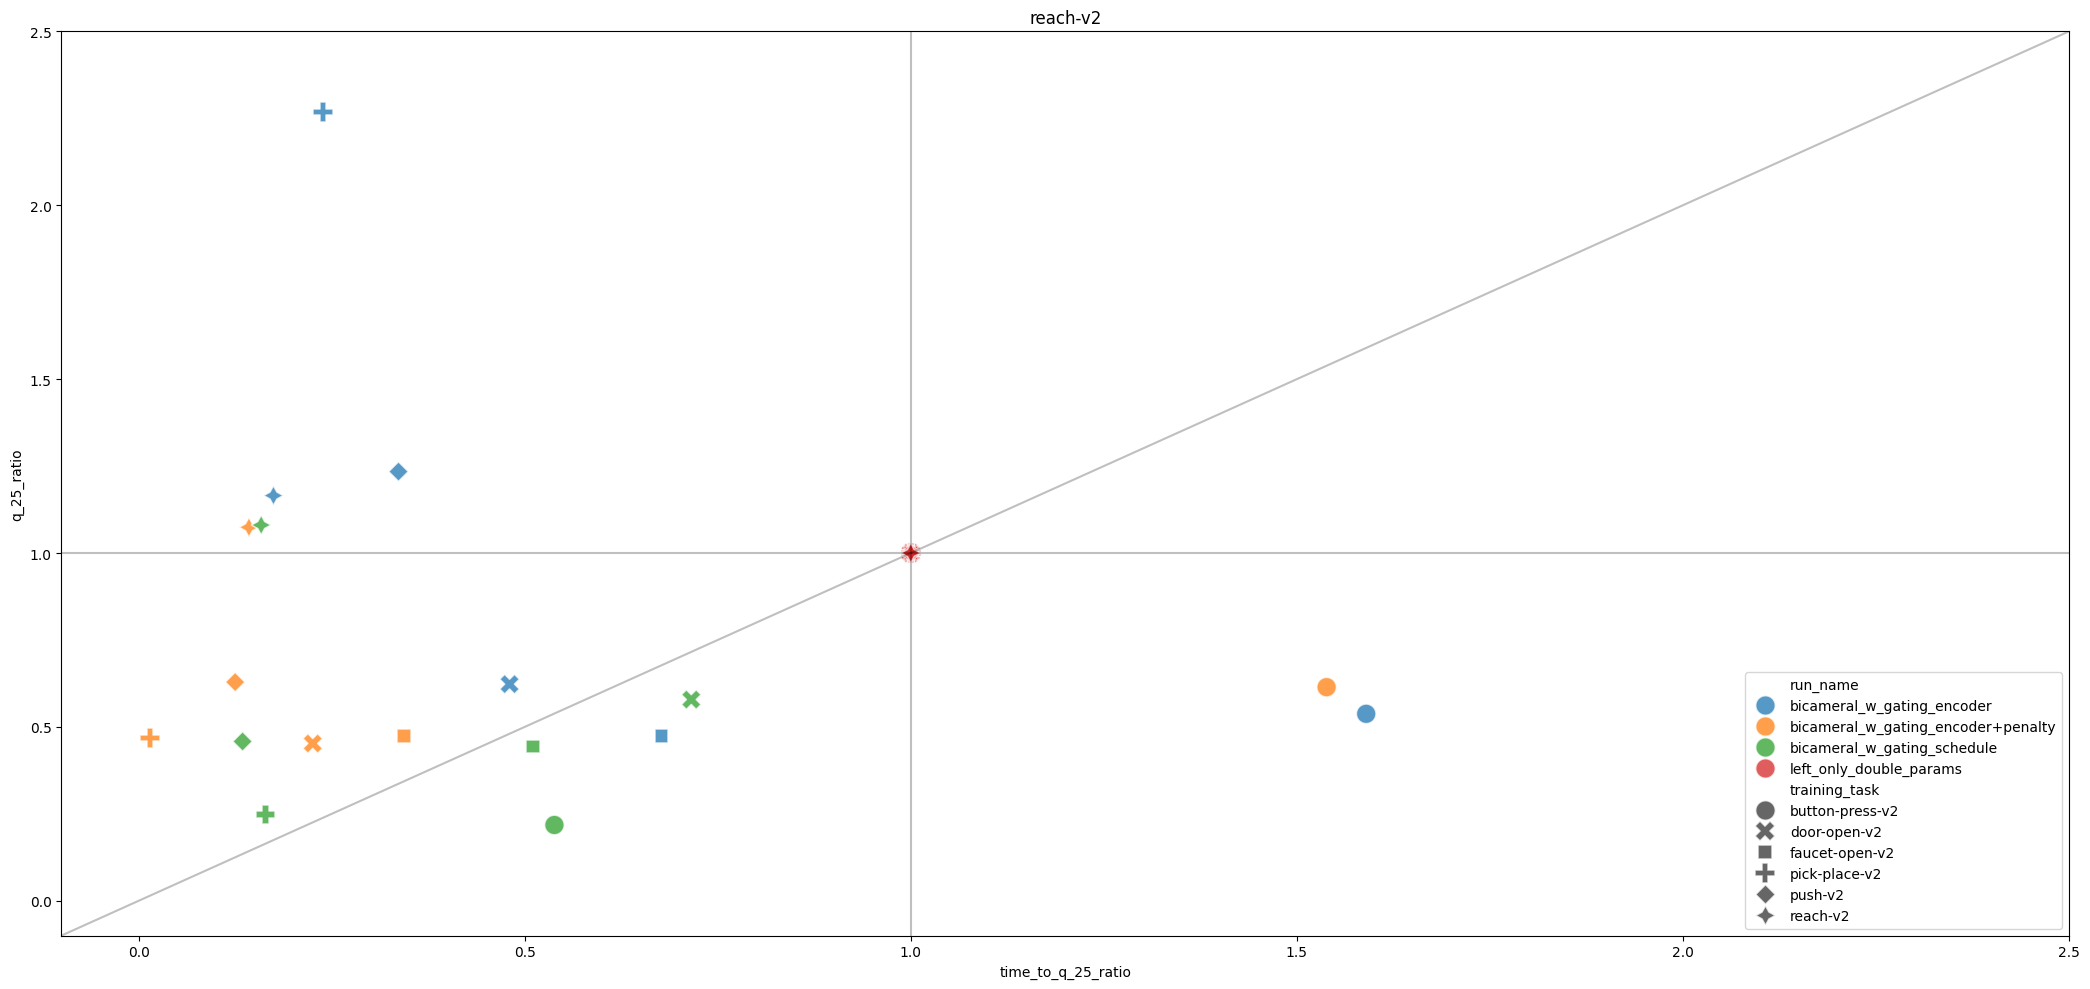

In [ ]:
fig, ax = plt.subplots(figsize = (21, 10), sharex=True, sharey=True)
# ax = ax.flatten()
to_plot = 'q_25'

sns.scatterplot(
    data = (
        quantiles_and_times.query(f"~run_name.isin({to_remove})")
    ),
    x=f'time_to_{to_plot}_ratio',
    y=f'{to_plot}_ratio',
    hue='run_name',
    ax=ax,
    palette=PALETTE,
    s = 200,
    alpha = 0.75,
    style='training_task'
)
ax.set_title(f"{task}")
ax.axhline(1, c='black', alpha=0.25)
ax.axvline(1, c='black', alpha=0.25)
ax.set_xlim(-.1, 2.5)
ax.set_ylim(-.1, 2.5)

ax.plot([-5., 5.], [-5.,5.], c='black', alpha=0.25)



plt.tight_layout()
plt.show();

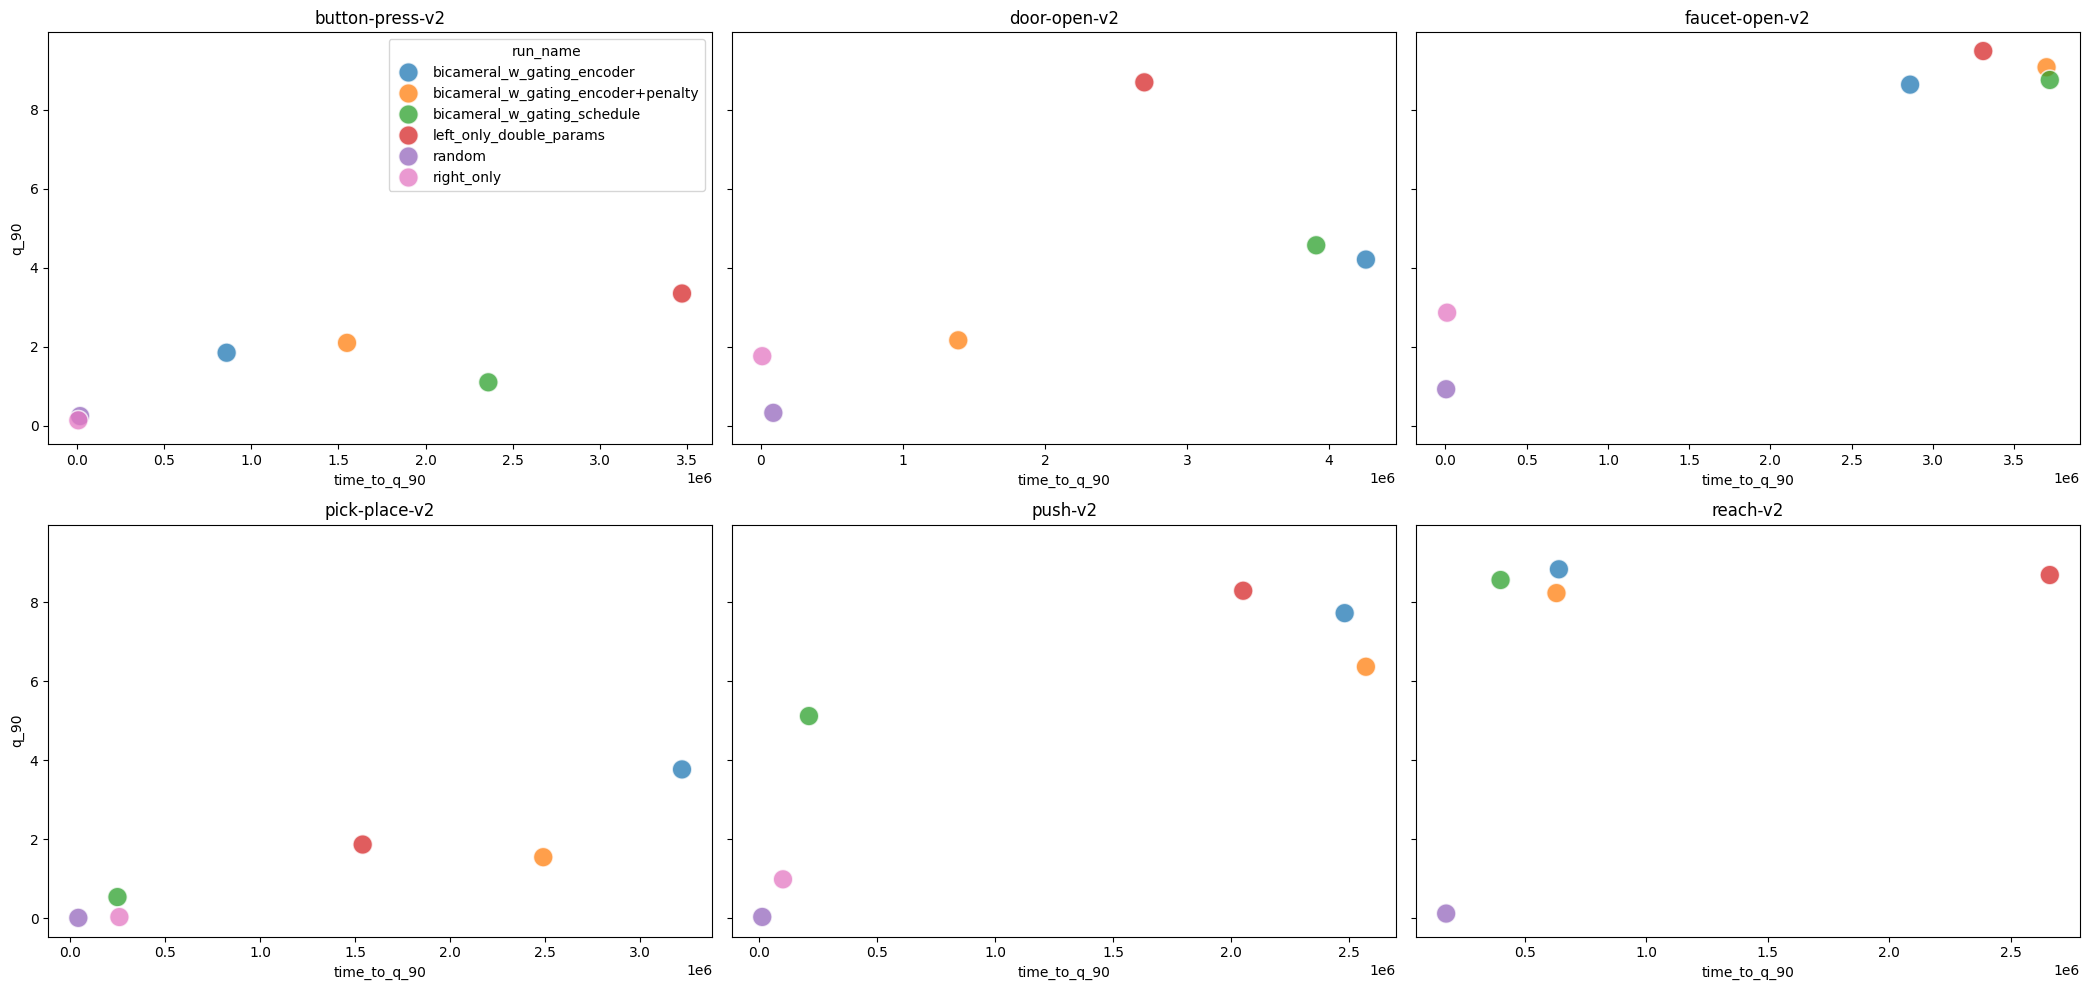

In [ ]:
fig, ax = plt.subplots(2, 3, figsize = (21, 10), sharey=True)
ax = ax.flatten()
to_plot = 'q_90'

for i, task in enumerate(training_tasks):
    sns.scatterplot(
        data = (
            quantiles_and_times
            .query(f"training_task=='{task}'")
        ),
        x=f'time_to_{to_plot}',
        y=f'{to_plot}',
        hue='run_name',
        ax=ax[i],
        palette=PALETTE,
        s = 200,
        alpha = 0.75
    )
    ax[i].set_title(f"{task}")
    if i > 0:
        ax[i].get_legend().remove()


plt.tight_layout()
plt.show();

<Axes: xlabel='training_task', ylabel='reward_mean'>

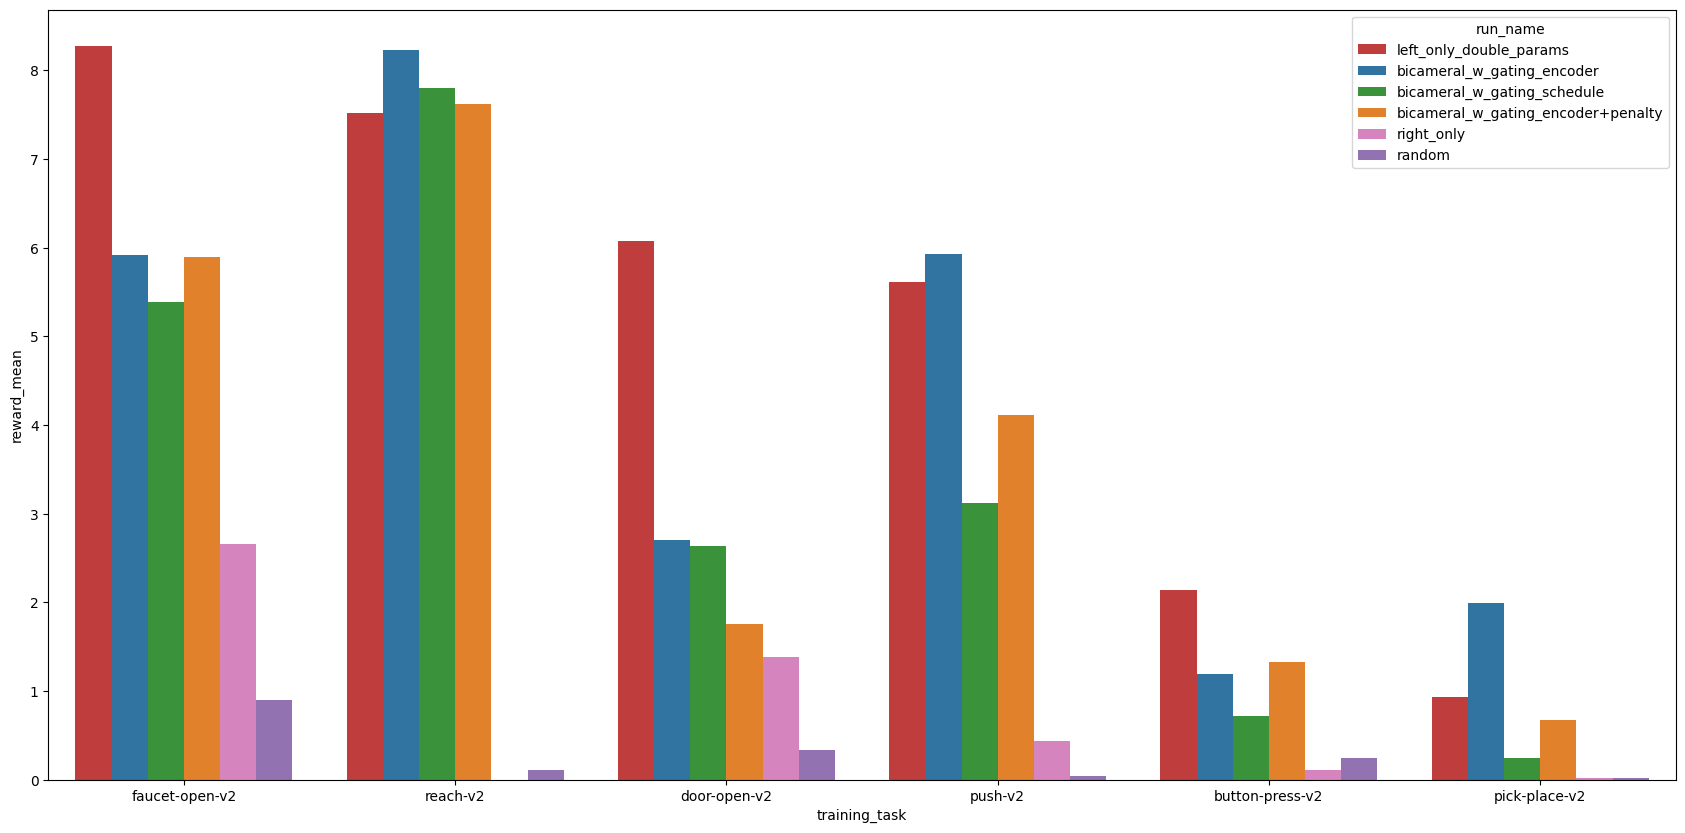

In [ ]:
all_train = (
    train_data
    .loc[:,['training_task','run_name', 'reward_mean']]
    .groupby(['training_task','run_name'])
    .mean()
    .reset_index()

)
fig, ax = plt.subplots(figsize = (21, 10))
sns.barplot(
    data=all_train.sort_values('reward_mean', ascending=False),
    x='training_task',
    y='reward_mean',
    hue='run_name',
    palette=PALETTE
)

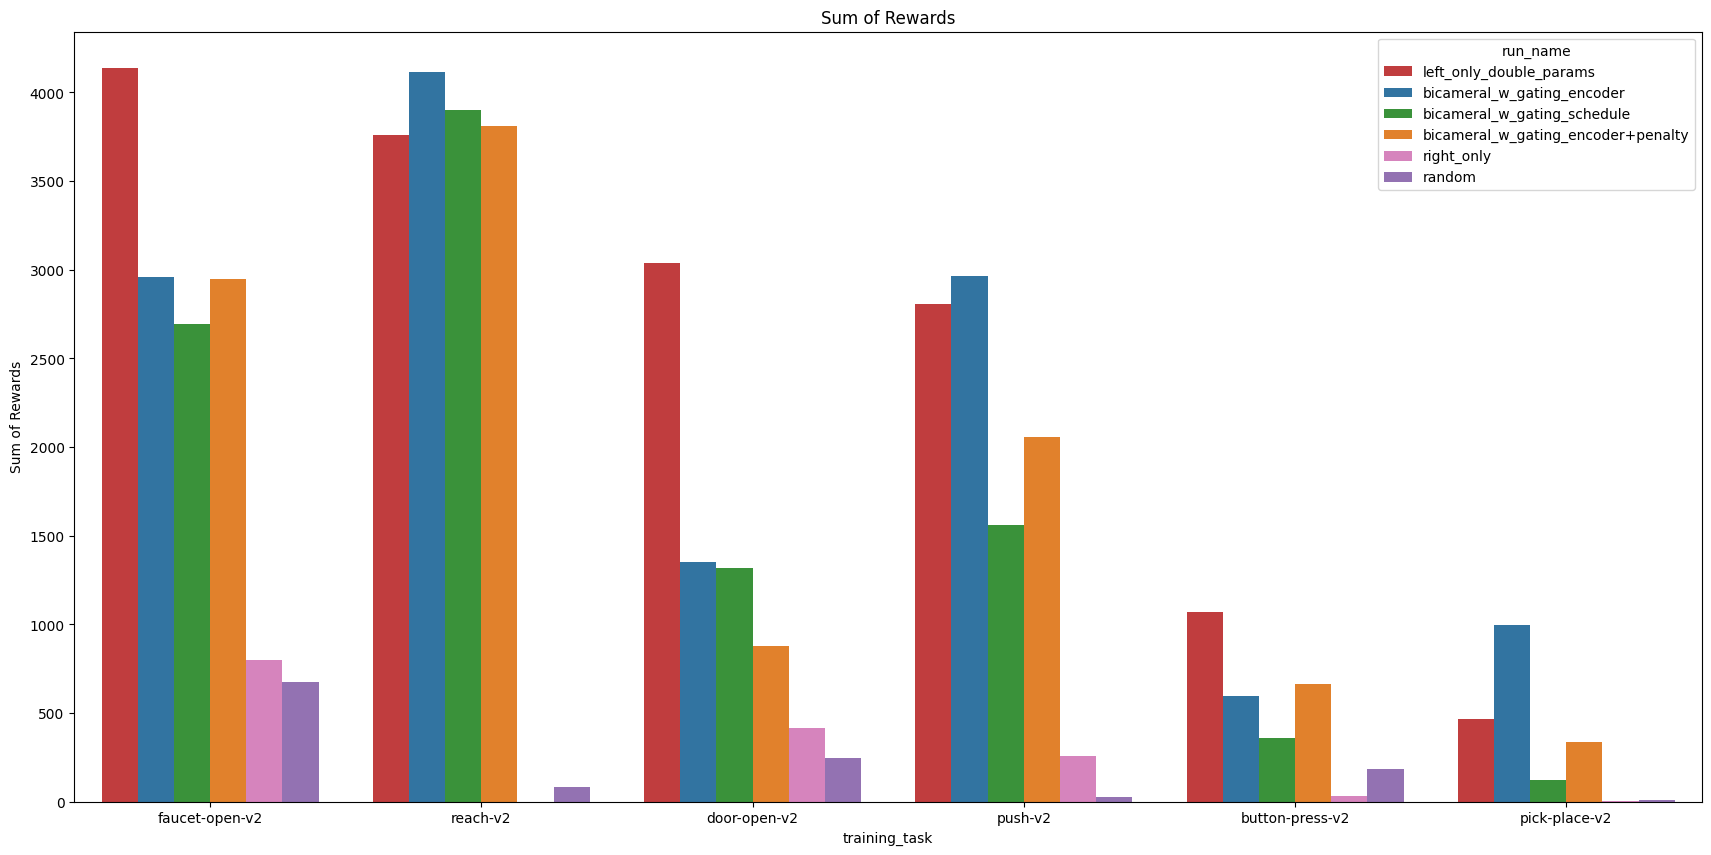

In [ ]:
all_train = (
    train_data
    .loc[:,['training_task','run_name', 'reward_mean']]
    .groupby(['training_task','run_name'])
    .sum()
    .reset_index()

)
fig, ax = plt.subplots(figsize = (21, 10))
sns.barplot(
    data=all_train.sort_values('reward_mean', ascending=False),
    x='training_task',
    y='reward_mean',
    hue='run_name',
    palette=PALETTE
)
ax.set_title("Sum of Rewards");
ax.set_ylabel("Sum of Rewards");


Text(0.5, 1.0, 'Left Hemisphere Performance')

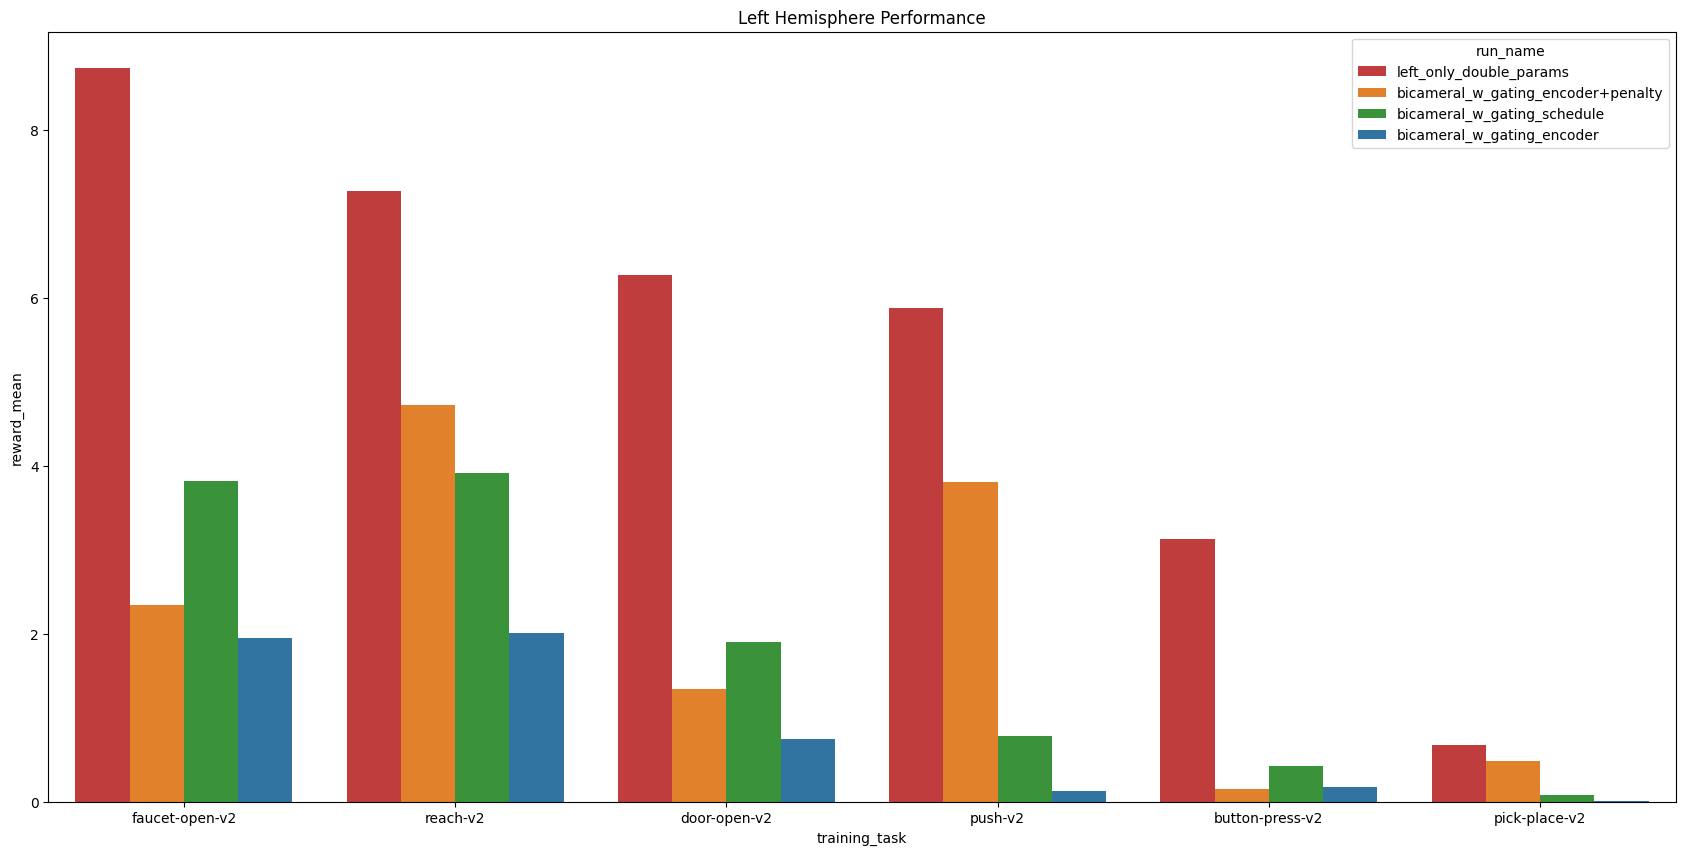

In [ ]:
left_compare = (
    pd.concat(
        [
            test_data.query('run_name=="left_only_double_params"'), 
            left_eval_data]
    )
    .loc[:,['training_task','run_name', 'reward_mean']]
    .groupby(['training_task','run_name'])
    .mean()
    .reset_index()

)
fig, ax = plt.subplots(figsize = (21, 10))
sns.barplot(
    data=left_compare.sort_values('reward_mean', ascending=False),
    x='training_task',
    y='reward_mean',
    hue='run_name',
    palette=PALETTE
)
ax.set_title("Left Hemisphere Performance")

In [ ]:
def plot_baseline_barchart(data, title, figsize= (20, 7)):

    plot_df = (
        data
        .melt(id_vars=['frame', 'result_group', 'run_name', 'training_task'])
        .set_index('frame')
        .query(f'variable.isin({REWARD_QUANTILES})')
        .groupby(['result_group', 'run_name', 'training_task', 'variable'])
        .mean()
        .reset_index()
    )

    fig, ax = plt.subplots(figsize=figsize)

    sns.barplot(
        data = plot_df,
        x = 'run_name',
        y = 'value',
        ax = ax
    )
    ax.set_title(title)

    plt.show();

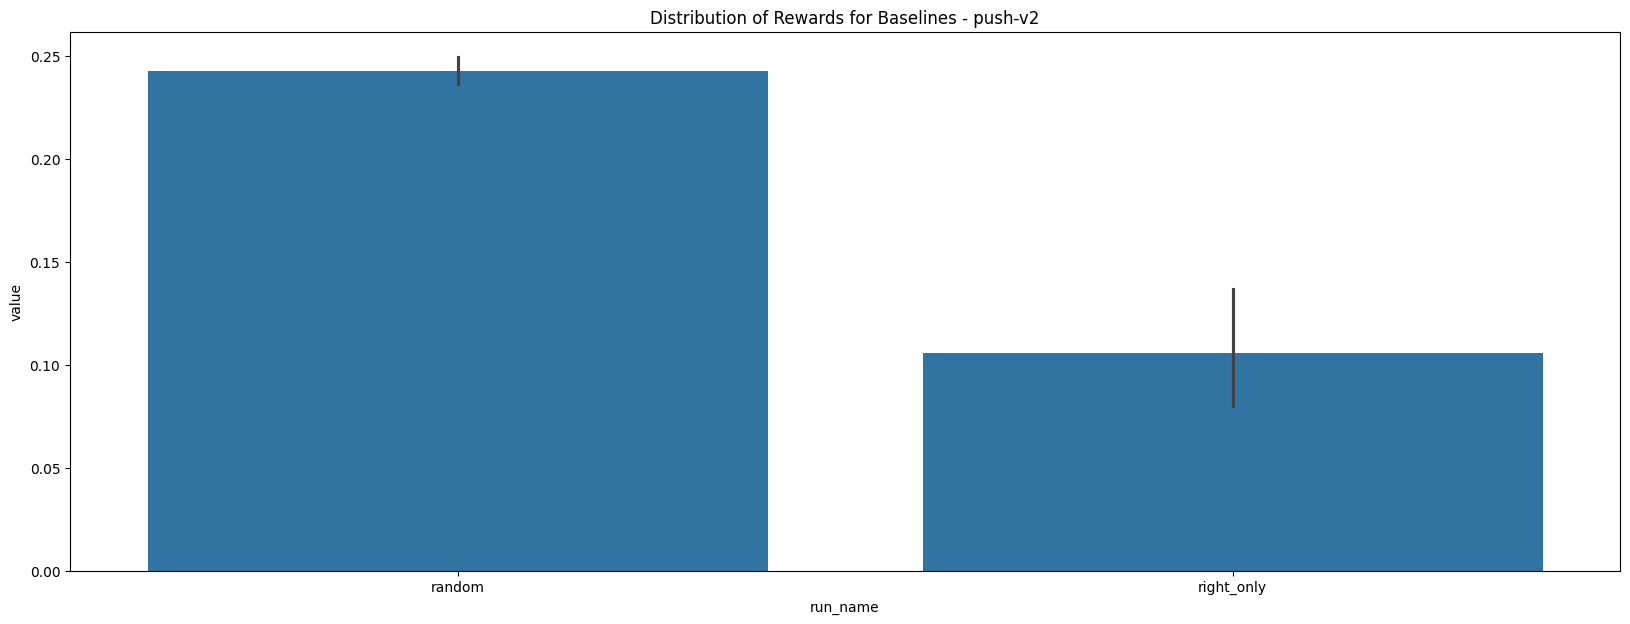

In [ ]:
runs_to_do = ['right_only', 'random']
baseline_data = (
    train_data
    .query(f'run_name.isin({runs_to_do})')
)

plot_baseline_barchart(baseline_data, title="Distribution of Rewards for Baselines - push-v2")


In [ ]:
np.unique(train_data.run_name)

array(['bicameral_w_gating_encoder', 'bicameral_w_gating_encoder+penalty',
       'bicameral_w_gating_schedule', 'left_only_double_params', 'random',
       'right_only'], dtype=object)

In [ ]:


sns.lineplot(
    test_data,
    x
)

In [ ]:
## plot training comparison - reward_mean, num_successes, reward_quantiles
## for train
train_results = (
    pd.concat(
        [all_results[k].data.query('result_group=="train_results"') for k in all_results.keys()]
    )
    .drop(['num_episodes', 'training_task', 'evaluation_task'], axis =1)
    .melt(id_vars = ['run_name', 'frame', 'result_group'])
)

## for test
## for test vs left
## note use right / random baselines for all

#### Compare whole bicameral to left_only network

In [ ]:
avg_right_reward = right_only_results.data.reward_mean.mean()
avg_right_success = right_only_results.data.num_successes.mean()
combined_data = (
    pd.concat(
        [
            left_only_results.data, 
            (
                gate_lg_penalty_results
                .data
                .query('result_group.isin(["test_results", "train_results"])')
            )
        ]
    )
)


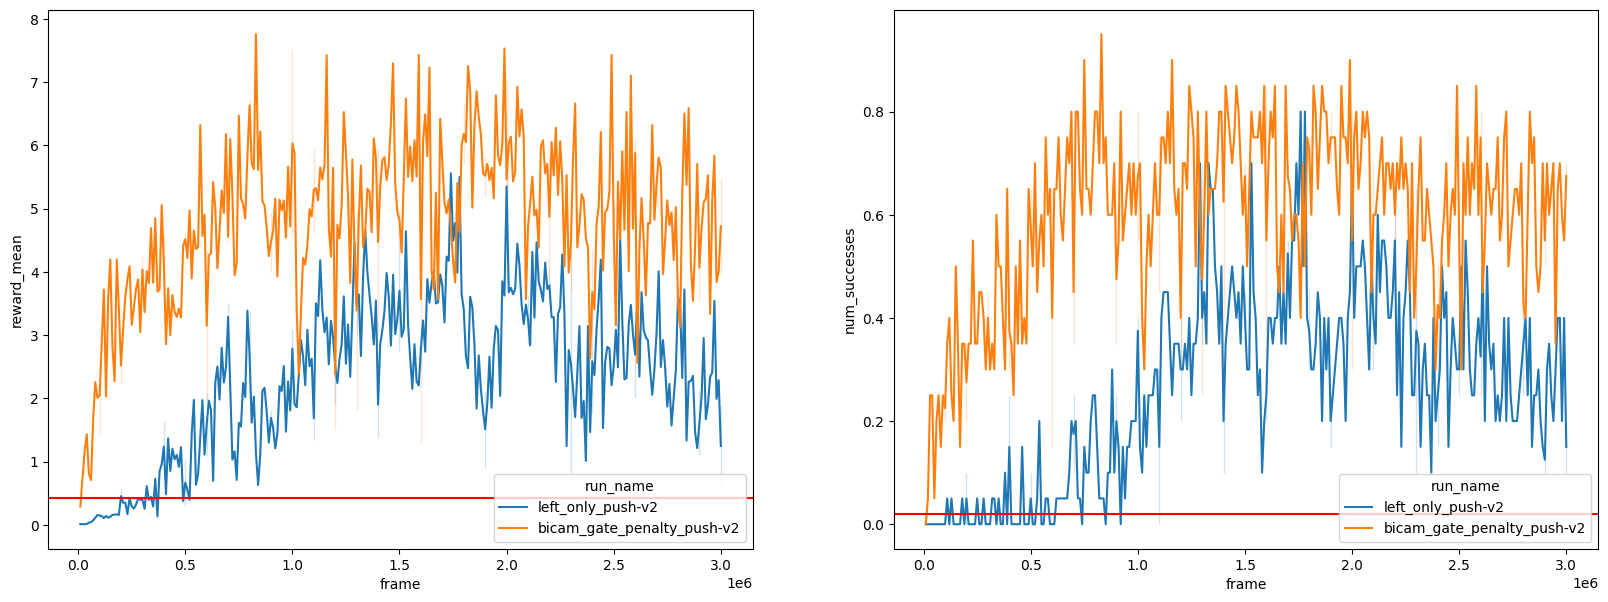

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (20, 7))

## mean reward
sns.lineplot(
    data = combined_data,
    x = 'frame',
    y = 'reward_mean',
    hue = 'run_name',
    ax = ax[0]
)

ax[0].axhline(avg_right_reward, c='r')

## successes
sns.lineplot(
    data = combined_data,
    x = 'frame',
    y = 'num_successes',
    hue = 'run_name',
    ax = ax[1]

)

ax[1].axhline(avg_right_success, c='r')

<Axes: xlabel='frame', ylabel='rq_0.9'>

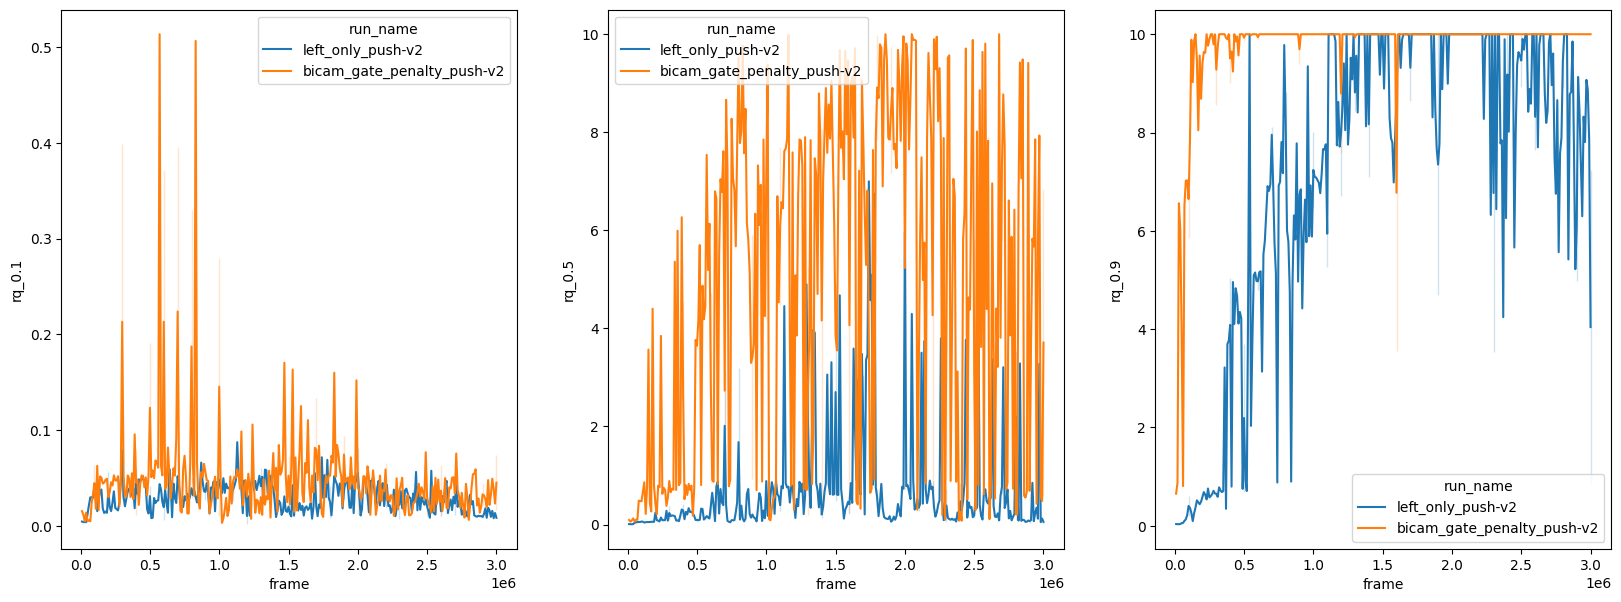

In [ ]:
fig, ax = plt.subplots(1, 3, figsize = (20, 7))

## lowest decile
sns.lineplot(
    data = combined_data,
    x = 'frame',
    y = 'rq_0.1',
    hue = 'run_name',
    ax = ax[0]
)

## median
sns.lineplot(
    data = combined_data,
    x = 'frame',
    y = 'rq_0.5',
    hue = 'run_name',
    ax = ax[1]
)

# highest decile
sns.lineplot(
    data = combined_data,
    x = 'frame',
    y = 'rq_0.9',
    hue = 'run_name',
    ax = ax[2]
)